# <h1 align = center> ***Impact  of nature of content on online hate speech detection*** </h1>

# <h2> *Librairies Downloading* </h2>

In [ ]:
!pip install emoji
!pip install fasttext
!pip install fasttext-wheel
!pip install gensim
!pip install graphviz
!pip install matplotlib
!pip install nltk
!pip install pandas
!pip install pydot
!pip install pydotplus
!pip install pyspellchecker
!pip install scikit-learn
!pip install seaborn
!pip install scikeras
!pip install tf-keras==2.15.1
!pip install transformers==4.37.2
!pip install xgboost
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.1-py3-none-any.whl (238 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246764 sha256=0d87f7173df44d7a96eca4cf2fd54ebf110977ca0c51074f868d840e39c4dc94
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
# !pip install transformers datasets huggingface_hub tensorboard==2.11
# # !sudo apt-get install git-lfs --yes
# !pip install --upgrade tensorflow
# !pip uninstall tensorflow -y
# !pip install tensorflow

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import logging
logging.getLogger("transformers.tokenization_utils_base").setLevel(logging.ERROR)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <h2> *Librairies import* </h2>

In [ ]:
#For data analysis
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import time

#For data visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from tqdm import tqdm
from wordcloud import STOPWORDS,WordCloud


#For data preprocessing
import re
import string
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Layer, Attention
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer


#For evaluation metrics and grid search
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import (
     accuracy_score, auc, classification_report, confusion_matrix, f1_score,
     precision_recall_curve, roc_auc_score, precision_score, recall_score,
     roc_curve)
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import losses
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2


# For text vectorization and word embedding
import fasttext
from gensim.models import FastText
#from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# from spellchecker import SpellChecker
#For ML and DL models
# ML Models
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost.sklearn import XGBClassifier

#DL Models
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import (
     Bidirectional, concatenate, Conv1D, Dense, Dropout, Embedding, Flatten,
    GlobalAveragePooling1D, GlobalMaxPooling1D, GRU, Input, MaxPooling1D,
     LSTM, SpatialDropout1D)
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model

In [ ]:
# import os

# os.environ["SM_FRAMEWORK"] = "tf.keras"
import transformers
from transformers import AutoModelForSequenceClassification, TFRobertaModel, TFBertForSequenceClassification, TFAutoModelForSequenceClassification, TFRobertaForSequenceClassification, TFBartForSequenceClassification, BartTokenizer, TrainingArguments, Trainer, create_optimizer, DataCollatorWithPadding
# from datasets import load_dataset
from transformers import ( AutoTokenizer,
    RobertaModel, RobertaTokenizer,
    RobertaTokenizerFast,
    RobertaForSequenceClassification,
    TrainingArguments,
    Trainer,
    AutoConfig,
)
from huggingface_hub import HfFolder, notebook_login

In [ ]:
print(tf.__version__)

2.15.0


# <h2>*Functions*</h2>

In [ ]:
####################################################################################################For Data pre processing#############################################################################################################

# def check_misspelled(text):
#   output_list = []
#   output_list_to_text = []
#   spell = SpellChecker()
#   w = spell.unknown(text.split())
#   for i in text.split():
#     if i not in w:
#       output_list.append(i)
#     else:
#       if (not spell.correction(i)):
#         output_list.append(i)
#         output_list_to_text.append(i)
#       else:
#         output_list.append(spell.correction(i))
#   result = ' '.join(output_list)
#   file1 = open('myFile1.txt','w')
#   file1.writelines(output_list_to_text)
#   file1.close()
#   return result

def decontracted(text):
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"i\'m", "i am", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"ain\'t", "am not", text)
    text = re.sub(r"arent",  "are not", text)
    text = re.sub(r"aren\'t", "are not", text)
    text = re.sub(r"dont", "do not", text)
    text = re.sub(r"didnt", "did not", text)
    text = re.sub(r"havent", "have not", text)
    text = re.sub(r"haven\'t", "have not", text)
    text = re.sub(r"shouldnt", "should not", text)
    text = re.sub(r"shouldn\'t", "should not",text)
    text = re.sub(r"shan\'t", "shall not", text)
    text = re.sub(r"sha\'n\'t", "shall not", text)
    text = re.sub(r"let\'s", "let us", text)
    text = re.sub(r"o\'clock", "of the clock", text)
    text = re.sub(r"tv", "television", text)
    text = re.sub(r"b!ack", "black", text)
    text = re.sub(r"wont", "will not", text)
    text = re.sub(r"cant", "can not", text)
    text = re.sub(r"aint", "am not", text)
    text = re.sub(r"shant", "shall not", text)
    text = re.sub(r"ma\'am", "madam", text)
    text = re.sub(r"y\'all", "you all", text)
    # general
    text = re.sub(r"n\'y", " you", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    output = []
    for word, tag in pos_tag(text.split()):
        if tag.startswith("NN"): #Noun
            output.append(lemmatizer.lemmatize(word,pos='n'))
        elif tag.startswith("VB"): #Verb
            output.append(lemmatizer.lemmatize(word,pos='v'))
        elif tag.startswith("JJ") | tag.startswith("VB") : #Adjective and adverb
            output.append(lemmatizer.lemmatize(word,pos='s'))
        else:
            output.append(lemmatizer.lemmatize(word))
    final_output = " ".join(output)
    return final_output

def remove_punctuation(text):
    translator = str.maketrans("", "", string.punctuation)
    result = text.translate(translator)
    return result

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    filtered_output = [u for u in text if u not in stop_words]
    return filtered_output

def text_has_emoji(text):
    tmp = ''
    tmp_list = []
    for character in text:
        if character in emoji.EMOJI_DATA:
            tmp = emoji.replace_emoji(character, replace =
                                      emoji.demojize(character,language='en'))
        else:
            tmp = character
        tmp_list.append(tmp)
        final_output = " ".join(tmp_list)
    return final_output

def translate_character(text):
    translator = str.maketrans("@340", "aeao")
    result = text.translate(translator)
    return result

def preprocess_text(text):
    # %%time
    start = time.time()
    tqdm.pandas()
    # spell = SpellChecker()
    # Lower case all the words before data preprocessing
    text = text.str.lower()
    # Short version terms
    text = text.progress_apply(lambda text: decontracted(text))
    #Character translation
    text = text.progress_apply(lambda text: translate_character(text))
    #Tokenization
    tokenizer = TweetTokenizer()
    text = text.progress_apply(lambda text: tokenizer.tokenize(text))
    # Stopwords removing
    text = text.progress_apply(lambda text: remove_stopwords(text))
    #Replacing Emojis with their semantic equivalent
    text = text.progress_apply(lambda text: text_has_emoji(text))
    # # Punctuation removing
    text = text.progress_apply(lambda text: remove_punctuation(text))
    # # Lemmatization
    text = text.progress_apply(lambda text: lemmatize(text))
    # Check misspeled words
    # new_df['misspelled_words'] = new_df.text.progress_apply(lambda text:
                                #spell.unknown(str(text).split()))
    # new_df['misspelled_words'].to_csv('output.txt', index=False, header=False)

    end = round(time.time()-start,2)
    print("This process took",end,"seconds.")
    return text

################################################################################################# FOR MODEL BUILDING ###################################################################################################################
MAX_SEQUENCE_LENGTH = 300
# Emebdding matrix building
def build_embedding_matrix(vocab, emb_model, emb_dim, verbose = False):
    hits = 0
    misses = 0
    vocab_dict = dict(zip(vocab, range(len(vocab))))
    # Vocabulary size
    vocab_size = len(vocab_dict) + 1
    # Embedding matrix initialization
    embedding_matrix = np.zeros((vocab_size, emb_dim))
    if isinstance(emb_model, dict): # GloVE
        for word,i in tqdm(vocab_dict.items()):
            embedding_value = emb_model.get(word)
            if embedding_value is not None:
                embedding_matrix[i] = embedding_value
                hits += 1
            else:
                misses += 1
    elif isinstance(emb_model, FastText): # FastText gensim
        for word, i in tqdm(vocab_dict.items()):
            try:
                embedding_vector = emb_model.wv[word]
            except:
                print(word, 'not found')
            if embedding_vector is not None:
                embedding_matrix[i, :] = embedding_vector
                hits += 1
            else:
                misses += 1
    if verbose is True:
        print("Converted %d words (%d misses)" % (hits, misses))
    return embedding_matrix

# Analyzes the data and builds the vocabulary
def build_vocabulary(doc, max_tokens_, out_seq_length):
     text_vector = TextVectorization(max_tokens= max_tokens_,
                                     output_sequence_length=out_seq_length)
     text_vector.adapt(doc)
     return text_vector

# Compute ROC curve and area under the curve
def draw_roc_curve(model, x_test, y_test_):
    print(f"The best model is : {type(model)}")
    pred = model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test_, pred)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Integer encode and pad documents
def encode_text(text, text_vectorizer, max_length):
    # integer encode
    encoded_data = text_vectorizer(text).numpy()
    # pad sequences
    padded = pad_sequences(encoded_data, maxlen = max_length, padding = 'post')
    return padded

# Evaluate ML Models
def evaluate_model_ml(dict,train,dev,y_train_,y_dev_):
    accuracy_dict ={}
    for model_key, model_value in dict.items():
        model_value.fit(train,y_train_)
        y_pred_model = model_value.predict(dev)
        print(f"\t {model_key} Report")
        accuracy = round(accuracy_score(y_dev_,y_pred_model),3)
        accuracy_dict[model_key] = accuracy
        print(f" Accuracy of {model_key} is: {accuracy}")
        print(f""" Roc score of {model_key} is:
              {round(roc_auc_score(y_dev, y_pred_model),3)}""")
        print(classification_report(y_dev_,y_pred_model))
    max_key = max(accuracy_dict, key=accuracy_dict.get)
    best_model = dict[max_key]
    return best_model

def evaluate_model_ml_cv(dict, train, dev, test, y_train_, y_dev_, y_test_):
    accuracy_dict ={}
    f1_dict ={}
    roc_dict ={}

    for model_key, model_value in dict.items():
        # Accuracy
        print("----------------------------------------------------------------")
        print(f"{model_key} case")
        print("----------------------------------------------------------------")
        accuracy_scores = cross_val_score(model_value, train, y_train_, cv=3, scoring='accuracy')
        rounded_acc_scores = [round(score, 3) for score in accuracy_scores]
        print("Cross-validation scores:", rounded_acc_scores)
        print("Average cross-validation accuracy score:", round(accuracy_scores.mean(), 3))
        print("\n")
        # F1-score
        f1_scores = cross_val_score(model_value, train, y_train_, cv=3, scoring='f1_macro')
        rounded_f1_scores = [round(score, 3) for score in f1_scores]
        print("Cross-validation scores:", rounded_f1_scores)
        print("Average cross-validation f1-score:", round(f1_scores.mean(), 3))
        print("\n")
        # AUC ROC
        roc_scores = cross_val_score(model_value, train, y_train_, cv=3, scoring='roc_auc')
        rounded_roc_scores = [round(score, 3) for score in roc_scores]
        print("Cross-validation scores:", rounded_roc_scores)
        print("Average cross-validation roc-auc score:", round(roc_scores.mean(), 3))
        print("\n")

        # Train the model on the training set
        model_value.fit(train,y_train_)
        # Evaluate the model on the development set
        y_pred_dev = model_value.predict(dev)

        dev_accuracy = round(accuracy_score(y_dev_, y_pred_dev), 3)
        dev_f1 = round(f1_score(y_dev, y_pred_dev, average='macro'), 3)
        dev_auc = round(roc_auc_score(y_dev, y_pred_dev), 3)
        print("Development set accuracy:", dev_accuracy)
        print("Development set F1-score:", dev_f1)
        print("Development set AUC-ROC:", dev_auc)
        print("\n")
        print("----------------------------------------------------------------")
        # Evaluate the model on the test set
        print(f"\t {model_key} Report")
        y_pred_test = model_value.predict(test)
        test_accuracy = round(accuracy_score(y_test_, y_pred_test), 3)
        test_f1 = round(f1_score(y_test, y_pred_test, average='macro'), 3)
        test_auc = round(roc_auc_score(y_test, y_pred_test), 3)

        print(f" Test Accuracy of {model_key} is: {test_accuracy}")
        print(f" Test F1-score of {model_key} is: {test_f1}")
        print(f" Test AUC-ROC of {model_key} is: {test_auc}")



        accuracy_dict[model_key] = test_accuracy
        f1_dict[model_key] = test_f1
        roc_dict[model_key] = test_auc

        print("----------------------------------------------------------------")
        print(classification_report(y_test_,y_pred_test))
        print("----------------------------------------------------------------")
    max_key = max(accuracy_dict, key=accuracy_dict.get)
    best_model = dict[max_key]
    return best_model



# Load pre-trained GloVe embeddings
def load_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in tqdm(f):
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Vectorize text data
def vectorize_text(text, emb_model, emb_dim, max_seq, average = False):
    # First we need to split the text into its tokens and learn the length
    # If length is shorter than the max len we'll add some spaces (emb_dim D
    # vectors which has only zero values)
    # If it's longer than the max len we'll trim from the end.
    words = text.split()
    len_v = len(words)-1 if len(words) < max_seq else max_seq-1
    vectors = []
    if isinstance(emb_model,FastText): # FastText gensim
        vectors = [emb_model.wv[word] for word in words[:len_v] if word in
                   emb_model.wv]
    else: # GloVE
        vectors = [emb_model.get(word) for word in words[:len_v] if
                   emb_model.get(word) is not None]
    last_pieces = max_seq - len(vectors)
    for i in range(last_pieces):
        vectors.append(np.zeros(emb_dim,))

    if average is True:
        return np.asarray(np.mean(vectors, axis=0)).flatten()
    else:
        return np.asarray(vectors).flatten()
################################################################################################ DL Models ##########################################################################################

# precision-recall
def draw_auprc_score(model, X_test, y_test):
    prediction_probs = model.predict(X_test, verbose=1).ravel()
    precision, recall, thresholds = precision_recall_curve(y_test, prediction_probs)
    print(f'model AUPRC score: {auc(recall, precision)}')
    plt.plot(precision, recall)
    plt.xlabel('Recall')
    plt.ylabel('Precision')

# confusion matrix
def draw_confusion_matrix(model, X_test, y_test):
    prediction_probs = model.predict(X_test, verbose=1).ravel()
    predictions = [1 if prob > 0.5 else 0 for prob in prediction_probs]
    labels = ['hate', 'no-hate']
    print(classification_report(y_test, predictions))
    return pd.DataFrame(confusion_matrix(y_test, predictions), index=labels, columns=labels)

# evaluate model
def evaluate_model(model, X_test, y_test):
    test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=3)
    # get other metrics
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int) # Convert probabilities to binary predictions
    precision_test = precision_score(y_test, y_pred , average="macro")
    recall_test = recall_score(y_test, y_pred , average="macro")
    f1_score_test = f1_score(y_test, y_pred , average="macro")
    return test_loss,test_accuracy, precision_test, recall_test, f1_score_test

# fit network
def fit_network(model, X_train, y_train, X_val, y_val):
    name = model.name
    # Create the filepath using f-string
    filepath = f"{name}.keras"
    mc = ModelCheckpoint(filepath, monitor='val_accuracy', mode='max', verbose=3, save_best_only=True)
    callbacks_list = [EarlyStopping(
                  monitor='val_loss',
                  restore_best_weights=True,
                  patience=4)]
    history = model.fit(X_train, y_train,
                    epochs=25,
                    batch_size= 64,
                    callbacks = [mc,callbacks_list],
                    validation_data=(X_val,y_val)
                    )
    return history

# AUC ROC score
def get_auc_score(model, X_test, y_test):
    prediction_probs = model.predict(X_test, verbose=1).ravel()
    print(f'model AUC score: {roc_auc_score(y_test, prediction_probs)}')


def predict_label(text, text_vectorizer, max_length, model):
    # clean review
    text_clean = preprocess_text(text)
    # encode and pad text
    padded = encode_text(text_vectorizer, max_length, text_clean)
    # predict label
    yhat = model.predict(padded, verbose=0)
    # retrieve predicted percentage and label
    percent_pos = yhat[0,0]
    if round(percent_pos) == 0:
        return (1-percent_pos), 'HATE'
    return percent_pos, 'NON-HATE'

def plot_accuracy_loss(model_history):
    accuracy = model_history.history['accuracy']
    val_accuracy = model_history.history['val_accuracy']
    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']
    score = np.mean(val_accuracy)
    # score = max(val_accuracy)
    print('Average Accuracy score:',score)
    print('Best loss:',min(val_loss))
    best_epoch = np.argmin(val_loss)
    print('for epoch :',best_epoch)

    epochs = range(len(loss))

    plt.plot(epochs, accuracy, label='Training accuracy')
    plt.plot(epochs, val_accuracy, label='Validation accuracy')
    plt.axvline(x=best_epoch, linestyle='--', color='r', label='Best Model')
    plt.title('Training and validation accuracy score')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.axvline(x=best_epoch, linestyle='--', color='r', label='Best Model')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

################################################################################################ Transformers ##########################################################################################
# BERT
# ROBERTa
# Defining some key variables that will be used later on in the training
MAX_LEN = 100
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 4
EPOCHS = 3
LEARNING_RATE = 1e-05
MODEL_NAME = 'roberta-base'

In [ ]:
strategy = tf.distribute.get_strategy()

print('Number of replicas:', strategy.num_replicas_in_sync)

Number of replicas: 1


In [ ]:

def roberta_encode(texts, tokenizer):
    ct = len(texts)
    input_ids = np.ones((ct, MAX_LEN), dtype='int32')
    attention_mask = np.zeros((ct, MAX_LEN), dtype='int32')
    token_type_ids = np.zeros((ct, MAX_LEN), dtype='int32') # Not used in text classification

    for k, text in enumerate(texts):
        # Tokenize
        tok_text = tokenizer.tokenize(text)

        # Truncate and convert tokens to numerical IDs
        enc_text = tokenizer.convert_tokens_to_ids(tok_text[:(MAX_LEN-2)])

        input_length = len(enc_text) + 2
        input_length = input_length if input_length < MAX_LEN else MAX_LEN

        # Add tokens [CLS] and [SEP] at the beginning and the end
        input_ids[k,:input_length] = np.asarray([0] + enc_text + [2], dtype='int32')

        # Set to 1s in the attention input
        attention_mask[k,:input_length] = 1

    return {
        'input_word_ids': input_ids,
        'input_mask': attention_mask,
        'input_type_ids': token_type_ids
    }

In [ ]:
# def fix_length(tokens, max_sequence_length=100):
#     length = len(tokens)
#     if length > max_sequence_length:
#         tokens = tokens[:max_sequence_length-1]
#     return tokens

# # function for tokenizing the input data for transformer.
# def transformer_inputs(text,tokenizer,MAX_SEQUENCE_LENGTH = 100):
#     text_tokens = tokenizer.tokenize(str(text))
#     text_tokens = fix_length(text_tokens)
#     ids_q = tokenizer.convert_tokens_to_ids(["[CLS]"] + text_tokens)
#     padded_ids = (ids_q + [tokenizer.pad_token_id] * (MAX_LEN - len(ids_q)))[:MAX_LEN]
#     #token_type_ids = ([0] * MAX_SEQUENCE_LENGTH)[:MAX_SEQUENCE_LENGTH]
#     attention_mask = ([1] * len(ids_q) + [0] * (MAX_LEN - len(ids_q)))[:MAX_LEN]

#     return padded_ids,attention_mask

# # function for creating the input_ids, masks and segments for the bert input
# def input_for_model(texts, tokenizer):
#     print(f'generating input for transformer...')
#     input_ids,input_attention_masks = [], []
#     for text in texts:
#         ids, mask = transformer_inputs(text,tokenizer)
#         input_ids.append(ids)
#         input_attention_masks.append(mask)

#     return (
#         np.asarray(input_ids, dtype=np.int32),
#         np.asarray(input_attention_masks, dtype=np.int32))

# def compute_output_arrays(df, columns):
#     return np.asarray(df[columns])

In [ ]:
# Grid Search CV for DL models
# We tune hyperparameters step by step to avoid misconfigurations and
# misunderstanding during debuggage
# l1_l2 = [(0, 0), (0.01, 0), (0, 0.01)]
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam',
# 'Adamax', 'Nadam']
# Adadelta does not support parameter "learning_rate"
# learning_rate = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01,
# 0.03, 0.1, 0.3]
# activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh',
#'sigmoid', 'hard_sigmoid', 'linear']


# Batch size and number of epochs
# def tune_batch_size_epochs(model, X_train, y_train):
#     keras_model = KerasClassifier(model, verbose = 3)
#     # define grid parameters
#     batch_size = [16, 32, 64, 128, 256]
#     epochs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#     param_grid = dict(keras_model__batch_size = batch_size, keras_model__epochs = epochs)
#     grid = GridSearchCV(estimator = keras_model, param_grid = param_grid, cv = 5, verbose = 3)
#     grid_result = grid.fit(X_train, y_train)
#     # summarize results
#     print(f" Best result is : {grid_result.best_score_} using {grid_result.best_params_}")
#     return grid_result.best_params_

# # Optimization algorithm
# def tune_optimization_algorithm(model, X_train, y_train, batch_epoch):
#     batch_size = batch_epoch.get(0)
#     epochs = batch_epoch.get(1)
#     keras_model = KerasClassifier(model, verbose = 3,
#                                   keras_model__epochs = epochs,
#                                   keras_model__batch_size = batch_size)
#     # define grid parameters
#     optimization_function = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#     param_grid = dict(keras_model__optimizer = optimization_function)
#     grid = GridSearch(estimator = keras_model, param_grid = param_grid, cv = 5, verbose = 3)
#     grid_result = grid.fit(X_train, y_train)
#     print(f"Best result is: {grid_result.best_score_} using {grid_result.best_params_}")
#     return grid_result.best_params_

# # Learning rate
# def tune_learning_rate(model, X_train, y_train, optimizer, batch_epoch, optimizer):
#     optimizer = optimizer.get(0)
#     batch_size = batch_epoch.get(0)
#     epochs = batch_epoch.get(1)
#     keras_model = KerasClassifier(model, verbose = 3, keras_model__epochs = epochs,
#                                   keras_model__batch_size = batch_size,
#                                   keras_model__optimizer = optimizer)
#     # define grid parameters
#     learning_rate = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
#     # momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
#     param_grid = dict(learning_rate = learning_rate, momentum = momentum)
#     grid = GridSearch(estimator = keras_model, param_grid = param_grid, cv = 5, verbose = 3)
#     grid_result = grid.fit(X_train, y_train)
#     print(f"Best result is: {grid_result.best_score_} using {grid_result.best_params_}")
#     return grid_result.best_params_



# <h2> *Data understanding and preparation* </h2>

In [ ]:
#Read the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dynamically Generated Hate Dataset v0.2.3.csv")

In [ ]:
#Get info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41144 entries, 0 to 41143
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      41144 non-null  int64 
 1   acl.id          41144 non-null  object
 2   X1              41144 non-null  int64 
 3   text            41144 non-null  object
 4   label           41144 non-null  object
 5   type            41144 non-null  object
 6   target          41136 non-null  object
 7   level           41144 non-null  object
 8   split           41144 non-null  object
 9   round.base      41144 non-null  int64 
 10  annotator       41144 non-null  object
 11  round           41144 non-null  object
 12  acl.id.matched  30098 non-null  object
dtypes: int64(3), object(10)
memory usage: 4.1+ MB


In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
#Let's determine the null rows
#It appears that both "target" and "acl.id.matched" have null rows.
df.loc[df['target'].isnull()]

acl.id     X1                                               text  \
2220   acl12027   2256  I swear I will piss on this gross pikey until ...   
2741   acl12497   2777  Really? There are a lot of gypsy travellers th...   
2971   acl12703   3007  alot ogf people make fun of my personality in ...   
4175   acl13790   4214  I have worse teeth than a camel humper, my mum...   
9093   acl18220   9137   Please stop inviting this squaw at the workplace   
9185   acl18303   9229  A girl I'm working with hails from Egypt and t...   
11812  acl20672  11861                fucking hell I've just seen a pikey   
23651  acl31350  23726  The purpose of the Aryan Hall is not just to h...   

      label        type target         level  split  round.base   annotator  \
2220   hate  derogation    NaN  perturbation  train           2  vDe7GN0NrL   
2741   hate  derogation    NaN  perturbation  train           2  CAgNlUizNm   
2971   hate     support    NaN  perturbation  train           2  E3dsmnSPob   
4175   hate  derogation    NaN  perturbation  train           2  QiOKkCi7F8   
9093   hate  derogation    NaN  perturbation  train           2  E3dsmnSPob   
9185   hate  derogation    NaN  perturbation  train           2  CAgNlUizNm   
11812  hate  derogation    NaN  perturbation    dev           2  GNZuCtwed3   
23651  hate     support    NaN      original  train           4  iO6vHa6qJm   

      round acl.id.matched  
2220     2b       acl12026  
2741     2b       acl12496  
2971     2b       acl12702  
4175     2b       acl13789  
9093     2b       acl18219  
9185     2b       acl18302  
11812    2b       acl15469  
23651    4a       acl31351

In [ ]:
#For 2-class task and 5-class task, we are not focused on target column so we can keep all rows from this column

In [ ]:
df.loc[df['acl.id.matched'].isnull()]

acl.id     X1                                               text  \
0          acl1      1                                dalits are lowlives   
1         acl10      2             gay people are a burden to our society   
2        acl100      3                              Arabs are not welcome   
3       acl1000      4  I'm not saying we should actually eliminate he...   
4      acl10000      5                       bananas are for black people   
...         ...    ...                                                ...   
41135   acl9721  40948                  I endorse the genocide of Muslims   
41136   acl9781  41014         Mandatory masks should be for mozzies only   
41137   acl9790  41024                                Women are dishonest   
41138   acl9867  41109  We must not fail to keep in mind that not all ...   
41139   acl9974  41228                     Indian culture is so backwards   

         label      type    target     level  split  round.base   annotator  \
0         hate  notgiven  notgiven  original  train           1  GNZuCtwed3   
1         hate  notgiven  notgiven  original  train           1  GNZuCtwed3   
2         hate  notgiven  notgiven  original  train           1  vDe7GN0NrL   
3         hate  notgiven  notgiven  original  train           1  oemYWm1Tjg   
4         hate  notgiven  notgiven  original   test           1  QiOKkCi7F8   
...        ...       ...       ...       ...    ...         ...         ...   
41135     hate  notgiven  notgiven  original   test           1  CAgNlUizNm   
41136     hate  notgiven  notgiven  original   test           1  LqLKTtrOmx   
41137     hate  notgiven  notgiven  original   test           1  CAgNlUizNm   
41138  nothate      none      none  original   test           1  CAgNlUizNm   
41139     hate  notgiven  notgiven  original   test           1  GNZuCtwed3   

      round acl.id.matched  
0         1            NaN  
1         1            NaN  
2         1            NaN  
3         1            NaN  
4         1            NaN  
...     ...            ...  
41135     1            NaN  
41136     1            NaN  
41137     1            NaN  
41138     1            NaN  
41139     1            NaN  

[11046 rows x 12 columns]

In [ ]:
#Get a view of the data
df.head()

acl.id  X1                                               text label  \
0      acl1   1                                dalits are lowlives  hate   
1     acl10   2             gay people are a burden to our society  hate   
2    acl100   3                              Arabs are not welcome  hate   
3   acl1000   4  I'm not saying we should actually eliminate he...  hate   
4  acl10000   5                       bananas are for black people  hate   

       type    target     level  split  round.base   annotator round  \
0  notgiven  notgiven  original  train           1  GNZuCtwed3     1   
1  notgiven  notgiven  original  train           1  GNZuCtwed3     1   
2  notgiven  notgiven  original  train           1  vDe7GN0NrL     1   
3  notgiven  notgiven  original  train           1  oemYWm1Tjg     1   
4  notgiven  notgiven  original   test           1  QiOKkCi7F8     1   

  acl.id.matched  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [ ]:
df[(df['round.base'] == 2) & (df['label'] == 'hate')].head(50)

acl.id    X1                                               text label  \
1256  acl11159  1291  There is way too many m0ng0l0id kids at my sch...  hate   
1259  acl11161  1294  the worst of them are the taaaaaaaaaards becau...  hate   
1261  acl11163  1296       it is not niiiice to be around reeetaaaardss  hate   
1263  acl11165  1298                    travellers have a certain aroma  hate   
1265  acl11167  1300  Can you smell these dirty muzzies? It's a brut...  hate   
1269  acl11170  1304  Black people are all dirty, stinky and lazy. Y...  hate   
1270  acl11171  1305                              Trans are sycophantic  hate   
1274  acl11175  1309  yeah life is cunty but fucking hell get over i...  hate   
1275  acl11176  1310  There are absolutely loads of filthy muslims o...  hate   
1276  acl11177  1311  There are loads of black people on my street, ...  hate   
1278  acl11179  1313  that’s the things with the mongs. They're just...  hate   
1281  acl11181  1316  I think mongs are more similar to apes than hu...  hate   
1284  acl11184  1319  Why is there such a high concentration of musl...  hate   
1287  acl11187  1322  My street is riddled with plebs who've probabl...  hate   
1289  acl11189  1324  the black women on my street have been heavily...  hate   
1291  acl11190  1326  The road on my street doesn't have a ramp or b...  hate   
1293  acl11192  1328  There are so many Polish people living on the ...  hate   
1294  acl11193  1329  The smell of jews is digusting, it's like a pi...  hate   
1296  acl11195  1331  moooongoooos are like puppies, really nice but...  hate   
1298  acl11197  1333                       ew that cripple stunk so bad  hate   
1300  acl11199  1335  idk about you but I believe jews are controlli...  hate   
1304  acl11201  1339  come on, the muslims are real sus with their w...  hate   
1307  acl11204  1342  This area is reserved, it's for non aboriginal...  hate   
1308  acl11205  1343                                      muslims smell  hate   
1310  acl11207  1345  Feeebleee-miiindeeed people are really nice bu...  hate   
1312  acl11209  1347  all of those dirty foreigners, bet they never ...  hate   
1315  acl11211  1350                   Im sorry you are a reeetaaarddd  hate   
1317  acl11213  1352  You can tell if someone is a nigger by the sme...  hate   
1319  acl11215  1354                   Im sorry your son is a taaaaard  hate   
1321  acl11217  1356                                  Niggers smell bad  hate   
1323  acl11219  1358  I was walking down to town and these Niggers h...  hate   
1325  acl11220  1360         Taaaardsss such be kept aside from society  hate   
1327  acl11222  1362        Niggers are so odious please leave me alone  hate   
1328  acl11223  1363              mate this sp4ts are just like animals  hate   
1331  acl11226  1366             m0nk3ys are way more clever than sp4ts  hate   
1333  acl11228  1368  m0ng0l0ids are like puppies, really nice but y...  hate   
1334  acl11229  1369  pretty sure m0ng0l01ds have rabies because the...  hate   
1339  acl11233  1374                      nigas need to be set straight  hate   
1341  acl11235  1376              T4rds such be kept aside from society  hate   
1344  acl11238  1379                  this paki came up to me last week  hate   
1347  acl11240  1382              nigars stink almost as much as cigars  hate   
1348  acl11241  1383  no more orientals coming over to our proud nat...  hate   
1350  acl11243  1385                                      74rd 1s wr0ng  hate   
1352  acl11245  1387  is saying oriental offensive because that’s th...  hate   
1354  acl11247  1389        yo this mulatta fancies me but um no thanks  hate   
1356  acl11249  1391                   mulattas are the worst kinda mix  hate   
1359  acl11251  1394  There's just something about kikes that I don'...  hate   
1362  acl11254  1397          trans like to be as obnoxious as possible  hate   
1365  acl11257  1400  its amazing how m

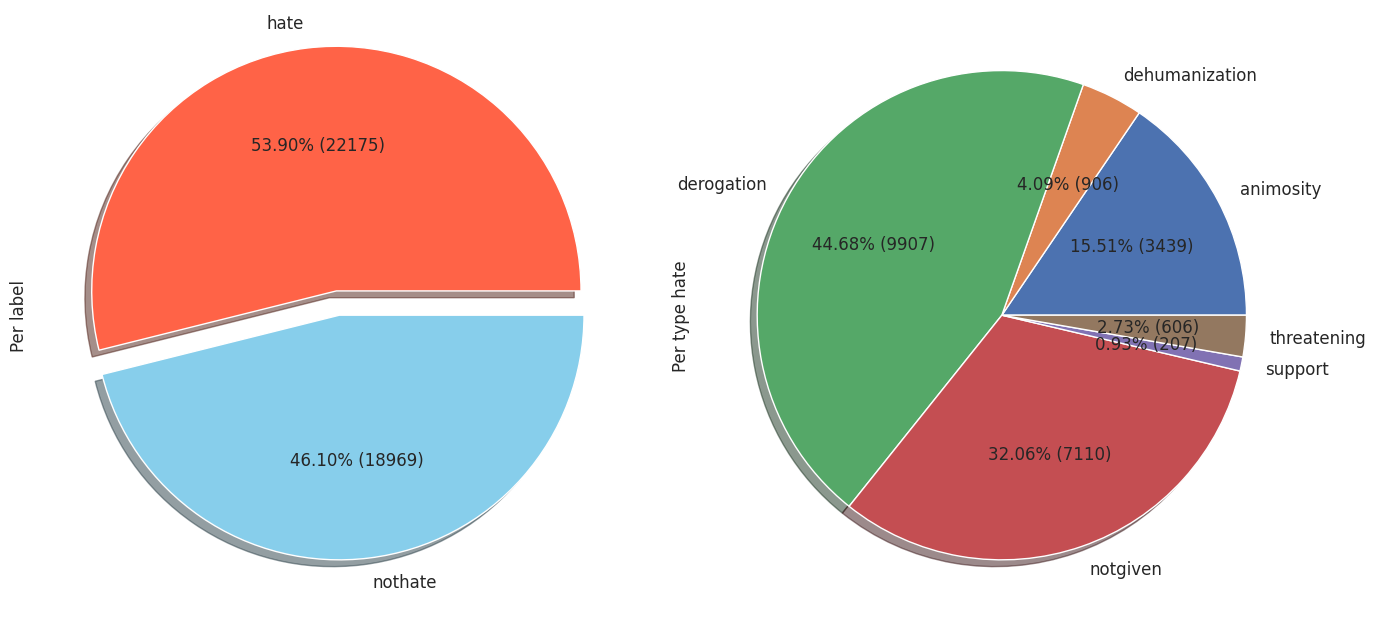

In [ ]:
#Get the percentage of label and type hate
sns.set_theme()

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(18,8))
df.groupby('label').size().plot(kind='pie',
                                autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,
                                 (p/100)*len(df)),
                                figsize=[14,14],
                                textprops={'fontsize': 12},
                                colors=['tomato', 'skyblue'],
                                explode=(0.1, 0),
                                shadow=True,
                                startangle=0,
                                ax =ax1
                                )
# ax2 = plt.subplot(121)
df[df.label == 'hate'].groupby('type').size().plot(kind = 'pie',
                               autopct = lambda p :'{:.2f}% ({:.0f})'.format(p,
                                (p/100)*len(df[df['label'] == 'hate'])),
                               figsize =[14,14],
                               textprops = {'fontsize': 12},
                               #explode=(0,0,0,0.1,0,0),
                               shadow= True,
                               startangle=0,
                               ax =ax2)
ax1.set_ylabel('Per label')
ax2.set_ylabel('Per type hate')
plt.tight_layout()
# plt.show()

In [ ]:
#We will remove from hate dataset the rows with the type "notgiven"
#However this rows could be used in Semi Supervised Learning approach for further researches in order to build robust classifiers

In [ ]:
#Get the count of target items
df[df['label']=='hate']['target'].value_counts()

target
notgiven                           7110
wom                                2035
bla                                1961
jew                                1096
mus                                1002
                                   ... 
wom, jew, mixed.race, non.white       1
mus, arab, non.white, asi.pak         1
gendermin, gay.wom, bis               1
mus, bla, immig, non.white            1
jew, mixed.race, gay                  1
Name: count, Length: 408, dtype: int64

In [ ]:
#We count characters and word occurrences to establish a possible correlation between text length and no hate/ hate(type)
df['character_length'] = (df.text.str.len() - (df.text.str.split().str.len()-1))
df['word_length'] = df.text.str.split().str.len()

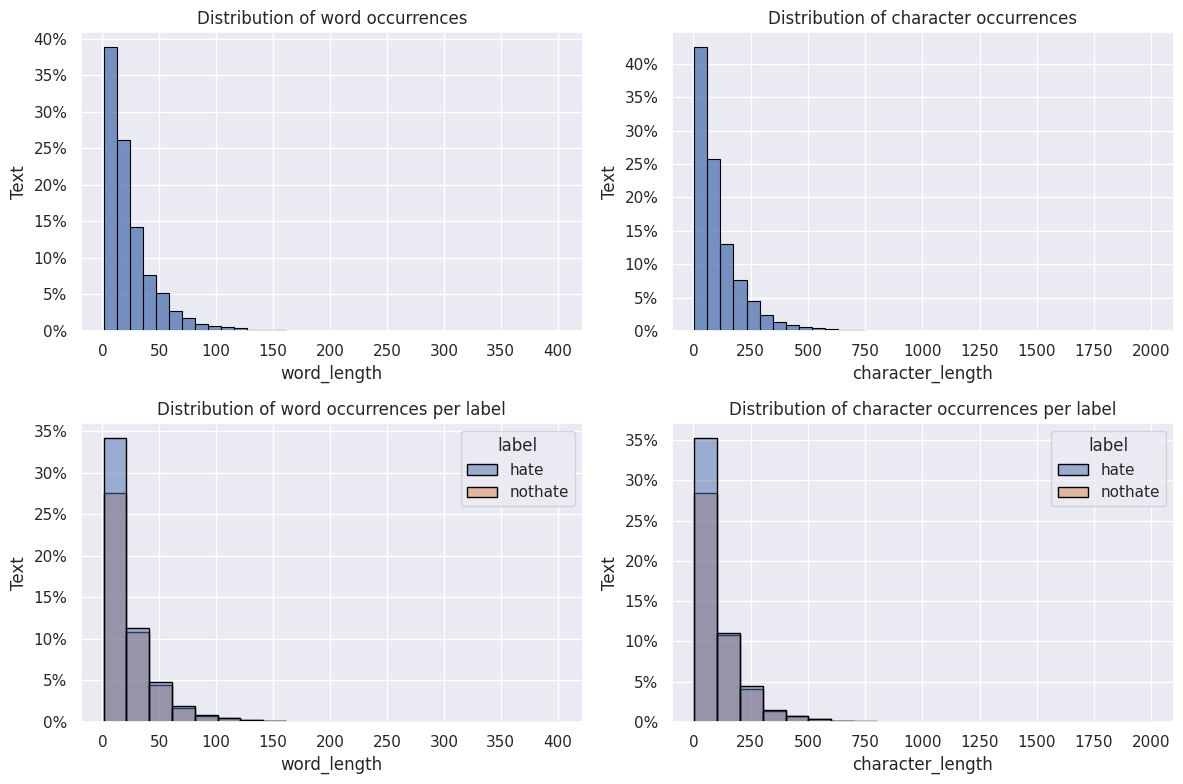

In [ ]:
#Histplot of word and character occurrences
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
sns.histplot(data = df, x = 'word_length',ax = ax[0,0], weights =
             np.ones(len(df)) / len(df),  bins= 35,edgecolor='black')
sns.histplot(data = df, x = 'character_length', ax = ax[0,1], weights =
             np.ones(len(df)) / len(df), bins = 35,edgecolor='black')
sns.histplot(data = df, x = 'word_length', ax = ax[1,0], hue='label',weights =
             np.ones(len(df)) / len(df), bins= 20,edgecolor='black')
sns.histplot(data = df, x = 'character_length',ax = ax[1,1],  hue ='label',
             weights=np.ones(len(df)) / len(df), bins = 20,edgecolor='black')


ax[0,0].set_title('Distribution of word occurrences')
ax[0,1].set_title('Distribution of character occurrences')
ax[1,0].set_title('Distribution of word occurrences per label')
ax[1,1].set_title('Distribution of character occurrences per label')

all_axes = plt.gcf().get_axes()
for ax in all_axes:
    ax.set_ylabel('Text')
    ax.yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.tight_layout()
plt.show()

In [ ]:
len(df.target.dropna().unique())

409

In [ ]:
#We observe that the majority of sentences are texts with less than 150 words and 600 characters
#The hate and non-hate labels have similarly the same behavior regarding the word and character length
#However we can denote that the hate label has more sentences. For e.g, ~28% of not hate sentences contain words with a length between 1 and 25
#Compared to ~35% of hate sentences

In [ ]:
# To create robust classifiers we remove outliers and re-define maximum sizes for characters and words
#Max word size = 200
#Max character = 600
new_df = df.loc[(df['word_length'] <=100) | (df['character_length']<=500)]

In [ ]:
len(df)

41144

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40574 entries, 0 to 41143
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   acl.id            40574 non-null  object
 1   X1                40574 non-null  int64 
 2   text              40574 non-null  object
 3   label             40574 non-null  object
 4   type              40574 non-null  object
 5   target            40566 non-null  object
 6   level             40574 non-null  object
 7   split             40574 non-null  object
 8   round.base        40574 non-null  int64 
 9   annotator         40574 non-null  object
 10  round             40574 non-null  object
 11  acl.id.matched    29530 non-null  object
 12  character_length  40574 non-null  int64 
 13  word_length       40574 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 4.6+ MB


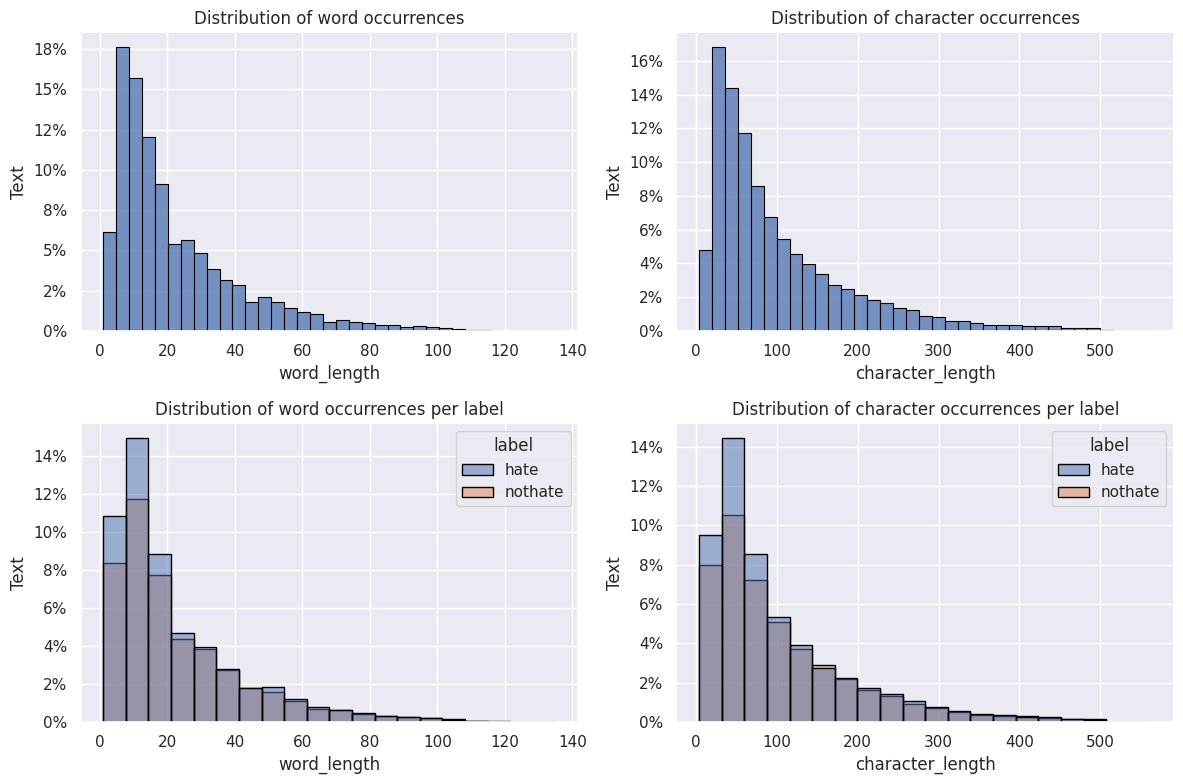

In [ ]:
#Histplot of word and character occurrences
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
sns.histplot(data = new_df, x = 'word_length',ax = ax[0,0],
             weights=np.ones(len(new_df)) / len(new_df),
             bins= 35,edgecolor='black')
sns.histplot(data = new_df, x = 'character_length', ax = ax[0,1],
             weights=np.ones(len(new_df)) / len(new_df),
             bins = 35,edgecolor='black')
sns.histplot(data = new_df, x = 'word_length', ax = ax[1,0], hue='label',
             weights=np.ones(len(new_df)) / len(new_df),
             bins= 20,edgecolor='black')
sns.histplot(data = new_df, x = 'character_length',ax = ax[1,1],  hue ='label',
             weights=np.ones(len(new_df)) / len(new_df),
             bins = 20,edgecolor='black')


ax[0,0].set_title('Distribution of word occurrences')
ax[0,1].set_title('Distribution of character occurrences')
ax[1,0].set_title('Distribution of word occurrences per label')
ax[1,1].set_title('Distribution of character occurrences per label')

all_axes = plt.gcf().get_axes()
for ax in all_axes:
    ax.set_ylabel('Text')
    ax.yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.tight_layout()
plt.show()

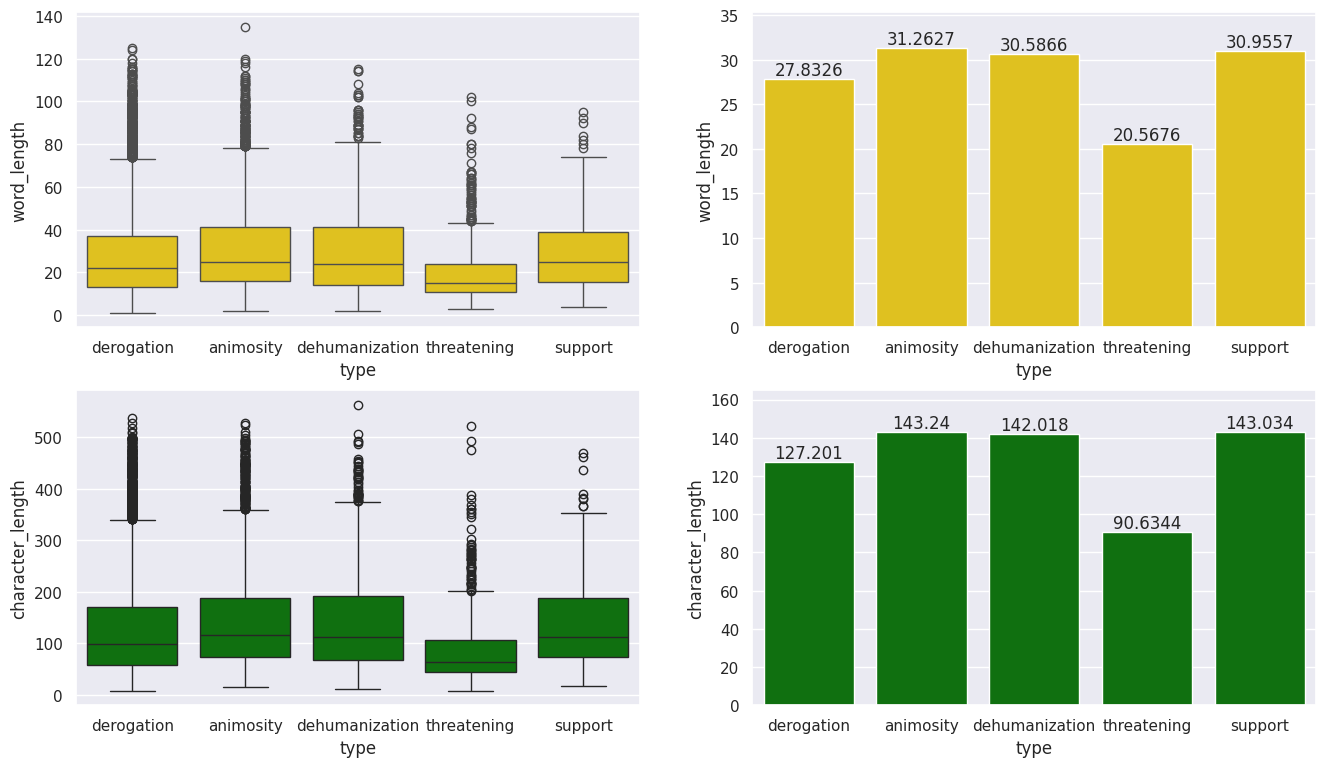

In [ ]:
#Let's establish word and character distribution for hate types
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,9))
#Word
sns.boxplot(data=new_df[(new_df.label == 'hate') & (new_df.type != 'notgiven')],
            x ='type',y= 'word_length', ax = ax[0,0],color='gold')
sns.barplot(data=new_df[(new_df.label == 'hate') & (new_df.type != 'notgiven')],
                 x ='type',y= 'word_length',err_kws={'linewidth': 0},
                 color='gold',
                 ax = ax[0,1])
#Character
sns.boxplot(data=new_df[(new_df.label == 'hate') & (new_df.type != 'notgiven')],
            x ='type',y= 'character_length', ax = ax[1,0], color = 'green')
sns.barplot(data=new_df[(new_df.label == 'hate') & (new_df.type != 'notgiven')],
                 x ='type',y= 'character_length',err_kws={'linewidth': 0},
                 color='green',
                 ax = ax[1,1])
for i in ax[0,1].containers:
    ax[0,1].bar_label(i,)
for i in ax[1,1].containers:
    ax[1,1].bar_label(i,)


In [ ]:
#We still denote some outliers for all types hate and a linear correlation between character and word observations
# Animosity and Dehumanization types seem to have the highest word and character length, and the threatening type the least one.

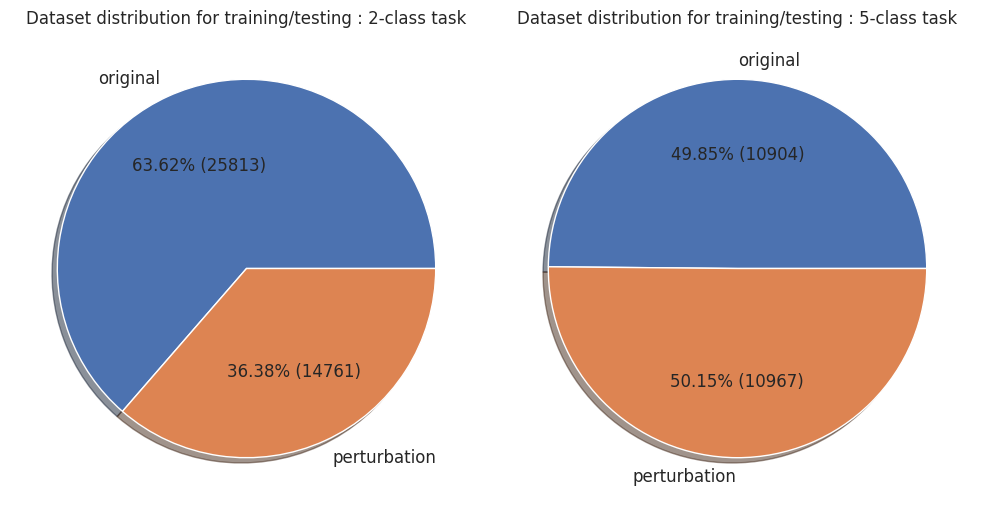

In [ ]:
#Training and Testing dataset for 2-class and 5-class
sns.set_theme()
fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(14,4))
new_df.groupby('level').size().plot(kind = 'pie',
                              autopct = lambda p: '{:.2f}% ({:.0f})'.format(p,
                              (p/100)*len(new_df)),
                              figsize = [10,10],
                              textprops = {'fontsize': 12},
                              shadow = True,
                              startangle =0,
                              ax = ax1)
new_df[(new_df['label']=='hate') & (new_df.type != 'notgiven')].groupby('level').size().plot(kind = 'pie',
                               autopct = lambda p :'{:.2f}% ({:.0f})'.format(p,
                                (p/100)*len(new_df[new_df['label'] == 'hate'])),
                               figsize =[10,10],
                               textprops = {'fontsize': 12},
                               #explode=(0,0.1),
                               shadow= True,
                               startangle=0,
                               ax =ax2)
ax1.set_title('Dataset distribution for training/testing : 2-class task')
ax2.set_title('Dataset distribution for training/testing : 5-class task')
plt.tight_layout()
plt.show()

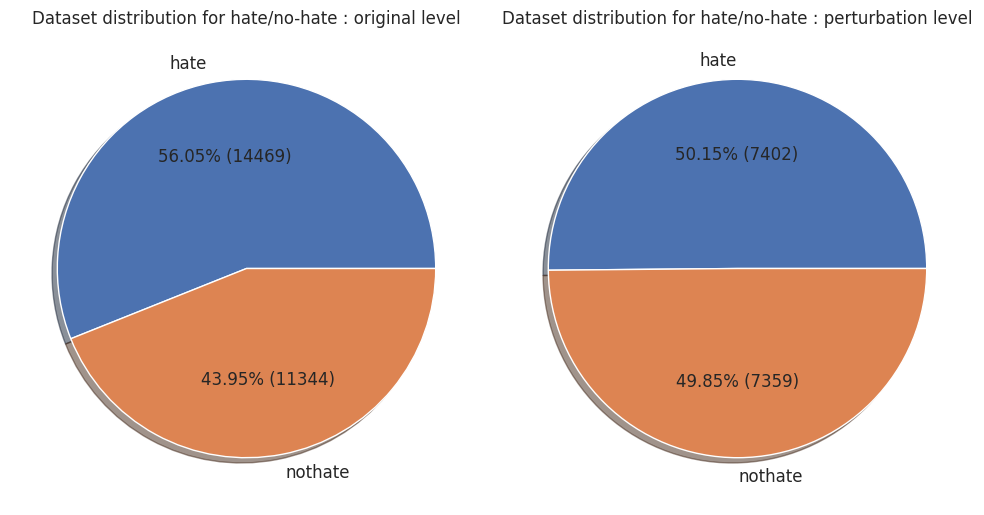

In [ ]:
#Training and Testing dataset for 2-class and 5-class
sns.set_theme()
fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(14,4))
new_df[new_df['level'] == 'original'].groupby('label').size().plot(kind = 'pie',
                              autopct = lambda p: '{:.2f}% ({:.0f})'.format(p,
                              (p/100)*len(new_df[new_df['level'] == 'original'])),
                              figsize = [10,10],
                              textprops = {'fontsize': 12},
                              shadow = True,
                              startangle =0,
                              ax = ax1)
new_df[new_df['level'] == 'perturbation'].groupby('label').size().plot(kind = 'pie',
                               autopct = lambda p :'{:.2f}% ({:.0f})'.format(p,
                                (p/100)*len(new_df[new_df['level'] == 'perturbation'])),
                               figsize =[10,10],
                               textprops = {'fontsize': 12},
                               #explode=(0,0.1),
                               shadow= True,
                               startangle=0,
                               ax =ax2)
ax1.set_title('Dataset distribution for hate/no-hate : original level')
ax2.set_title('Dataset distribution for hate/no-hate : perturbation level')
plt.tight_layout()
plt.show()

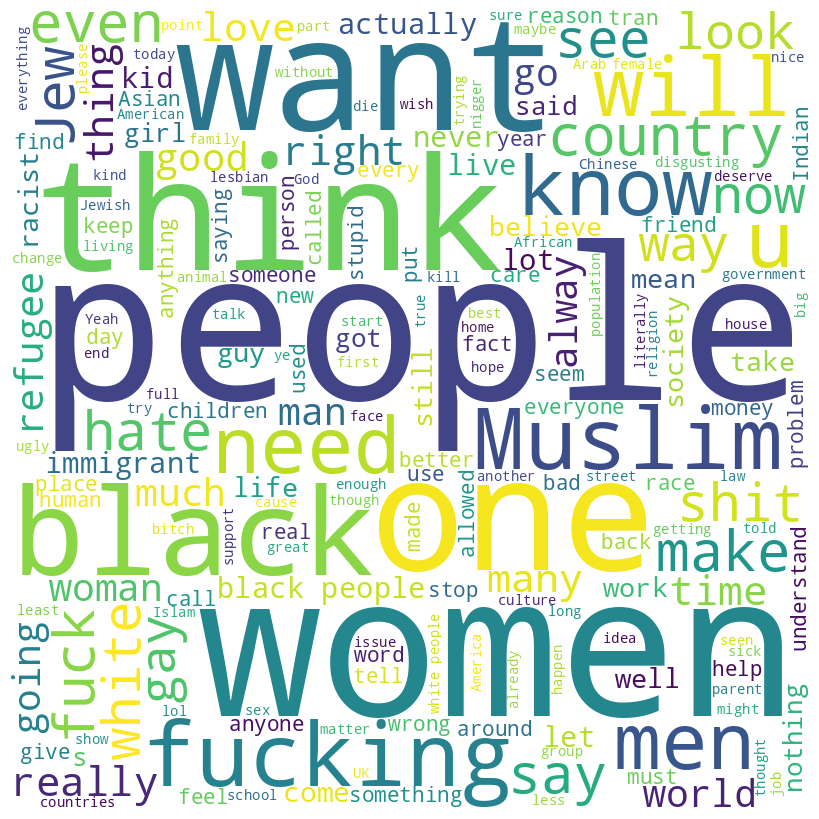

In [ ]:
#Word cloud of dataset
# # Extract the text data
text = ' '.join(new_df.text)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(text)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# <h2> *Data pre-processing* </h2>

In [ ]:
new_df.text = preprocess_text(new_df.text)
new_df.character_length = (new_df.text.str.len() -
                        (new_df.text.str.split().str.len() - 1))
new_df.word_length = new_df.text.str.split().str.len()
new_df.head()

# end = round(time.time()-start,2)
# print("This process took",end,"seconds.")

100%|██████████| 40574/40574 [00:32<00:00, 1250.92it/s]
<ipython-input-37-20b2b412fce6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.text = preprocess_text(new_df.text)
<ipython-input-37-20b2b412fce6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.character_length = (new_df.text.str.len() -
<ipython-input-37-20b2b412fce6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

This process took 43.75 seconds.


acl.id  X1                                               text label  \
0      acl1   1                                    dalits lowlives  hate   
1     acl10   2                          gay people burden society  hate   
2    acl100   3                                       arab welcome  hate   
3   acl1000   4  say actually eliminate heebs wish naturally be...  hate   
4  acl10000   5                               bananas black people  hate   

       type    target     level  split  round.base   annotator round  \
0  notgiven  notgiven  original  train           1  GNZuCtwed3     1   
1  notgiven  notgiven  original  train           1  GNZuCtwed3     1   
2  notgiven  notgiven  original  train           1  vDe7GN0NrL     1   
3  notgiven  notgiven  original  train           1  oemYWm1Tjg     1   
4  notgiven  notgiven  original   test           1  QiOKkCi7F8     1   

  acl.id.matched  character_length  word_length  
0            NaN                14            2  
1            NaN                22            4  
2            NaN                11            2  
3            NaN                51            8  
4            NaN                18            3

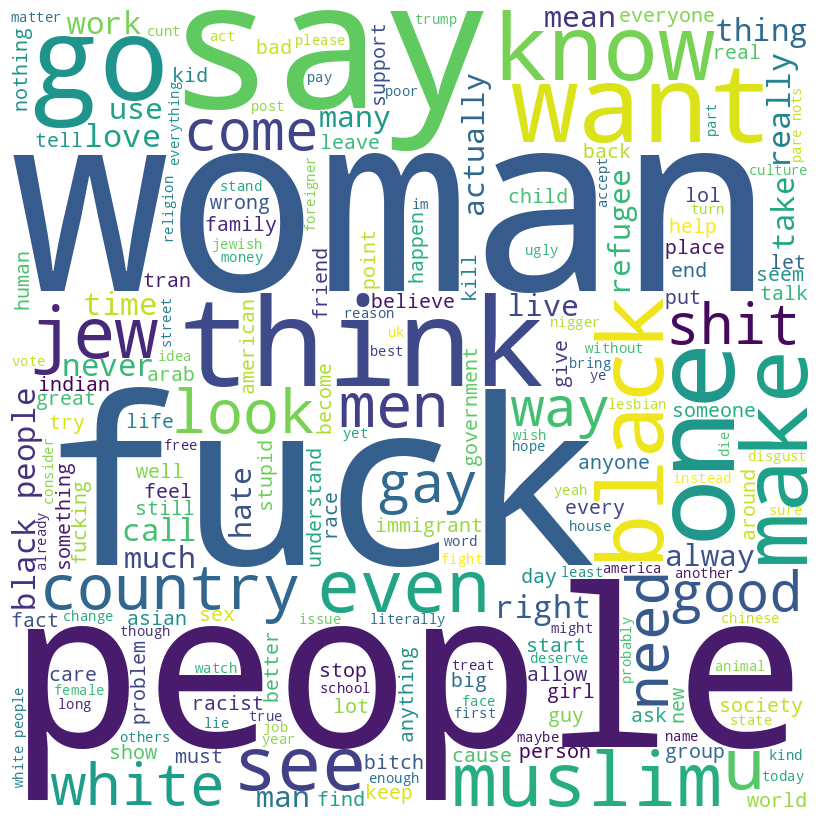

In [ ]:
#Word cloud of dataset
# Extract the text data
text = ' '.join(new_df.text)
# Generate the word cloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(text)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

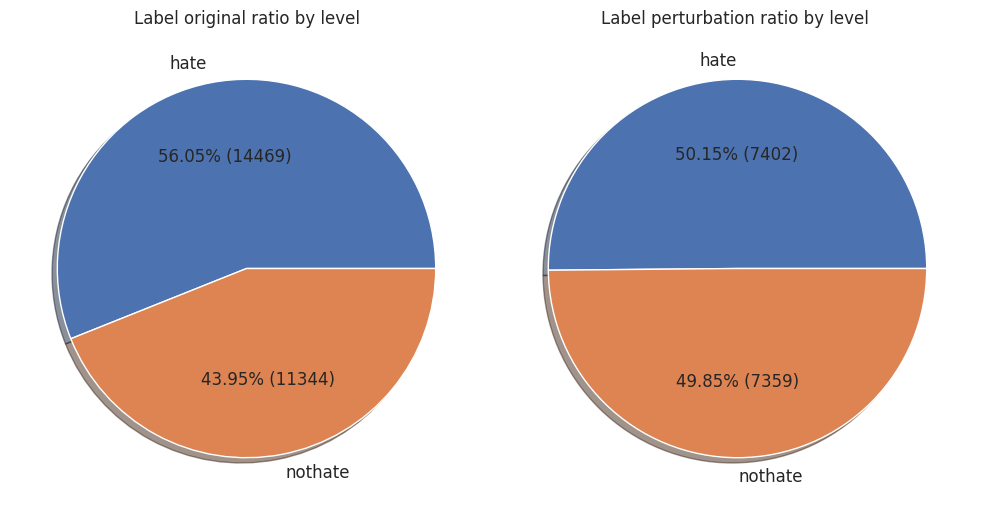

In [ ]:
#Label ratio by level
sns.set_theme()
fig, (ax1,ax2)= plt.subplots(ncols = 2, figsize=(5,5))
new_df[(new_df['level']=='original')].groupby('label').size().plot(kind = 'pie',
                               autopct = lambda p :'{:.2f}% ({:.0f})'.format(p,(p/100)*len(new_df[new_df['level'] == 'original'])),
                               figsize = [10,10],
                               textprops = {'fontsize': 12},
                               #explode=(0,0.1),
                               shadow= True,
                               startangle=0,
                               ax = ax1
                               )
new_df[(new_df['level']=='perturbation')].groupby('label').size().plot(kind =
                                'pie',
                               autopct = lambda p :'{:.2f}% ({:.0f})'.format(p,
                              (p/100)*len(new_df[new_df['level'] ==
                              'perturbation'])),
                               figsize = [10,10],
                               textprops = {'fontsize': 12},
                               #explode=(0,0.1),
                               shadow= True,
                               startangle=0,
                               ax = ax2
                               )
ax1.set_title('Label original ratio by level')
ax2.set_title('Label perturbation ratio by level ')
plt.tight_layout()
plt.show()

# <h2> *Data splitting* </h3>

In [ ]:
# ######2-class case######
# X_train = new_df[new_df.level == 'original']['text']
# y_train = new_df[new_df.level == 'original']['label']

# perturbation_data_text = new_df[new_df.level == 'perturbation']['text']
# perturbation_data_label = new_df[new_df.level == 'perturbation']['label']

# X_train = new_df[new_df.level == 'perturbation']['text']
# y_train = new_df[new_df.level == 'perturbation']['label']

# original_data_text = new_df[new_df.level == 'original']['text']
# original_data_label = new_df[new_df.level == 'original']['label']
# Data split


# #####Multi-label case####

# X = new_df[(new_df['label']=='hate') & (new_df.type != 'notgiven')]['text']
# y = new_df[(new_df['label']=='hate') & (new_df.type != 'notgiven')]['type']

# Splitting
X_train, X_dev, y_train, y_dev = train_test_split(new_df.text, new_df.label, test_size=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Multi-task case
# X_train_mult, X_dev_mult, y_train_mult, y_dev_mult = train_test_split(X, y, test_size = 0.3, random_state=42)
# X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(X_train_mult, y_train_mult, test_size = 0.2, random_state=42)

# X_dev, X_test, y_dev, y_test = train_test_split(original_data_text,
#                                                 original_data_label,
#                         #perturbation_data_label,
#                         test_size = 0.25,
#                         random_state = 64)

# X_dev, X_test, y_dev, y_test = train_test_split(perturbation_data_text,
#                                                 perturbation_data_label,
#                         #perturbation_data_label,
#                         test_size = 0.8,
#                         random_state = 42)

#create the transforms
tf_idf_vectorizer = TfidfVectorizer(max_features= 20000, max_df=0.5,
                                    ngram_range= (1,2), use_idf=False,
                                    norm="l1")
# vectorizer_original = TfidfVectorizer()
# vectorizer_perturbation = TfidfVectorizer()

#tokenize and build vocabulary
#tf_idf_vectorizer.fit_transform(new_df.text)
#vectorizer_original.fit(original_data_text)
# encode the document
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)

#tokenize and build vocabulary
#vectorizer_perturbation.fit(perturbation_data_text)
#encode the document
X_dev_tf_idf = tf_idf_vectorizer.transform(X_dev)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

# Multi-task case
# X_train_tf_idf_mult = tf_idf_vectorizer.fit_transform(X_train_mult)

#tokenize and build vocabulary
#vectorizer_perturbation.fit(perturbation_data_text)
#encode the document
# X_dev_tf_idf_mult = tf_idf_vectorizer.transform(X_dev_mult)
# X_test_tf_idf_mult = tf_idf_vectorizer.transform(X_test_mult)


#Encoding categorical values into numerical values

Encoder_ = LabelEncoder()
y_train = Encoder_.fit_transform(y_train)
y_dev = Encoder_.fit_transform(y_dev)
y_test = Encoder_.fit_transform(y_test)

# Encoder = LabelEncoder()
# y_train_mult = Encoder.fit_transform(y_train_mult)
# y_dev_mult = Encoder.fit_transform(y_dev_mult)
# y_test_mult = Encoder.fit_transform(y_test_mult)



# #summarize
#print(f" Vocabulary of vectorizer on original data is {tf_idf_vectorizer.vocabulary_}")
#print(f" Vocabulary of vectorizer on pertubated data is {vectorizer_perturbation.vocabulary_}")
#print(vectorizer_perturbation.idf_)
print(f" Shape of X_train is  {X_train_tf_idf.shape}")
print(f" Shape of X_dev is  {X_dev_tf_idf.shape}")
print(f" Shape of X_test is  {X_test_tf_idf.shape}")
print("\n")
# print(f" Shape of X_train_mult is  {X_train_tf_idf_mult.shape}")
# print(f" Shape of X_dev_mult is  {X_dev_tf_idf_mult.shape}")
# print(f" Shape of X_test_mult is  {X_test_tf_idf_mult.shape}")

 Shape of X_train is  (19475, 20000)
 Shape of X_dev is  (16230, 20000)
 Shape of X_test is  (4869, 20000)




In [ ]:
Encoder_.classes_

array(['hate', 'nothate'], dtype=object)

In [ ]:
hate_to_code = dict(zip(Encoder_.classes_, Encoder_.transform(Encoder_.classes_)))
print(hate_to_code)

{'hate': 0, 'nothate': 1}


# <h2> *Baseline Models Evaluation* </h2>

## <h3> *Tf-idf - FastText - GloVE Building* </h3>

In [ ]:
start = time.time()
# # # Get UTF-8 format for text data
# #new_df.text.to_csv('text.txt', header=False, index=False)
# # Train our fasttext model
# ftt = fasttext.train_supervised(input = 'text.txt',
#                                   lr=1.0,
#                                   minn=2, maxn=5,
#                                   dim = 300,
#                                   epoch=30,
#                                   wordNgrams=3,
#                                   verbose=3)
# Tokenize text
tokenizer = Tokenizer()
new_df['tokenized'] = new_df.text.apply(lambda text: text.split())
# #  ################################### FASTTEXT GENSIM and GLoVE BUILDING ############################################
# # # Fasttext model initialization and building
fasttext_model= FastText(vector_size=300,alpha=0.025,window=5,
                         max_final_vocab = 20000,workers=5)
fasttext_model.build_vocab(new_df.tokenized)
fasttext_model.train(new_df.tokenized, total_examples=len(new_df.tokenized),
                     epochs=40)
fasttext_model.save("FastText_file_2_300.bin")

# We build 3 fastText models: one with max_final_vocab = 10k, another with max_final_vocab = 5k and the last one without this parameter.
# FastText model loading
# fast_text_model_ = FastText.load("/content/FastText_file_2_50.bin")
# fast_text_model_ = FastText.load("/content/FastText_file_2_100.bin")
# fast_text_model_ = FastText.load("/content/FastText_file_2_200.bin")
fast_text_model_ = FastText.load("/content/FastText_file_2_300.bin")
# # # fast_text_model_1 = FastText.load("FastText_file_0_.bin")
# # fast_text_model_2 = FastText.load("FastText_file_1_.bin")
# # GloVE building
# glove_model_ = load_embeddings('/content/drive/MyDrive/glove.6B.50d.txt')
# glove_model_ = load_embeddings('/content/drive/MyDrive/glove.6B.100d.txt')
# glove_model_ = load_embeddings('/content/drive/MyDrive/glove.6B.200d.txt')
glove_model_ = load_embeddings('/content/drive/MyDrive/glove.6B.300d.txt')

# # Vocabulary building
# We will use the same vocabulary for both FastText and Glove
# vocab = fast_text_model_.wv.key_to_index
# print(word_index)
# vocab_size_ = len(vocab) + 1
# print(vocab_size_)

end = round(time.time()-start,2)
print("This process took",end,"seconds.")

<ipython-input-41-cf04c3abdeed>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tokenized'] = new_df.text.apply(lambda text: text.split())
400000it [00:26, 15259.47it/s]

This process took 92.56 seconds.


## <h4> *Binary task* </h4>

In [ ]:
# # # Vectorize data
start = time.time()
# # param for vectorize_text function : text, emb_model, emb_dim, max_seq, average = False
X_train_ftt =  np.asarray([vectorize_text(text,fast_text_model_,300, 100, True) for text in X_train])
X_dev_ftt = np.asarray([vectorize_text(text,fast_text_model_,300, 100, True) for text in X_dev])
X_test_ftt = np.asarray([vectorize_text(text,fast_text_model_,300, 100, True) for text in X_test])

X_train_glove_ = np.asarray([vectorize_text(text,glove_model_,300, 100, True) for text in X_train])
X_dev_glove_ = np.asarray([vectorize_text(text,glove_model_,300, 100, True) for text in X_dev])
X_test_glove_ = np.asarray([vectorize_text(text,glove_model_,300,100 ,True) for text in X_test])

end = round(time.time()-start,2)
minutes = end // 60 # Get whole minutes
seconds_remaining = end % 60 # Get remaining seconds
print(f"This process took {int(minutes)} minutes, {seconds_remaining:.2f} seconds")

This process took 0 minutes, 13.94 seconds


In [ ]:
print(X_train.shape)
print(X_train_tf_idf.shape)
print(X_train_ftt.shape)
print(X_train_glove_.shape)
print('\n')
print(X_dev.shape)
print(X_dev_tf_idf.shape)
print(X_dev_ftt.shape)
print(X_dev_glove_.shape)
print('\n')
print(X_test.shape)
print(X_test_tf_idf.shape)
print(X_test_ftt.shape)
print(X_test_glove_.shape)

(19475,)
(19475, 20000)
(19475, 300)
(19475, 300)


(16230,)
(16230, 20000)
(16230, 300)
(16230, 300)


(4869,)
(4869, 20000)
(4869, 300)
(4869, 300)


In [ ]:
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)
print('\n')


(19475,)
(16230,)
(4869,)




## <h4> *Multi-task* </h4>

In [ ]:
# # # Vectorize data    Multitask case
start = time.time()
# # param for vectorize_text function : text, emb_model, emb_dim, max_seq, average = False
X_train_ftt_mult =  np.asarray([vectorize_text(text,fast_text_model_,300, 100, True) for text in X_train_mult])
X_dev_ftt_mult = np.asarray([vectorize_text(text,fast_text_model_,300, 100, True) for text in X_dev_mult])
X_test_ftt_mult = np.asarray([vectorize_text(text,fast_text_model_,300, 100, True) for text in X_test_mult])

X_train_glove_mult = np.asarray([vectorize_text(text,glove_model_,300, 100, True) for text in X_train_mult])
X_dev_glove_mult = np.asarray([vectorize_text(text,glove_model_,300, 100, True) for text in X_dev_mult])
X_test_glove_mult = np.asarray([vectorize_text(text,glove_model_,300,100 ,True) for text in X_test_mult])

end = round(time.time()-start,2)
minutes = end // 60 # Get whole minutes
seconds_remaining = end % 60 # Get remaining seconds
print(f"This process took {int(minutes)} minutes, {seconds_remaining:.2f} seconds")

This process took 0 minutes, 5.10 seconds


In [ ]:
print(X_train_tf_idf_mult.shape)
print(X_train_ftt_mult.shape)
print(X_train_glove_mult.shape)
print('\n')
print(X_dev_tf_idf_mult.shape)
print(X_dev_ftt_mult.shape)
print(X_dev_glove_mult.shape)
print('\n')
print(X_test_tf_idf_mult.shape)
print(X_test_ftt_mult.shape)
print(X_test_glove_mult.shape)

(8265, 20000)
(8265, 300)
(8265, 300)


(4429, 20000)
(4429, 300)
(4429, 300)


(2067, 20000)
(2067, 300)
(2067, 300)


In [ ]:
# start = time.time()
# pca_model = PCA(n_components = 500).fit(X_train_ftt)
# print("Sum of variance ratios: ",sum(pca_model.explained_variance_ratio_))
# end = round(time.time()-start,2)
# minutes = end // 60 # Get whole minutes
# seconds_remaining = end % 60 # Get remaining seconds
# print(f"This process took {int(minutes)} minutes, {seconds_remaining:.2f} seconds")

In [ ]:
# start = time.time()
# pca_model_glove = PCA(n_components = 3000).fit(X_train_glove_)
# print("Sum of variance ratios: ",sum(pca_model_glove.explained_variance_ratio_))
# end = round(time.time()-start,2)
# minutes = end // 60 # Get whole minutes
# seconds_remaining = end % 60 # Get remaining seconds
# print(f"This process took {int(minutes)} minutes, {seconds_remaining:.2f} seconds")

In [ ]:
# # # PCA reduction

# start = time.time()
# # # param for vectorize_text function : text, emb_model, emb_dim, max_seq, average = False
# X_train_ftt_pca = pca_model.transform(X_train_ftt)
# X_dev_ftt_pca = pca_model.transform(X_dev_ftt)
# X_test_ftt_pca = pca_model.transform(X_test_ftt)

# X_train_glove_pca = pca_model_glove.transform(X_train_glove_)
# X_dev_glove_pca = pca_model_glove.transform(X_dev_glove_)
# X_test_glove_pca = pca_model_glove.transform(X_test_glove_)


# end = round(time.time()-start,2)
# minutes = end // 60 # Get whole minutes
# seconds_remaining = end % 60 # Get remaining seconds
# print(f"This process took {int(minutes)} minutes, {seconds_remaining:.2f} seconds")

In [ ]:
# print(X_train.shape)
# print(X_train_tf_idf.shape)
# print(X_train_ftt_pca.shape)
# print(X_train_glove_pca.shape)
# print('\n')
# print(X_dev.shape)
# print(X_dev_tf_idf.shape)
# print(X_dev_ftt_pca.shape)
# print(X_dev_glove_pca.shape)
# print('\n')
# print(X_test.shape)
# print(X_test_tf_idf.shape)
# print(X_test_ftt_pca.shape)
# print(X_test_glove_pca.shape)

In [ ]:
# import gensim
# def keep_words(word, count, min_count):
#     if word in word_list:
#         return gensim.utils.RULE_KEEP
#     else:
#         return gensim.utils.RULE_DEFAULT

# word_list = ['word1', 'word2', ...] # List of words to keep
# model.build_vocab(corpus, trim_rule=keep_words)

## <h3>*GridSearch CV Evaluation*</h3>

## <h4>*Binary task*</h4>

In [ ]:
sgd_clf = SGDClassifier(loss='hinge')

param_grid = {
    'alpha': [0.01, 0.001, 0.0001],
    'penalty': ['l1', 'l2'],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(sgd_clf, param_grid, cv=10, scoring='accuracy', verbose = 3)

# Fit the GridSearchCV object to  data
grid_search.fit(X_train_tf_idf, y_train)

print(grid_search.best_params_)
# Get the best estimator
best_sgd_clf = grid_search.best_estimator_
#{'alpha': 0.0001, 'penalty': 'l2'}
y_pred = best_sgd_clf.predict(X_dev_tf_idf)
print(classification_report(y_dev, y_pred))

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.1s
[CV 2/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.1s
[CV 3/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.1s
[CV 4/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.1s
[CV 5/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.1s
[CV 6/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.1s
[CV 7/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.1s
[CV 8/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.1s
[CV 9/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.1s
[CV 10/10] END ..........alpha=0.01, penalty=l1;, score=0.537 total time=   0.1s
[CV 1/10] END ...........alpha=0.01, penalty=l2;, score=0.537 total time=   0.1s
[CV 2/10] END ...........alpha=0.01, penalty=l2;

In [ ]:
sgd_clf = SGDClassifier(loss='hinge')

param_grid = {
    'alpha': [0.01, 0.001, 0.0001],
    'penalty': ['l1', 'l2'],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(sgd_clf, param_grid, cv=10, scoring='accuracy', verbose = 3)

# Fit the GridSearchCV object to  data
grid_search.fit(X_train_ftt, y_train)

print(grid_search.best_params_)
# Get the best estimator
best_sgd_clf = grid_search.best_estimator_
#{'alpha': 0.0001, 'penalty': 'l2'}
y_pred = best_sgd_clf.predict(X_dev_ftt)
print(classification_report(y_dev, y_pred))

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.6s
[CV 2/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.6s
[CV 3/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.6s
[CV 4/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.6s
[CV 5/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.6s
[CV 6/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.6s
[CV 7/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.6s
[CV 8/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.6s
[CV 9/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.6s
[CV 10/10] END ..........alpha=0.01, penalty=l1;, score=0.537 total time=   0.6s
[CV 1/10] END ...........alpha=0.01, penalty=l2;, score=0.537 total time=   0.2s
[CV 2/10] END ...........alpha=0.01, penalty=l2;

In [ ]:
sgd_clf = SGDClassifier(loss='hinge')

param_grid = {
    'alpha': [0.01, 0.001, 0.0001],
    'penalty': ['l1', 'l2'],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(sgd_clf, param_grid, cv=10, scoring='accuracy', verbose = 3)

# Fit the GridSearchCV object to  data
grid_search.fit(X_train_glove_, y_train)

print(grid_search.best_params_)
# Get the best estimator
best_sgd_clf = grid_search.best_estimator_
#{'alpha': 0.0001, 'penalty': 'l2'}
y_pred = best_sgd_clf.predict(X_dev_glove_)
print(classification_report(y_dev, y_pred))

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.5s
[CV 2/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.6s
[CV 3/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.6s
[CV 4/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.6s
[CV 5/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.6s
[CV 6/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.6s
[CV 7/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.6s
[CV 8/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.6s
[CV 9/10] END ...........alpha=0.01, penalty=l1;, score=0.537 total time=   0.6s
[CV 10/10] END ..........alpha=0.01, penalty=l1;, score=0.537 total time=   0.6s
[CV 1/10] END ...........alpha=0.01, penalty=l2;, score=0.537 total time=   0.3s
[CV 2/10] END ...........alpha=0.01, penalty=l2;

In [ ]:
#SVM parameters
lsvc_model = LinearSVC(max_iter= 10000)
param_grid_lsvc = {'C': [0.1, 1, 10, 100]}

#GridSearch
grid_lsvc = GridSearchCV(lsvc_model,param_grid_lsvc, verbose = 3, cv = 10, scoring ='accuracy')
#fitting the model
grid_lsvc.fit(X_train_tf_idf,y_train)
#print best params
print(grid_lsvc.best_params_)
#Predictions
y_pred = grid_lsvc.best_estimator_.predict(X_dev_tf_idf)
# # print classification report
print(classification_report(y_dev, y_pred))
#{'C': 0.1}

In [ ]:
# ##LOGISTIC REGRESSION

# # Create a pipeline
# # pipe = make_pipeline(LogisticRegression(max_iter= 10))
# log_reg = LogisticRegression(max_iter = 10000)
# # Define parameter grid
# param_grid = {'C': [0.01, 0.1, 1],
#               'penalty': ['l1', 'l2'],
#               'solver': ['liblinear','saga'],
#               }


# # Create GridSearchCV object
# grid_search = GridSearchCV(log_reg, param_grid, scoring='accuracy', cv=10, verbose = 3)

# # Fit on training data
# grid_search.fit(X_train_tf_idf, y_train)
# #log_reg.fit(X_train_tf_idf, y_train)
# print(grid_search.best_params_)
# # Evaluate on validation set
# y_val_pred = grid_search.best_estimator_.predict(X_dev_tf_idf)
# print(classification_report(y_dev, y_val_pred))
# #{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
# #XGBOOST
# xgb = XGBClassifier(learning_rate = 0.1,
#  n_estimators=100,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)

# #Fit it on data
# xgb.fit(X_train_tf_idf,y_train)
# #Predict dev set
# y_pred_xgb = xgb.predict(X_dev_tf_idf)
# print("\nModel Report")
# print(classification_report(y_dev, y_pred_xgb))

In [ ]:
# # param_test1 = {
# #  'alpha':[0, 0.001, 0.005, 0.01, 0.05]
# # }

# # gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1,
# # n_estimators=140,colsample_bytree =0.8, subsample =0.8,
# # gamma=0.2, max_depth = 9, min_child_weight = 1,
# # objective= 'binary:logistic', scale_pos_weight=1, seed=27),
# # param_grid = param_test1, scoring='accuracy',cv=5,verbose =3)
# # gsearch1.fit(X_train_tf_idf,y_train)
# # # print(gsearch1.grid_scores_)
# # print(gsearch1.best_score_)
# # print(gsearch1.best_params_)
# #XGBOOST
# xgb = XGBClassifier(learning_rate =0.1,
#  n_estimators=100,
#  max_depth=9,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  scale_pos_weight=1,
#  seed=27)

# #Fit it on data
# xgb.fit(X_train_tf_idf,y_train)
# #Predict dev set
# y_pred_xgb = xgb.predict(X_dev_tf_idf)
# print("\nModel Report")
# print(classification_report(y_dev, y_pred_xgb))

## <h3>*Multi task*</h3>

In [ ]:
from sklearn.metrics import make_scorer, average_precision_score
pr_auc_scorer = make_scorer(average_precision_score, needs_proba=True)
sgd_clf = SGDClassifier(loss='hinge')

param_grid = {
    'alpha': [0.01, 0.001, 0.0001],
    'penalty': ['l1', 'l2'],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(sgd_clf, param_grid, cv=10, scoring='pr_auc_scorer', verbose = 3)

# Fit the GridSearchCV object to  data
grid_search.fit(X_train_tf_idf_mult, y_train_mult)

print(grid_search.best_params_)
# Get the best estimator
best_sgd_clf = grid_search.best_estimator_
#{'alpha': 0.0001, 'penalty': 'l2'}
y_pred = best_sgd_clf.predict(X_dev_tf_idf_mult)
print(classification_report(y_dev_mult, y_pred))

NameError: name 'average_precision_score' is not defined

In [ ]:
sgd_clf = SGDClassifier(loss='hinge')

param_grid = {
    'alpha': [0.01, 0.001, 0.0001],
    'penalty': ['l1', 'l2'],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(sgd_clf, param_grid, cv=10, scoring='accuracy', verbose = 3)

# Fit the GridSearchCV object to  data
grid_search.fit(X_train_ftt_mult, y_train_mult)

print(grid_search.best_params_)
# Get the best estimator
best_sgd_clf = grid_search.best_estimator_
#{'alpha': 0.0001, 'penalty': 'l2'}
y_pred = best_sgd_clf.predict(X_dev_ftt_mult)
print(classification_report(y_dev_mult, y_pred))

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END ...........alpha=0.01, penalty=l1;, score=0.659 total time=   0.5s
[CV 2/10] END ...........alpha=0.01, penalty=l1;, score=0.659 total time=   0.6s
[CV 3/10] END ...........alpha=0.01, penalty=l1;, score=0.659 total time=   0.6s
[CV 4/10] END ...........alpha=0.01, penalty=l1;, score=0.659 total time=   0.5s
[CV 5/10] END ...........alpha=0.01, penalty=l1;, score=0.659 total time=   0.5s
[CV 6/10] END ...........alpha=0.01, penalty=l1;, score=0.659 total time=   0.5s
[CV 7/10] END ...........alpha=0.01, penalty=l1;, score=0.659 total time=   0.6s
[CV 8/10] END ...........alpha=0.01, penalty=l1;, score=0.659 total time=   0.6s
[CV 9/10] END ...........alpha=0.01, penalty=l1;, score=0.659 total time=   0.5s
[CV 10/10] END ..........alpha=0.01, penalty=l1;, score=0.659 total time=   0.6s
[CV 1/10] END ...........alpha=0.01, penalty=l2;, score=0.659 total time=   0.2s
[CV 2/10] END ...........alpha=0.01, penalty=l2;

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# #SVM parameters
# lsvc_model = LinearSVC(max_iter= 10000)
# param_grid_lsvc = {'C': [0.1, 1, 10, 100]}

# #GridSearch
# grid_lsvc = GridSearchCV(lsvc_model,param_grid_lsvc, verbose = 3, cv = 10, scoring ='accuracy')
# #fitting the model
# grid_lsvc.fit(X_train_tf_idf,y_train)
# #print best params
# print(grid_lsvc.best_params_)
# #Predictions
# y_pred = grid_lsvc.best_estimator_.predict(X_dev_tf_idf)
# # # print classification report
# print(classification_report(y_dev, y_pred))
# #{'C': 0.1}

In [ ]:
# ##LOGISTIC REGRESSION

# # Create a pipeline
# # pipe = make_pipeline(LogisticRegression(max_iter= 10))
# log_reg = LogisticRegression(max_iter = 10000)
# # Define parameter grid
# param_grid = {'C': [0.01, 0.1, 1],
#               'penalty': ['l1', 'l2'],
#               'solver': ['liblinear','saga'],
#               }


# # Create GridSearchCV object
# grid_search = GridSearchCV(log_reg, param_grid, scoring='accuracy', cv=10, verbose = 3)

# # Fit on training data
# grid_search.fit(X_train_tf_idf, y_train)
# #log_reg.fit(X_train_tf_idf, y_train)
# print(grid_search.best_params_)
# # Evaluate on validation set
# y_val_pred = grid_search.best_estimator_.predict(X_dev_tf_idf)
# print(classification_report(y_dev, y_val_pred))
# #{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
# #XGBOOST
# xgb = XGBClassifier(learning_rate = 0.1,
#  n_estimators=100,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)

# #Fit it on data
# xgb.fit(X_train_tf_idf,y_train)
# #Predict dev set
# y_pred_xgb = xgb.predict(X_dev_tf_idf)
# print("\nModel Report")
# print(classification_report(y_dev, y_pred_xgb))

In [ ]:
# # param_test1 = {
# #  'alpha':[0, 0.001, 0.005, 0.01, 0.05]
# # }

# # gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1,
# # n_estimators=140,colsample_bytree =0.8, subsample =0.8,
# # gamma=0.2, max_depth = 9, min_child_weight = 1,
# # objective= 'binary:logistic', scale_pos_weight=1, seed=27),
# # param_grid = param_test1, scoring='accuracy',cv=5,verbose =3)
# # gsearch1.fit(X_train_tf_idf,y_train)
# # # print(gsearch1.grid_scores_)
# # print(gsearch1.best_score_)
# # print(gsearch1.best_params_)
# #XGBOOST
# xgb = XGBClassifier(learning_rate =0.1,
#  n_estimators=100,
#  max_depth=9,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  scale_pos_weight=1,
#  seed=27)

# #Fit it on data
# xgb.fit(X_train_tf_idf,y_train)
# #Predict dev set
# y_pred_xgb = xgb.predict(X_dev_tf_idf)
# print("\nModel Report")
# print(classification_report(y_dev, y_pred_xgb))

## <h3> *Dev Evaluation* </h3>

In [ ]:
#All models (after being tuned by GridSearch Cross Validation)
# knn_model = KNeighborsClassifier(n_neighbors=5)
# rfc_model = RandomForestClassifier()
sgd_clf = SGDClassifier(loss='hinge',alpha = 0.0001, penalty = 'l2')
lsvc_model = LinearSVC(C = 0.1, max_iter = 10000,dual=True)
log_reg = LogisticRegression(C = 1, penalty = 'l2', solver = 'liblinear', max_iter = 10000)
xgb = XGBClassifier(learning_rate = 0.1, n_estimators=100, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                    objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
# 'Linear SVM classifier': lsvc_model

models = {'SGD classifier':sgd_clf, 'Linear SVM classifier': lsvc_model, 'Logistic Regression classifier': log_reg, 'XGBOOST classifier': xgb}


In [ ]:
# pipeline = Pipeline([
#     ('vect', TfidfVectorizer()),
#     ('xgb', xgb )
# ])

# # Define the parameter grid for TfidfVectorizer
# param_grid = {
#     'vect__max_df': (0.5, 0.75, 1.0),
#     'vect__max_features': (None, 5000, 10000),
#     'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
#     'vect__use_idf': (True, False),
#     'vect__norm': ('l1', 'l2')
# }

# # Create the grid search object
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose= 3)

# # Fit the grid search object to the data
# grid_search.fit(X_train, y_train)

# # Print the best parameters
# print("Best parameters: ", grid_search.best_params_)

# # Get the best estimator
# best_model = grid_search.best_estimator_

In [ ]:
# log_reg.fit(X_train_ftt_gensim,y_train)
# y_pred_temp = log_reg.predict(y_dev)
# print(classification_report(y_dev,y_pred_temp))

## <h3>*TF-idf- FastText- GloVE Evaluation - All*</h3>

In [ ]:
#TF-IDF Case
start = time.time()
best_model_tf_idf = evaluate_model_ml_cv(models, X_train_tf_idf, X_dev_tf_idf, X_test_tf_idf, y_train, y_dev, y_test)
end = round(time.time()-start,2)
print("This process took",end,"seconds.")

----------------------------------------------------------------
SGD classifier case
----------------------------------------------------------------
Cross-validation scores: [0.616, 0.619, 0.615]
Average cross-validation accuracy score: 0.616


Cross-validation scores: [0.547, 0.552, 0.553]
Average cross-validation f1-score: 0.551


Cross-validation scores: [0.713, 0.724, 0.715]
Average cross-validation roc-auc score: 0.717


Development set accuracy: 0.618
Development set F1-score: 0.555
Development set AUC-ROC: 0.592


----------------------------------------------------------------
	 SGD classifier Report
 Test Accuracy of SGD classifier is: 0.621
 Test F1-score of SGD classifier is: 0.56
 Test AUC-ROC of SGD classifier is: 0.596
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.92      0.72      2623
           1       0.75      0.27      0.40      2246

    accuracy               

The best model is : <class 'sklearn.linear_model._logistic.LogisticRegression'>


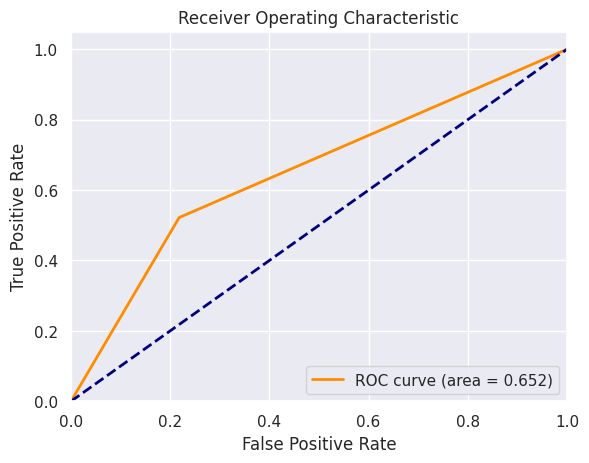

In [ ]:
# #ROC Curve XGBOOST
draw_roc_curve(best_model_tf_idf, X_test_tf_idf, y_test)

In [ ]:
# # FastText case
start = time.time()
best_model_fasttext = evaluate_model_ml_cv(models, X_train_ftt, X_dev_ftt, X_test_ftt, y_train, y_dev, y_test)
end = round(time.time()-start,2)
print("This process took",end,"seconds.")

----------------------------------------------------------------
SGD classifier case
----------------------------------------------------------------
Cross-validation scores: [0.596, 0.606, 0.608]
Average cross-validation accuracy score: 0.604


Cross-validation scores: [0.52, 0.552, 0.483]
Average cross-validation f1-score: 0.518


Cross-validation scores: [0.639, 0.652, 0.65]
Average cross-validation roc-auc score: 0.647


Development set accuracy: 0.595
Development set F1-score: 0.552
Development set AUC-ROC: 0.574


----------------------------------------------------------------
	 SGD classifier Report
 Test Accuracy of SGD classifier is: 0.607
 Test F1-score of SGD classifier is: 0.568
 Test AUC-ROC of SGD classifier is: 0.587
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.84      0.70      2623
           1       0.64      0.33      0.44      2246

    accuracy                

The best model is : <class 'sklearn.linear_model._logistic.LogisticRegression'>


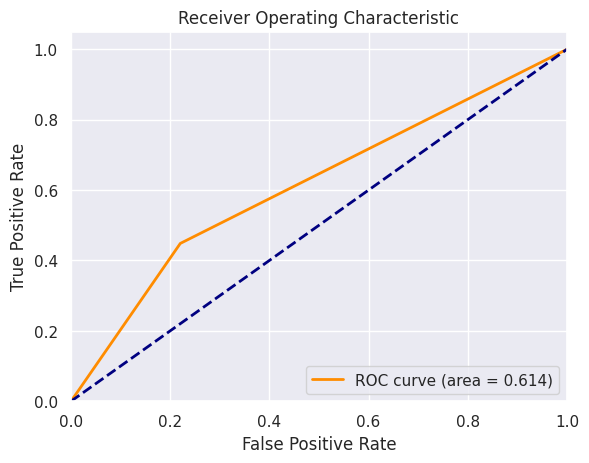

In [ ]:
draw_roc_curve(best_model_fasttext, X_test_ftt, y_test)

In [ ]:
# #Glove case
start = time.time()
best_model_glove = evaluate_model_ml_cv(models, X_train_glove_, X_dev_glove_, X_test_glove_, y_train, y_dev, y_test)
end = round(time.time()-start,2)
print("This process took",end,"seconds.")

----------------------------------------------------------------
SGD classifier case
----------------------------------------------------------------
Cross-validation scores: [0.564, 0.55, 0.558]
Average cross-validation accuracy score: 0.557


Cross-validation scores: [0.406, 0.475, 0.411]
Average cross-validation f1-score: 0.431


Cross-validation scores: [0.627, 0.64, 0.637]
Average cross-validation roc-auc score: 0.635


Development set accuracy: 0.546
Development set F1-score: 0.396
Development set AUC-ROC: 0.509


----------------------------------------------------------------
	 SGD classifier Report
 Test Accuracy of SGD classifier is: 0.546
 Test F1-score of SGD classifier is: 0.393
 Test AUC-ROC of SGD classifier is: 0.51
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.97      0.70      2623
           1       0.60      0.05      0.09      2246

    accuracy                 

The best model is : <class 'xgboost.sklearn.XGBClassifier'>


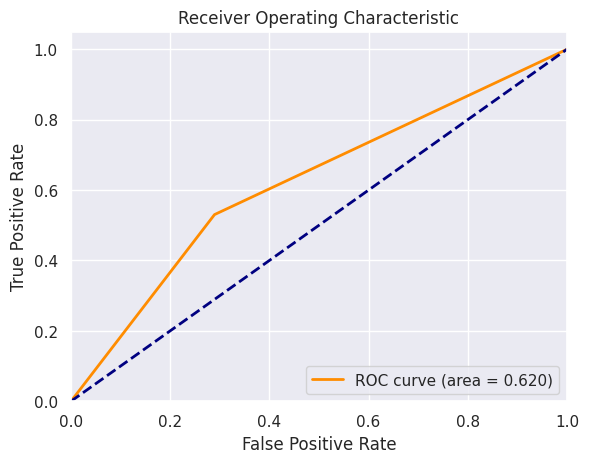

In [ ]:
draw_roc_curve(best_model_glove, X_test_glove_, y_test)

## <h3>*TF-idf- FastText- GloVE Evaluation - Perturbated-Original*</h3>

In [ ]:
#TF-IDF Case
start = time.time()
best_model_tf_idf = evaluate_model_ml_cv(models, X_train_tf_idf, X_dev_tf_idf, X_test_tf_idf, y_train, y_dev, y_test)
end = round(time.time()-start,2)
print("This process took",end,"seconds.")

----------------------------------------------------------------
SGD classifier case
----------------------------------------------------------------
Cross-validation scores: [0.674, 0.617, 0.548]
Average cross-validation accuracy score: 0.613


Cross-validation scores: [0.67, 0.577, 0.488]
Average cross-validation f1-score: 0.578


Cross-validation scores: [0.741, 0.72, 0.659]
Average cross-validation roc-auc score: 0.707


Development set accuracy: 0.434
Development set F1-score: 0.433
Development set AUC-ROC: 0.447


----------------------------------------------------------------
	 SGD classifier Report
 Test Accuracy of SGD classifier is: 0.446
 Test F1-score of SGD classifier is: 0.444
 Test AUC-ROC of SGD classifier is: 0.459
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.34      0.41     11543
           1       0.41      0.57      0.48      9108

    accuracy                

The best model is : <class 'xgboost.sklearn.XGBClassifier'>


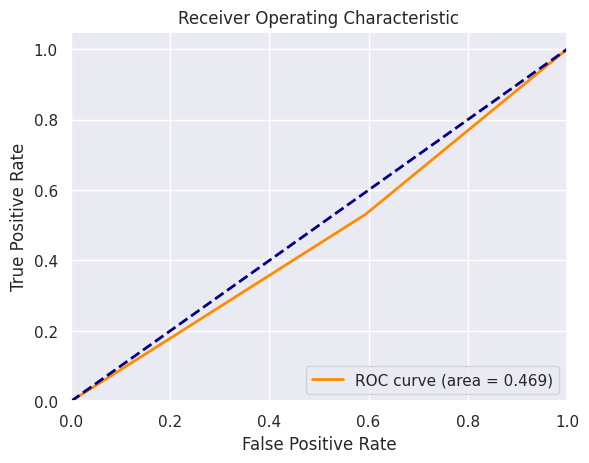

In [ ]:
# #ROC Curve
draw_roc_curve(best_model_tf_idf, X_test_tf_idf, y_test)

In [ ]:
# # FastText case
start = time.time()
best_model_fasttext = evaluate_model_ml_cv(models, X_train_ftt, X_dev_ftt, X_test_ftt, y_train, y_dev, y_test)
end = round(time.time()-start,2)
print("This process took",end,"seconds.")

----------------------------------------------------------------
SGD classifier case
----------------------------------------------------------------
Cross-validation scores: [0.619, 0.648, 0.564]
Average cross-validation accuracy score: 0.61


Cross-validation scores: [0.626, 0.644, 0.59]
Average cross-validation f1-score: 0.62


Cross-validation scores: [0.664, 0.694, 0.616]
Average cross-validation roc-auc score: 0.658


Development set accuracy: 0.444
Development set F1-score: 0.443
Development set AUC-ROC: 0.452


----------------------------------------------------------------
	 SGD classifier Report
 Test Accuracy of SGD classifier is: 0.443
 Test F1-score of SGD classifier is: 0.442
 Test AUC-ROC of SGD classifier is: 0.451
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.38      0.44      4365
           1       0.39      0.52      0.45      3379

    accuracy                 

The best model is : <class 'sklearn.linear_model._logistic.LogisticRegression'>


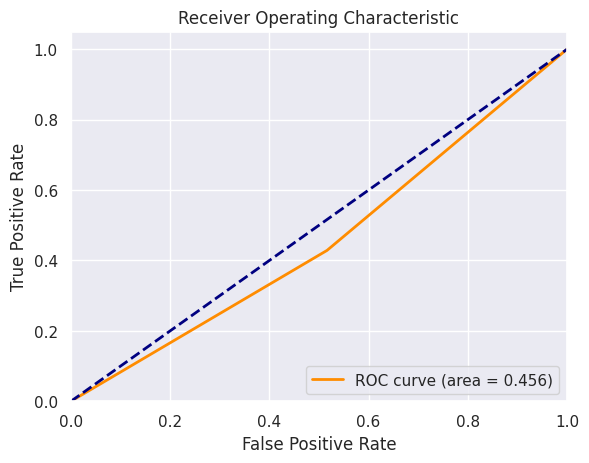

In [ ]:
draw_roc_curve(best_model_fasttext, X_test_ftt, y_test)

In [ ]:
# #Glove case
start = time.time()
best_model_glove = evaluate_model_ml_cv(models, X_train_glove_, X_dev_glove_, X_test_glove_, y_train, y_dev, y_test)
end = round(time.time()-start,2)
print("This process took",end,"seconds.")

----------------------------------------------------------------
SGD classifier case
----------------------------------------------------------------
Cross-validation scores: [0.648, 0.627, 0.549]
Average cross-validation accuracy score: 0.608


Cross-validation scores: [0.503, 0.59, 0.557]
Average cross-validation f1-score: 0.55


Cross-validation scores: [0.699, 0.664, 0.589]
Average cross-validation roc-auc score: 0.651


Development set accuracy: 0.481
Development set F1-score: 0.47
Development set AUC-ROC: 0.47


----------------------------------------------------------------
	 SGD classifier Report
 Test Accuracy of SGD classifier is: 0.485
 Test F1-score of SGD classifier is: 0.473
 Test AUC-ROC of SGD classifier is: 0.473
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.56      0.55      4365
           1       0.40      0.38      0.39      3379

    accuracy                  

The best model is : <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>


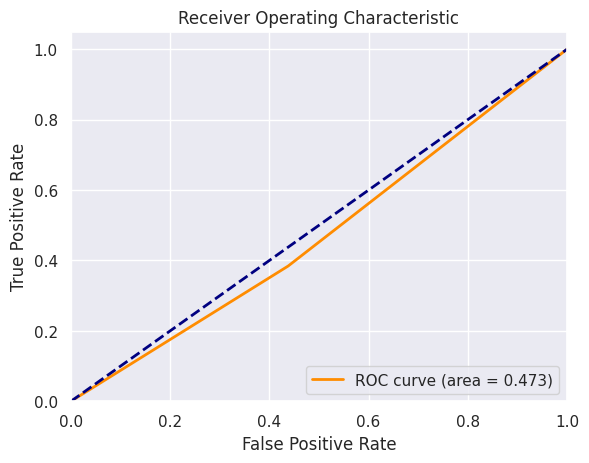

In [ ]:
draw_roc_curve(best_model_glove, X_test_glove_, y_test)

## <h3>*TF-idf- FastText- GloVE Evaluation - Original-perturbated*</h3>

In [ ]:
#TF-IDF Case
start = time.time()
best_model_tf_idf = evaluate_model_ml_cv(models, X_train_tf_idf, X_dev_tf_idf, X_test_tf_idf, y_train, y_dev, y_test)
end = round(time.time()-start,2)
print("This process took",end,"seconds.")

----------------------------------------------------------------
SGD classifier case
----------------------------------------------------------------
Cross-validation scores: [0.716, 0.635, 0.7]
Average cross-validation accuracy score: 0.684


Cross-validation scores: [0.683, 0.554, 0.646]
Average cross-validation f1-score: 0.628


Cross-validation scores: [0.783, 0.71, 0.813]
Average cross-validation roc-auc score: 0.768


Development set accuracy: 0.45
Development set F1-score: 0.354
Development set AUC-ROC: 0.448


----------------------------------------------------------------
	 SGD classifier Report
 Test Accuracy of SGD classifier is: 0.448
 Test F1-score of SGD classifier is: 0.356
 Test AUC-ROC of SGD classifier is: 0.447
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.47      0.82      0.60      5917
           1       0.28      0.07      0.11      5892

    accuracy                  

The best model is : <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>


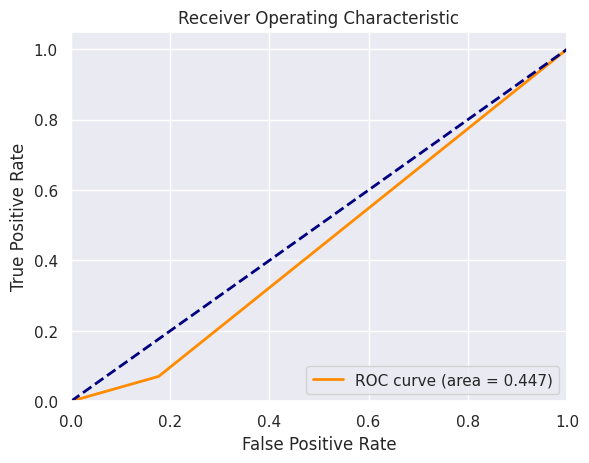

In [ ]:
# #ROC Curve
draw_roc_curve(best_model_tf_idf, X_test_tf_idf, y_test)

In [ ]:
# # FastText case
start = time.time()
best_model_fasttext = evaluate_model_ml_cv(models, X_train_ftt, X_dev_ftt, X_test_ftt, y_train, y_dev, y_test)
end = round(time.time()-start,2)
print("This process took",end,"seconds.")

----------------------------------------------------------------
SGD classifier case
----------------------------------------------------------------
Cross-validation scores: [0.619, 0.63, 0.669]
Average cross-validation accuracy score: 0.639


Cross-validation scores: [0.587, 0.615, 0.614]
Average cross-validation f1-score: 0.605


Cross-validation scores: [0.669, 0.653, 0.686]
Average cross-validation roc-auc score: 0.669


Development set accuracy: 0.464
Development set F1-score: 0.458
Development set AUC-ROC: 0.463


----------------------------------------------------------------
	 SGD classifier Report
 Test Accuracy of SGD classifier is: 0.443
 Test F1-score of SGD classifier is: 0.436
 Test AUC-ROC of SGD classifier is: 0.442
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.45      0.55      0.50      5917
           1       0.43      0.34      0.38      5892

    accuracy               

The best model is : <class 'sklearn.linear_model._logistic.LogisticRegression'>


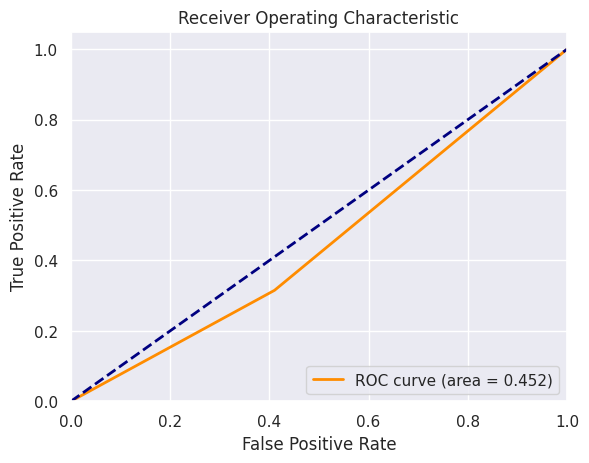

In [ ]:
draw_roc_curve(best_model_fasttext, X_test_ftt, y_test)

In [ ]:
# #Glove case
start = time.time()
best_model_glove = evaluate_model_ml_cv(models, X_train_glove_, X_dev_glove_, X_test_glove_, y_train, y_dev, y_test)
end = round(time.time()-start,2)
print("This process took",end,"seconds.")

----------------------------------------------------------------
SGD classifier case
----------------------------------------------------------------
Cross-validation scores: [0.603, 0.613, 0.693]
Average cross-validation accuracy score: 0.636


Cross-validation scores: [0.511, 0.552, 0.504]
Average cross-validation f1-score: 0.522


Cross-validation scores: [0.643, 0.632, 0.663]
Average cross-validation roc-auc score: 0.646


Development set accuracy: 0.452
Development set F1-score: 0.401
Development set AUC-ROC: 0.45


----------------------------------------------------------------
	 SGD classifier Report
 Test Accuracy of SGD classifier is: 0.442
 Test F1-score of SGD classifier is: 0.386
 Test AUC-ROC of SGD classifier is: 0.441
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.46      0.74      0.57      5917
           1       0.35      0.14      0.20      5892

    accuracy               

The best model is : <class 'sklearn.linear_model._logistic.LogisticRegression'>


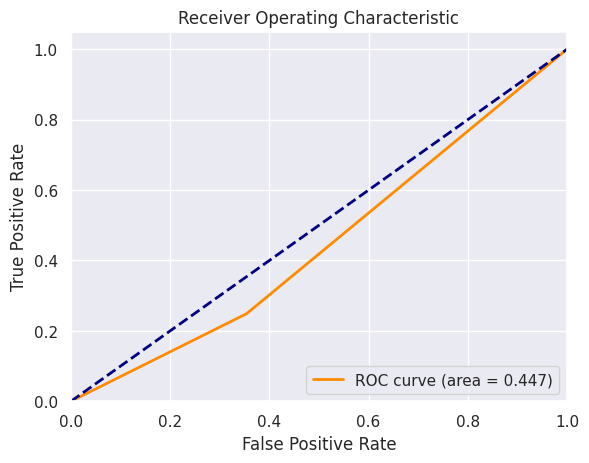

In [ ]:
draw_roc_curve(best_model_glove, X_test_glove_, y_test)

# <h2> *DL models* </h2>

##<h3>*Data preparation*</h3>

In [ ]:
# tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")
# tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large-mnli')
#tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")
tokenizer = AutoTokenizer.from_pretrained("ydshieh/bert-base-uncased-yelp-polarity")
# tokenizer = RobertaTokenizer.from_pretrained('roberta-base', truncation=True, do_lower_case=True)
X_train_roberta = roberta_encode(X_train, tokenizer)
X_dev_roberta = roberta_encode(X_dev, tokenizer)
X_test_roberta = roberta_encode(X_test, tokenizer)

# X_train_facebook_bart = facebook_bart_encode(X_train, tokenizer)
# X_dev_facebook_bart = facebook_bart_encode(X_dev, tokenizer)
# X_test_facebook_bart = facebook_bart_encode(X_test, tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
text_vector = TextVectorization(max_tokens = 20000, output_sequence_length = 100)
text_vector.adapt(new_df.text) # Analyzes the data and builds the vocabulary.
# Encoding text data into integer sequences
MAX_LENGTH = 100
vocab = text_vector.get_vocabulary()
vocabulary_size = text_vector.vocabulary_size()
print(f"Vocabulary is comprised of : {vocab}")
print(f" Size of vocabulary of vectorizer on original data is {text_vector.vocabulary_size()}")
# Encode text data
X_train_dl = encode_text(text = X_train,text_vectorizer = text_vector,
                         max_length = MAX_LENGTH)
X_dev_dl = encode_text(text = X_dev,text_vectorizer = text_vector,
                         max_length = MAX_LENGTH)
X_test_dl =  encode_text(text = X_test,text_vectorizer = text_vector,
                         max_length = MAX_LENGTH)
print(f" X_train has a shape of : {X_train_dl.shape}")
print(f" X_dev has a shape of : {X_dev_dl.shape}")
print(f" X_test has a shape of : {X_test_dl.shape}")

Vocabulary is comprised of : ['', '[UNK]', 'people', 'woman', 'like', 'fuck', 'get', 'black', 'would', 'say', 'think', 'go', 'want', 'make', 'one', 'white', 'know', 'men', 'country', 'u', 'see', 'muslim', 'even', 'need', 'gay', 'hate', 'look', 'shit', 'really', 'good', 'jew', 'never', 'right', 'come', 'time', 'many', 'take', 'thing', 'live', 'call', 'way', 'use', 'work', 'love', 'man', 'world', 'much', 'life', 'tell', 'bad', 'always', 'let', 'refugee', 'immigrant', 'give', 'try', 'trans', 'could', 'back', 'actually', 'year', 'kid', 'lot', 'believe', '’', 'race', 'asian', 'stop', 'child', 'feel', 'society', 'mean', 'still', 'every', 'day', 'well', 'also', 'guy', 'person', 'nothing', 'problem', 'girl', 'racist', 'keep', 'find', 'everyone', 'kill', 'something', 'place', 'around', 'friend', 'wrong', 'anyone', 'talk', 'allow', 'someone', 'real', 'show', 'care', 'leave', 'help', 'reason', 'family', 'die', 'start', 'money', 'big', 'chinese', 'must', 'new', 'ever', 'old', 'anything', 'fact', '

In [ ]:
fastText_embedding_matrix = build_embedding_matrix(vocab,fast_text_model_,300,True)
embedding_matrix_glove = build_embedding_matrix(vocab,glove_model_,300,True)

100%|██████████| 20000/20000 [00:00<00:00, 37454.06it/s]


Converted 20000 words (0 misses)


100%|██████████| 20000/20000 [00:00<00:00, 326283.10it/s]

Converted 15439 words (4561 misses)


# <h3> *DL work* </h3>

##<h4> *Attention mechanism implementations* </h4>

In [ ]:
# Add attention layer to the deep learning network
class Attention_(Layer):
    def __init__(self,**kwargs):
        super(Attention_,self).__init__(**kwargs)

    def build(self,input_shape):
        # Define the shape of the weights and bias in this layer
        # The layer has just 1 lonely neuron
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1),
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1),
                               initializer='zeros', trainable=True)
        self.features_dim = input_shape[-1]
        super(Attention_, self).build(input_shape)

    def call(self,x):
        features_dim = self.features_dim
        # x is the input tensor
        # Alignment scores. Pass them through tanh function
        #x =  tf.reshape(x,[-1])
        # eij = tf.tensordot(tf.reshape(x, (-1, features_dim)),
        #                      tf.reshape(self.W, (features_dim, 1)), 1)
        x = tf.reshape(x, (-1,features_dim))
        W = tf.reshape(self.W,(features_dim, 1))

        e = tf.tanh(tf.tensordot(x, W, 1)+self.b)
        # We need to squeeze the (max_seq_length * 1) attention vector into a 1-D array
        # before passing to softmax function
        e = tf.keras.ops.squeeze(e, axis=-1)
        # e = Flatten()(e)
        # Compute the weights
        # Softmax squashes these into values in the range between 0, and 1 whose sum is 1
        alpha = tf.keras.activations.softmax(e)
        # Reshape to tensorFlow format
        # We need to ‘expand’ back the attention weights from (max_seq_length) to (max_seq_length * 1)
        alpha = tf.expand_dims(alpha, axis=-1)
        # Compute the context vector
        # We multiply each attention weight by the respective word and sum up
        context = x * alpha
        context = tf.reduce_sum(context, axis=1)
        return context

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

In [ ]:
from keras import backend as K
import keras
class AttentionLayer(Layer):

    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):

        self.supports_masking = True
        self.init = keras.initializers.get('glorot_uniform')

        self.W_regularizer = keras.regularizers.get(W_regularizer)
        self.b_regularizer = keras.regularizers.get(b_regularizer)

        self.W_constraint = keras.constraints.get(W_constraint)
        self.b_constraint = keras.constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(AttentionLayer, self).__init__(**kwargs)


    def build(self, input_shape):
        # assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight(shape=(input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True


    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None


    def call(self, x, mask=None):
        # TF backend doesn't support it
        # eij = K.dot(x, self.W)
        # features_dim = self.W.shape[0]
        # step_dim = x._keras_shape[1]

        features_dim = self.features_dim
        step_dim = self.step_dim
        eij = tf.reshape(tf.tensordot(tf.reshape(x, (-1, features_dim)),
                             tf.reshape(self.W, (features_dim, 1)), 1),
                        (-1, step_dim))
        # eij = tf.tensordot(tf.reshape(x, (-1, features_dim)),
        #                      tf.reshape(self.W, (features_dim, 1)), 1)

        if self.bias:
            eij += self.b

        eij = tf.tanh(eij)

        a = tf.exp(eij)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= tf.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        a /= tf.cast(tf.reduce_sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = tf.expand_dims(a, axis =-1)
        weighted_input = x * a

        return tf.reduce_sum(weighted_input, axis=1)


    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim


    def get_config(self):
        config = {'step_dim': self.step_dim}
        base_config = super(AttentionLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

##<h4> *CNN implementations* </h4>

In [ ]:
from os import name
MAX_SEQUENCE_LENGTH = 100
vocabulary_size = text_vector.vocabulary_size()
# After GridSearch
# # CNN
def build_model_cnn(filters, kernel_size, dropout_rate,
                    dense_units, emb_dim):
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    embedding_sequences = Embedding(input_dim = vocabulary_size  + 1,
                          output_dim = emb_dim)(sequence_input)

    spatial_dropout = SpatialDropout1D(dropout_rate)(embedding_sequences)

    conv_1d = Conv1D(filters, kernel_size, activation='relu')(spatial_dropout)
    conv_2d = Conv1D(int(filters/2), kernel_size, activation='relu')(spatial_dropout)
    conv_3d = Conv1D(int(filters/4), kernel_size, activation='relu')(spatial_dropout)
    conv_4d = Conv1D(int(filters/8), kernel_size, activation='relu')(spatial_dropout)

    max_pooling_conv_1d = GlobalMaxPooling1D()(conv_1d)
    max_pooling_conv_2d = GlobalMaxPooling1D()(conv_2d)
    max_pooling_conv_3d = GlobalMaxPooling1D()(conv_3d)
    max_pooling_conv_4d = GlobalMaxPooling1D()(conv_4d)
    concatenated = concatenate([max_pooling_conv_1d, max_pooling_conv_2d,
                               max_pooling_conv_3d, max_pooling_conv_4d])
    # flatten = Flatten()(max_pooling_conv_1d)
    # flatten = Flatten()(concatenated)
    # attention = AttentionLayer(MAX_SEQUENCE_LENGTH)(concatenated)
    dense = Dense(dense_units, activation='relu')(concatenated)
    dropout = Dropout(dropout_rate)(dense)
    output = Dense(1, activation='sigmoid')(dropout)

    model = Model(inputs=sequence_input, outputs=output,name = 'model_cnn')
    # compile network
    adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.00001)
    model.compile(loss='binary_crossentropy', optimizer= adagrad,
                  metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model_cnn.png', show_shapes=True)
    return model

# CNN with FastText word-embedding
def build_model_cnn_fastText(filters, kernel_size, dropout_rate,
                    dense_units, emb_dim):
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    embedding_sequences = Embedding(input_dim = vocabulary_size  + 1,
                          output_dim = emb_dim,embeddings_initializer =
                        Constant(fastText_embedding_matrix),
                        trainable = False)(sequence_input)

    spatial_dropout = SpatialDropout1D(dropout_rate)(embedding_sequences)

    conv_1d = Conv1D(filters, kernel_size, activation='relu')(spatial_dropout)
    conv_2d = Conv1D(int(filters/2), kernel_size, activation='relu')(spatial_dropout)
    conv_3d = Conv1D(int(filters/4), kernel_size, activation='relu')(spatial_dropout)
    conv_4d = Conv1D(int(filters/8), kernel_size, activation='relu')(spatial_dropout)

    max_pooling_conv_1d = GlobalMaxPooling1D()(conv_1d)
    max_pooling_conv_2d = GlobalMaxPooling1D()(conv_2d)
    max_pooling_conv_3d = GlobalMaxPooling1D()(conv_3d)
    max_pooling_conv_4d = GlobalMaxPooling1D()(conv_4d)
    concatenated = concatenate([max_pooling_conv_1d, max_pooling_conv_2d,
                                max_pooling_conv_3d, max_pooling_conv_4d])
    #flatten = Flatten()(max_pooling_conv_1d)
    #attention = AttentionLayer(MAX_SEQUENCE_LENGTH)(conv_1d)
    dense = Dense(dense_units, activation='relu')(concatenated)
    dropout = Dropout(dropout_rate)(dense)
    output = Dense(1, activation='sigmoid')(dropout)

    model = Model(inputs=sequence_input, outputs=output, name = 'model_cnn_fastText')
    # compile network
    adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.00001)
    model.compile(loss='binary_crossentropy', optimizer= adagrad,
                  metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model_cnn_fastText300_matrix.png', show_shapes=True)
    return model

def build_model_cnn_glove(filters, kernel_size, dropout_rate,
                    dense_units, emb_dim):
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    embedding_sequences = Embedding(input_dim = vocabulary_size  + 1,
                          output_dim = emb_dim,embeddings_initializer =
                        Constant(embedding_matrix_glove),
                        trainable = False)(sequence_input)

    spatial_dropout = SpatialDropout1D(dropout_rate)(embedding_sequences)

    conv_1d = Conv1D(filters, kernel_size, activation='relu')(spatial_dropout)
    conv_2d = Conv1D(int(filters/2), kernel_size, activation='relu')(spatial_dropout)
    conv_3d = Conv1D(int(filters/4), kernel_size, activation='relu')(spatial_dropout)
    conv_4d = Conv1D(int(filters/8), kernel_size, activation='relu')(spatial_dropout)

    max_pooling_conv_1d = GlobalMaxPooling1D()(conv_1d)
    max_pooling_conv_2d = GlobalMaxPooling1D()(conv_2d)
    max_pooling_conv_3d = GlobalMaxPooling1D()(conv_3d)
    max_pooling_conv_4d = GlobalMaxPooling1D()(conv_4d)
    concatenated = concatenate([max_pooling_conv_1d, max_pooling_conv_2d,
                                max_pooling_conv_3d, max_pooling_conv_4d])
    # flatten = Flatten()(max_pooling_conv_1d)
    #attention = Attention()(conv_1d)
    dense = Dense(dense_units, activation='relu')(concatenated)
    dropout = Dropout(dropout_rate)(dense)
    output = Dense(1, activation='sigmoid')(dropout)

    model = Model(inputs=sequence_input, outputs=output, name = 'model_cnn_glove')
    # compile network
    adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.00001)
    model.compile(loss='binary_crossentropy', optimizer= adagrad,
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model_cnn_glove300_matrix.png', show_shapes=True)
    return model

##<h4> *LSTM implementations* </h4>

In [ ]:
MAX_SEQUENCE_LENGTH = 100
vocabulary_size = text_vector.vocabulary_size()
# LSTM
def build_model_lstm(lstm_units, k_regularizer, dense_units,
                     dropout_rate, recurrent_dropout, emb_dim):
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    embeddings = Embedding(input_dim = vocabulary_size + 1, output_dim = emb_dim)(sequence_input)

    spatial_dropout = (SpatialDropout1D(dropout_rate))(embeddings)
    lstm_1 = LSTM(units = lstm_units, kernel_regularizer = l1(k_regularizer),
                   recurrent_dropout = recurrent_dropout, return_sequences = True)(spatial_dropout)
    lstm_2 = LSTM(units = lstm_units, kernel_regularizer = l1(k_regularizer),
                   recurrent_dropout = recurrent_dropout, return_sequences = True)(spatial_dropout)
    concatenated_0 = concatenate([lstm_1, lstm_2])
    max_pooling = GlobalMaxPooling1D()(concatenated_0)
    attention = AttentionLayer(MAX_SEQUENCE_LENGTH)(concatenated_0)
    concatenated = concatenate([max_pooling, attention])
    # model.add(GlobalMaxPooling1D()) # for dimensionality reduction
    dense = Dense(dense_units, activation='relu')(concatenated)
    dropout = Dropout(dropout_rate)(dense)
    # Define the ouput layer
    output = Dense(1, activation='sigmoid')(dropout)
    model = Model(inputs=sequence_input, outputs=output, name = 'model_lstm')
    # compile network
    adam =  Adam(learning_rate = 0.001)
    model.compile(loss ='binary_crossentropy', optimizer = adam,
                  metrics =['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    model.summary()
    plot_model(model, to_file = 'model_lstm.png', show_shapes = True)
    return model

# LSTM with FastText matrix
def build_model_lstm_fastText(lstm_units, dense_units, k_regularizer,
                         dropout_rate, recurrent_dropout, emb_dim):

    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    embeddings = Embedding(input_dim = vocabulary_size + 1, output_dim = emb_dim,
                           embeddings_initializer = Constant(fastText_embedding_matrix), trainable = False)(sequence_input)
    spatial_dropout = (SpatialDropout1D(dropout_rate))(embeddings)
    lstm_1 = LSTM(units = lstm_units, kernel_regularizer = l1(k_regularizer),
                   recurrent_dropout = recurrent_dropout, return_sequences = True)(spatial_dropout)
    max_pooling = GlobalMaxPooling1D()(lstm_1)
    attention = AttentionLayer(MAX_SEQUENCE_LENGTH)(lstm_1)
    concatenated = concatenate([max_pooling, attention])
    # model.add(GlobalMaxPooling1D()) # for dimensionality reduction
    dense = Dense(dense_units, activation='relu')(concatenated)
    dropout = Dropout(dropout_rate)(dense)
    # Define the ouput layer
    output = Dense(1, activation='sigmoid')(dropout)
    model = Model(inputs=sequence_input, outputs=output, name = 'model_lstm_fastText')
    # compile network
    adam =  Adam(learning_rate = 0.001)
    model.compile(loss ='binary_crossentropy', optimizer = adam,
                  metrics =['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    model.summary()
    plot_model(model, to_file = 'model_lstm_fastText300_matrix.png',
               show_shapes = True)

    return model

# LSTM with GlovE matrix
def build_model_lstm_glove(lstm_units, dense_units, k_regularizer,
                         dropout_rate, recurrent_dropout, emb_dim):
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    embeddings = Embedding(input_dim = vocabulary_size + 1, output_dim = emb_dim,
                           embeddings_initializer = Constant(embedding_matrix_glove), trainable = False)(sequence_input)
    spatial_dropout = (SpatialDropout1D(dropout_rate))(embeddings)
    lstm_1 = LSTM(units = lstm_units, kernel_regularizer = l1(k_regularizer),
                   recurrent_dropout = recurrent_dropout, return_sequences = True)(spatial_dropout)
    max_pooling = GlobalMaxPooling1D()(lstm_1)
    attention = AttentionLayer(MAX_SEQUENCE_LENGTH)(lstm_1)
    concatenated = concatenate([max_pooling, attention])
    # model.add(GlobalMaxPooling1D()) # for dimensionality reduction
    dense = Dense(dense_units, activation='relu')(concatenated)
    dropout = Dropout(dropout_rate)(dense)
    # Define the ouput layer
    output = Dense(1, activation='sigmoid')(dropout)
    model = Model(inputs=sequence_input, outputs=output, name = 'model_lstm_glove')

    # compile network
    adam =  Adam(learning_rate = 0.001)
    model.compile(loss ='binary_crossentropy', optimizer = adam,
                  metrics =['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    model.summary()
    plot_model(model, to_file = 'model_lstm_glove300_matrix.png',
               show_shapes = True)

    return model

##<h4> *GRU implementations* </h4>

In [ ]:
MAX_SEQUENCE_LENGTH = 100
vocabulary_size = text_vector.vocabulary_size()
# GRU
def build_model_gru(gru_units, k_regularizer, learning_rate,
                          dropout_rate, recurrent_dropout, emb_dim):

    sequence_input = (Input(shape=(MAX_SEQUENCE_LENGTH,), dtype=tf.int32))
    # model.add(text_vectorizer)
    embeddings = Embedding(input_dim = vocabulary_size + 1, output_dim = emb_dim)(sequence_input)
    spatial_dropout = (SpatialDropout1D(dropout_rate))(embeddings)
    gru = GRU(units = gru_units, kernel_regularizer = l1(k_regularizer),
                   recurrent_dropout = recurrent_dropout, return_sequences = True)(spatial_dropout)

    #model.add(GRU(gru_units))
    max_pooling = GlobalMaxPooling1D()(gru)
    #model.add(GRU(gru_units))
    #model.add(SpatialDropout1D(dropout_rate))
    attention = AttentionLayer(MAX_SEQUENCE_LENGTH)(gru)
    concatenated = concatenate([max_pooling, attention])
    # model.add(GlobalMaxPooling1D()) # for dimensionality reduction
    dense = Dense(gru_units, activation='relu')(concatenated)
    # dropout = Dropout(dropout_rate)(dense)
    output = Dense(1, activation='sigmoid')(dense)
    model = Model(inputs=sequence_input, outputs=output, name = 'model_gru')

    # compile network
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss='binary_crossentropy', optimizer= adam,
                  metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model_gru.png', show_shapes=True)
    return model

# GRU with FastText matrix
def build_model_gru_fastText(gru_units, k_regularizer, learning_rate,
                          dropout_rate, recurrent_dropout, emb_dim):
    sequence_input = (Input(shape=(MAX_SEQUENCE_LENGTH,), dtype=tf.int32))

    embeddings = Embedding(input_dim = vocabulary_size + 1, output_dim = emb_dim,
                           embeddings_initializer= Constant(fastText_embedding_matrix),
                           trainable  = False)(sequence_input)
    spatial_dropout = (SpatialDropout1D(dropout_rate))(embeddings)
    # Adding 3 GRU layers
    gru_0 = GRU(units = gru_units, kernel_regularizer = l1(k_regularizer),
                   recurrent_dropout = recurrent_dropout, return_sequences = True)(spatial_dropout)
    # gru_1 = GRU(units = gru_units, kernel_regularizer = l1(k_regularizer),
    #                recurrent_dropout = recurrent_dropout, return_sequences = True)(spatial_dropout)
    # gru_2 = GRU(units = gru_units, kernel_regularizer = l1(k_regularizer),
    #                recurrent_dropout = recurrent_dropout, return_sequences = True)(spatial_dropout)
    # compact_gru = concatenate([gru_0, gru_1, gru_2])

    max_pooling = GlobalMaxPooling1D()(gru_0)
    attention = AttentionLayer(MAX_SEQUENCE_LENGTH)(gru_0)

    concatenated = concatenate([max_pooling, attention])

    dense = Dense(gru_units, activation='relu')(concatenated)
    # dropout = Dropout(dropout_rate)(dense)
    output = Dense(1, activation='sigmoid')(dense)
    model = Model(inputs=sequence_input, outputs=output, name = 'model_gru_fastText')
    # compile network
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss='binary_crossentropy', optimizer= adam,
                  metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model_gru_fastText300_matrix.png',
               show_shapes=True)
    return model

# GRU with GloVE matrix
def build_model_gru_glove(gru_units, k_regularizer,learning_rate,
                          dropout_rate, recurrent_dropout, emb_dim):
    sequence_input = (Input(shape=(MAX_SEQUENCE_LENGTH,), dtype=tf.int32))
    # model.add(text_vectorizer)
    embeddings = Embedding(input_dim = vocabulary_size + 1, output_dim = emb_dim,
                           embeddings_initializer= Constant(embedding_matrix_glove),
                           trainable  = False)(sequence_input)
    spatial_dropout = (SpatialDropout1D(dropout_rate))(embeddings)
    # Adding 3 GRU layers
    gru_0 = GRU(units = gru_units, kernel_regularizer = l1(k_regularizer),
                   recurrent_dropout = recurrent_dropout, return_sequences = True)(spatial_dropout)
    # gru_1 = GRU(units = gru_units, kernel_regularizer = l1(k_regularizer),
    #                recurrent_dropout = recurrent_dropout, return_sequences = True)(spatial_dropout)
    # gru_2 = GRU(units = gru_units, kernel_regularizer = l1(k_regularizer),
    #                recurrent_dropout = recurrent_dropout, return_sequences = True)(spatial_dropout)
    # compact_gru = concatenate([gru_0, gru_1, gru_2])

    max_pooling = GlobalMaxPooling1D()(gru_0)
    attention = AttentionLayer(MAX_SEQUENCE_LENGTH)(gru_0)

    concatenated = concatenate([max_pooling, attention])

    dense = Dense(256, activation='relu')(concatenated)
    # dropout = Dropout(dropout_rate)(dense)
    output = Dense(1, activation='sigmoid')(dense)
    model = Model(inputs=sequence_input, outputs=output, name = 'model_gru_glove')

    # compile network
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss='binary_crossentropy', optimizer= adam,
                  metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model_gru_glove300_matrix.png', show_shapes=True)
    return model

##<h4> *BiGRU implementations* </h4>

In [ ]:
MAX_SEQUENCE_LENGTH = 100
vocabulary_size = text_vector.vocabulary_size()
# BIGRU
def build_model_bi_gru(gru_units, k_regularizer,learning_rate,
                          dropout_rate, recurrent_dropout, emb_dim):
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    embedding_sequences = Embedding(input_dim = vocabulary_size  + 1,
                          output_dim = emb_dim)(sequence_input)
    spatial_dropout = (SpatialDropout1D(dropout_rate))(embedding_sequences)
    bi_gru = Bidirectional(GRU(units = gru_units, kernel_regularizer = l1(k_regularizer),
                   recurrent_dropout = recurrent_dropout, return_sequences = True))(spatial_dropout)
    max_pooling = GlobalMaxPooling1D()(bi_gru)
    attention = AttentionLayer(MAX_SEQUENCE_LENGTH)(bi_gru)
    concatenated = concatenate([max_pooling, attention])

    dense = Dense(gru_units, activation='relu')(concatenated)
    dropout = Dropout(dropout_rate)(dense)
    output = Dense(1, activation='sigmoid')(dropout)

    model = Model(inputs=sequence_input, outputs=output, name = 'model_bigru')
    # compile network
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss='binary_crossentropy', optimizer= adam,
                  metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model_bi_gru.png', show_shapes=True)
    return model

# BIGRU with FastText
def build_model_bi_gru_fastText(gru_units, k_regularizer,learning_rate,
                          dropout_rate, recurrent_dropout, emb_dim):
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    embedding_sequences = Embedding(input_dim = vocabulary_size  + 1,
                          embeddings_initializer= Constant(fastText_embedding_matrix),
                          trainable = False,
                          output_dim = emb_dim)(sequence_input)

    spatial_dropout = (SpatialDropout1D(dropout_rate))(embedding_sequences)
    bi_gru_1 = Bidirectional(GRU(units = gru_units, kernel_regularizer = l1(k_regularizer),
                   recurrent_dropout = recurrent_dropout, return_sequences = True))(spatial_dropout)
    # bi_gru_2 = Bidirectional(GRU(int(gru_units/2), return_sequences=True))(spatial_dropout)
    # concatenated_1 = concatenate([bi_gru_1, bi_gru_2])

    max_pooling = GlobalMaxPooling1D()(bi_gru_1)
    attention = AttentionLayer(MAX_SEQUENCE_LENGTH)(bi_gru_1)

    concatenated_2 = concatenate([max_pooling, attention])

    dense = Dense(gru_units, activation='relu')(concatenated_2)
    dropout = Dropout(dropout_rate)(dense)
    output = Dense(1, activation='sigmoid')(dropout)

    model = Model(inputs=sequence_input, outputs=output, name = 'model_bigru_fastText')
    # compile network
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss='binary_crossentropy', optimizer= adam,
                  metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model_bi_gru_fastText300D.png', show_shapes=True)
    return model

# BIGRU with Glove
def build_model_bi_gru_glove(gru_units, k_regularizer,learning_rate,
                          dropout_rate, recurrent_dropout, emb_dim):
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    embedding_sequences = Embedding(input_dim = vocabulary_size  + 1,
                          embeddings_initializer= Constant(embedding_matrix_glove),
                          trainable = False,
                          output_dim = emb_dim)(sequence_input)
    spatial_dropout = (SpatialDropout1D(dropout_rate))(embedding_sequences)
    bi_gru = Bidirectional(GRU(units = gru_units, kernel_regularizer = l1(k_regularizer),
                   recurrent_dropout = recurrent_dropout, return_sequences = True))(spatial_dropout)
    max_pooling = GlobalMaxPooling1D()(bi_gru)
    attention = AttentionLayer(MAX_SEQUENCE_LENGTH)(bi_gru)
    concatenated = concatenate([max_pooling, attention])

    dense = Dense(gru_units, activation='relu')(concatenated)
    dropout = Dropout(dropout_rate)(dense)
    output = Dense(1, activation='sigmoid')(dropout)
    model = Model(inputs=sequence_input, outputs=output, name = 'model_bigru_glove')
    # compile network
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss='binary_crossentropy', optimizer= adam,
                  metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model_bi_gru_glove300D.png', show_shapes=True)
    return model

##<h4> *BiGRU+CNN implementations* </h4>

In [ ]:
MAX_SEQUENCE_LENGTH = 100
vocabulary_size = text_vector.vocabulary_size()
# BIGRU + CNN
# def build_model_bi_gru_cnn(filters, kernel_size, gru_units, k_regularizer,
#                            dense_units, learning_rate, dropout_rate,
#                            recurrent_dropout, emb_dim):
#     sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
#     embedding_sequences = Embedding(input_dim = vocabulary_size  + 1,
#                           output_dim = emb_dim)(sequence_input)
#     spatial_dropout = (SpatialDropout1D(dropout_rate))(embedding_sequences)
#     bi_gru = Bidirectional(GRU(units = gru_units, kernel_regularizer = l1(k_regularizer),
#                    recurrent_dropout = recurrent_dropout, return_sequences = True))(spatial_dropout)

#     conv_1d = Conv1D(filters, kernel_size, activation='relu')(spatial_dropout_1)
#     conv_2d = Conv1D(int(filters/2), kernel_size, activation='relu')(spatial_dropout_1)
#     conv_3d = Conv1D(int(filters/4), kernel_size, activation='relu')(spatial_dropout_1)
#     conv_4d = Conv1D(int(filters/8), kernel_size, activation='relu')(spatial_dropout_1)

#     concatenated = concatenate([conv_1d, conv_2d,
#                                 conv_3d, conv_4d])
#     max_pooling = GlobalMaxPooling1D()(concatenated)
#     attention = AttentionLayer(MAX_SEQUENCE_LENGTH)(spatial_dropout_1)
#     concatenated_1 = concatenate([max_pooling, attention])

#     dense = Dense(dense_units, activation='relu')(concatenated_1)
#     dropout = Dropout(dropout_rate)(dense)
#     output = Dense(1, activation='sigmoid')(dropout)
#     model = Model(inputs=sequence_input, outputs=output, name = 'model_bigru_cnn')
#     # compile network
#     adam = Adam(learning_rate = learning_rate)
#     model.compile(loss='binary_crossentropy', optimizer= adam,
#                   metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
#     # summarize defined model
#     model.summary()
#     plot_model(model, to_file='model_bigru_cnn.png', show_shapes=True)
#     return model

def build_model_bi_gru_cnn_fastText(filters, kernel_size, gru_units, k_regularizer,
                           dense_units, learning_rate, dropout_rate,
                           recurrent_dropout, emb_dim):
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    embedding_sequences = Embedding(input_dim = vocabulary_size  + 1,
                          embeddings_initializer= Constant(fastText_embedding_matrix),
                          trainable = False,
                          output_dim = emb_dim)(sequence_input)
    spatial_dropout = (SpatialDropout1D(dropout_rate))(embedding_sequences)
    bi_gru_1 = Bidirectional(GRU(units = gru_units, kernel_regularizer = l1(k_regularizer),
                   recurrent_dropout = recurrent_dropout, return_sequences = True))(spatial_dropout)

    conv_1d = Conv1D(filters, kernel_size, activation='relu')(spatial_dropout)
    conv_2d = Conv1D(int(filters/2), kernel_size, activation='relu')(spatial_dropout)
    conv_3d = Conv1D(int(filters/4), kernel_size, activation='relu')(spatial_dropout)
    conv_4d = Conv1D(int(filters/8), kernel_size, activation='relu')(spatial_dropout)

    concatenated = concatenate([conv_1d, conv_2d,
                                conv_3d, conv_4d])
    max_pooling = GlobalMaxPooling1D()(concatenated)
    attention = AttentionLayer(MAX_SEQUENCE_LENGTH)( bi_gru_1)
    concatenated_1 = concatenate([max_pooling, attention])

    dense = Dense(dense_units, activation='relu')(concatenated_1)
    dropout = Dropout(dropout_rate)(dense)
    output = Dense(1, activation='sigmoid')(dropout)
    model = Model(inputs=sequence_input, outputs=output, name = 'model_bi_gru_cnn_fastText')
    # compile network
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss='binary_crossentropy', optimizer= adam,
                  metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model_bigru_cnn_fastText300D.png', show_shapes=True)
    return model

def build_model_bi_gru_cnn_glove(filters, kernel_size, gru_units, k_regularizer,
                           dense_units, learning_rate, dropout_rate,
                           recurrent_dropout, emb_dim):
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    embedding_sequences = Embedding(input_dim = vocabulary_size  + 1,
                          embeddings_initializer= Constant(embedding_matrix_glove),
                          trainable = False,
                          output_dim = emb_dim)(sequence_input)
    spatial_dropout = (SpatialDropout1D(dropout_rate))(embedding_sequences)
    bi_gru_1 = Bidirectional(GRU(units = gru_units, kernel_regularizer = l1(k_regularizer),
                   recurrent_dropout = recurrent_dropout, return_sequences = True))(spatial_dropout)

    conv_1d = Conv1D(filters, kernel_size, activation='relu')(spatial_dropout)
    conv_2d = Conv1D(int(filters/2), kernel_size, activation='relu')(spatial_dropout)
    conv_3d = Conv1D(int(filters/4), kernel_size, activation='relu')(spatial_dropout)
    conv_4d = Conv1D(int(filters/8), kernel_size, activation='relu')(spatial_dropout)

    concatenated = concatenate([conv_1d, conv_2d,
                                conv_3d, conv_4d])
    max_pooling = GlobalMaxPooling1D()(concatenated)
    attention = AttentionLayer(MAX_SEQUENCE_LENGTH)(bi_gru_1)
    concatenated_1 = concatenate([max_pooling, attention])

    dense = Dense(dense_units, activation='relu')(concatenated_1)
    dropout = Dropout(dropout_rate)(dense)
    output = Dense(1, activation='sigmoid')(dropout)
    model = Model(inputs=sequence_input, outputs=output, name = 'model_bi_gru_cnn_glove')
    # compile network
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss='binary_crossentropy', optimizer= adam,
                  metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model_bigru_cnn_glove300D.png', show_shapes=True)
    return model

##<h4> *RoBERTa implementations* </h4>

In [ ]:
MAX_SEQUENCE_LENGTH = 100
def build_model_roberta(gru_units, k_regularizer,
                           dense_units, dropout_rate,
                           recurrent_dropout, emb_dim):


    input_word_ids = tf.keras.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype=tf.int32, name='input_word_ids')
    input_mask = tf.keras.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype=tf.int32, name='input_mask')
    input_type_ids = tf.keras.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype=tf.int32, name='input_type_ids')

    # Import RoBERTa model from HuggingFace
    model = TFBertForSequenceClassification.from_pretrained("ydshieh/bert-base-uncased-yelp-polarity")

    roberta_model = TFRobertaModel.from_pretrained("roberta-base")
    #roberta_model =  TFRobertaForSequenceClassification.from_pretrained("roberta-base")
    roberta_model_final = roberta_model(input_word_ids, attention_mask = input_mask,  token_type_ids=input_type_ids, output_hidden_states=True)
    # The last hidden-state is the first element of the output tuple
    #spatial_dropout_0 = (SpatialDropout1D(dropout_rate))(roberta_model_final[0])

    # Add BiGRU_CNN
    bi_gru = Bidirectional(GRU(units = gru_units, kernel_regularizer = l1(k_regularizer),
                recurrent_dropout = recurrent_dropout, return_sequences = True))((roberta_model_final[0]))
    spatial_dropout_1 = (SpatialDropout1D(dropout_rate))(bi_gru)

    # conv_1d = Conv1D(filters, kernel_size, activation='relu')(spatial_dropout_1)
    # conv_2d = Conv1D(int(filters/2), kernel_size, activation='relu')(spatial_dropout_1)
    # conv_3d = Conv1D(int(filters/4), kernel_size, activation='relu')(spatial_dropout_1)
    # conv_4d = Conv1D(int(filters/8), kernel_size, activation='relu')(spatial_dropout_1)

    # concatenated = concatenate([conv_1d, conv_2d,
    #                             conv_3d, conv_4d])
    max_pooling = GlobalMaxPooling1D()(spatial_dropout_1)
    attention = AttentionLayer(MAX_SEQUENCE_LENGTH)(spatial_dropout_1)
    concatenated_1 = concatenate([max_pooling, attention])

    dense = Dense(dense_units, activation='relu')(concatenated_1)
    dropout = Dropout(dropout_rate)(dense)
    output = Dense(1, activation='sigmoid')(dropout)

    # dropout = Dropout(0.1)(roberta_model_final[0])
    # flattened = Flatten()(dropout)
    # # avg_pool = GlobalAveragePooling1D()(roberta_model_final[0])
    # # dropout = Dropout(0.3)(avg_pool)
    # dense = Dense(32, activation='relu')(flattened)
    # output = tf.keras.layers.Dense(1, activation="sigmoid")(dense)

    model = tf.keras.models.Model(inputs = [input_word_ids,  input_mask, input_type_ids],
    outputs = output, name = 'model_roberta')

    # Huggingface transformers have multiple outputs, embeddings are the first one,
    # so let's slice out the first position
    # x = x[0]

    # x = tf.keras.layers.Dropout(0.1)(x)
    # x = tf.keras.layers.Flatten()(x)
    # x = tf.keras.layers.Dense(256, activation='relu')(x)
    # x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    # model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=x, name = 'model_roberta')
    # compile network
    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE),
        loss='binary_crossentropy',
        metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model_roberta.png', show_shapes=True)
    return model

## <h3> *Training with BART* </h3>

In [ ]:
# import evaluate

# accuracy = evaluate.load("accuracy")

In [ ]:
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-mnli")

In [ ]:
def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [],[],[]
    for sentence in sentences:
        inputs = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=100, pad_to_max_length=True, return_attention_mask=True, return_token_type_ids=False)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        # input_segments.append(inputs['token_type_ids'])
        # np.asarray(input_segments, dtype='int32')

    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
def build_classifier_model():
   input_ids_in = tf.keras.layers.Input(shape=(100,), name='input_token', dtype='int32')
   input_masks_in = tf.keras.layers.Input(shape=(100,), name='masked_token', dtype='int32')

   bart_model = TFBartForSequenceClassification.from_pretrained("facebook/bart-large-mnli")
   embedding_layer = bart_model(input_ids_in, attention_mask=input_masks_in)[0]
   X = tf.keras.layers.Dense(1, activation='sigmoid')(embedding_layer)

   model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs=X)

   for layer in model.layers[:3]:
        layer.trainable = False

   model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
   model.summary()
   return model

In [ ]:
X_train_bart = tokenize(X_train, tokenizer)
X_dev_bart = tokenize(X_dev, tokenizer)
X_test_bart = tokenize(X_test, tokenizer)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
bart_model = build_classifier_model()
bart_model_history = fit_network(bart_model, X_train_bart, y_train, X_dev_bart, y_dev)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing TFBartForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBartForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBartForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartForSequenceClassification for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_token (InputLayer)    [(None, 100)]                0         []                            
                                                                                                  
 masked_token (InputLayer)   [(None, 100)]                0         []                            
                                                                                                  
 tf_bart_for_sequence_class  TFSeq2SeqSequenceClassifie   4073441   ['input_token[0][0]',         
 ification_1 (TFBartForSequ  rOutput(loss=None, logits=   31         'masked_token[0][0]']        
 enceClassification)         (None, 3),                                                           
                              past_key_values=(((None,                                      

231/231 [==============================] - 857s 4s/step - loss: 1.2281 - acc: 0.4959 - val_loss: 1.3313 - val_acc: 0.4528
Epoch 2/10
231/231 [==============================] - ETA: 0s - loss: 0.9873 - acc: 0.4959

231/231 [==============================] - 804s 3s/step - loss: 0.9873 - acc: 0.4959 - val_loss: 1.0411 - val_acc: 0.4611
Epoch 3/10
231/231 [==============================] - ETA: 0s - loss: 0.8357 - acc: 0.4918

231/231 [==============================] - 804s 3s/step - loss: 0.8357 - acc: 0.4918 - val_loss: 0.8491 - val_acc: 0.4727
Epoch 4/10
231/231 [==============================] - ETA: 0s - loss: 0.7528 - acc: 0.4938

231/231 [==============================] - 805s 3s/step - loss: 0.7528 - acc: 0.4938 - val_loss: 0.7542 - val_acc: 0.4860
Epoch 5/10
231/231 [==============================] - ETA: 0s - loss: 0.7227 - acc: 0.4954

231/231 [==============================] - 805s 3s/step - loss: 0.7227 - acc: 0.4954 - val_loss: 0.7169 - val_acc: 0.5038
Epoch 6/10
231/231 [==============================] - ETA: 0s - loss: 0.7139 - acc: 0.4927

231/231 [==============================] - 805s 3s/step - loss: 0.7139 - acc: 0.4927 - val_loss: 0.7028 - val_acc: 0.5165
Epoch 7/10
231/231 [==============================] - ETA: 0s - loss: 0.7106 - acc: 0.4883

231/231 [==============================] - 805s 3s/step - loss: 0.7106 - acc: 0.4883 - val_loss: 0.6978 - val_acc: 0.5232
Epoch 8/10
231/231 [==============================] - ETA: 0s - loss: 0.7075 - acc: 0.4919

231/231 [==============================] - 805s 3s/step - loss: 0.7075 - acc: 0.4919 - val_loss: 0.6953 - val_acc: 0.5246
Epoch 9/10
231/231 [==============================] - ETA: 0s - loss: 0.7039 - acc: 0.4936

231/231 [==============================] - 806s 3s/step - loss: 0.7039 - acc: 0.4936 - val_loss: 0.6939 - val_acc: 0.5274
Epoch 10/10
231/231 [==============================] - ETA: 0s - loss: 0.7026 - acc: 0.4918

231/231 [==============================] - 805s 3s/step - loss: 0.7026 - acc: 0.4918 - val_loss: 0.6925 - val_acc: 0.5278


In [ ]:

# # Preprocess X_train

# X_train_encoded = tokenizer([i for i in X_train.values], padding='max_length', max_length= 100, truncation=True, return_tensors='tf')

# # Preprocess X_dev
# X_dev_encoded = tokenizer([i for i in X_dev.values], padding= 'max_length',  max_length= 100, truncation=True, return_tensors='tf')

# # Preprocess X_test
# X_test_encoded = tokenizer([i for i in X_test.values], padding='max_length',  max_length= 100, truncation=True, return_tensors='tf')

In [ ]:
# def compute_metrics(eval_pred):
#     predictions, labels = eval_pred
#     predictions = np.argmax(predictions, axis=1)
#     return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
# id2label = {0: "HATE", 1: "NO-HATE"}
# label2id = {"HATE": 0, "NO-HATE": 1}

In [ ]:
# data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [ ]:
# id2label = {0: "NEGATIVE", 1: "POSITIVE"}
# label2id = {"NEGATIVE": 0, "POSITIVE": 1}

In [ ]:
# batch_size = 16
# num_epochs = 5
# batches_per_epoch = len(X_train_encoded.data.get('input_ids')) // batch_size
# total_train_steps = int(batches_per_epoch * num_epochs)
# optimizer, schedule = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps)

In [ ]:
# bart_model.compile(optimizer=optimizer)

In [ ]:
# from transformers.keras_callbacks import KerasMetricCallback

# metric_callback = KerasMetricCallback(metric_fn=compute_metrics, eval_dataset= (X_dev_encoded, y_dev), batch_size=64)

In [ ]:
# from transformers.keras_callbacks import PushToHubCallback

# push_to_hub_callback = PushToHubCallback(
#     output_dir="my_awesome_model",
#     tokenizer=tokenizer,
# )

In [ ]:
# callbacks = [metric_callback]

In [ ]:
# bart_model.fit(X_train_encoded,y_train, validation_data=(X_dev_encoded, y_dev), epochs=3, callbacks=callbacks)

## <h3> *Training on all data* </h3>

### <h4> *CNN models* </h4>

In [ ]:
cnn_model_fastText_300_a = build_model_cnn_fastText(filters = 512, kernel_size=6,
                                              dropout_rate= 0.5,
                                              dense_units= 512, emb_dim = 300)
cnn_model_fastText_history_300_a = fit_network(cnn_model_fastText_300_a,
                                          X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_cnn_fastText"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 100, 300)             6000300   ['input_1[0][0]']             
                                                                                                  
 spatial_dropout1d (Spatial  (None, 100, 300)             0         ['embedding[0][0]']           
 Dropout1D)                                                                                       
                                                                                                  
 conv1d (Conv1D)             (None, 95, 512)              922112    ['spatial_dro

Average Accuracy score: 0.5342711019515991
Best loss: 0.6975435614585876
for epoch : 99


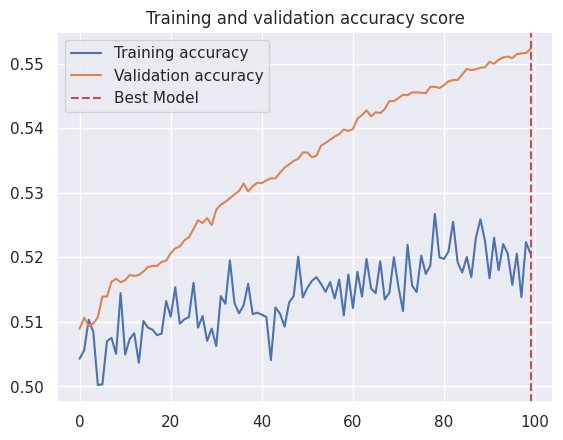

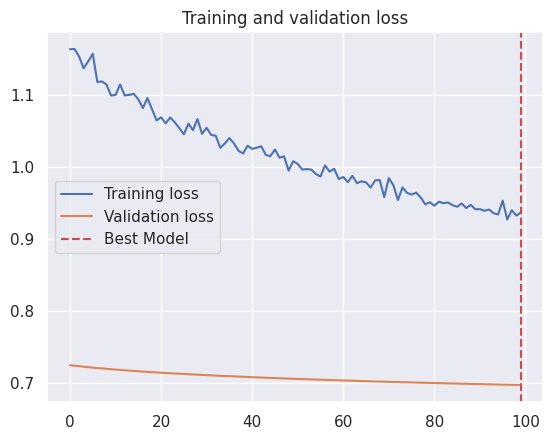

In [ ]:
plot_accuracy_loss(cnn_model_fastText_history_300_a)

In [ ]:
from keras.models import load_model
saved_model_cnn_f_o = load_model('model_cnn_fastText.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_cnn_f_o, X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_cnn_f_o, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

153/153 [==============================] - 1s 3ms/step
Train accuracy: 53.38%, Train loss: 0.71, Train precision: 52.56%, Train recall: 52.40%, Train f1-score: 52.01%
Test accuracy: 53.40%, Test loss: 0.71, Test precision: 52.53%, Test recall: 52.36%, Test f1-score: 51.93%


In [ ]:
get_auc_score(saved_model_cnn_f_o, X_test_dl, y_test)

153/153 [==============================] - 1s 3ms/step
model AUC score: 0.5283737361358134


In [ ]:
draw_confusion_matrix(saved_model_cnn_f_o, X_test_dl, y_test)

153/153 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.56      0.66      0.60      2623
           1       0.49      0.39      0.44      2246

    accuracy                           0.53      4869
   macro avg       0.53      0.52      0.52      4869
weighted avg       0.53      0.53      0.53      4869



hate  no-hate
hate     1725      898
no-hate  1371      875

153/153 [==============================] - 1s 3ms/step
model AUPRC score: 0.4877068165213744


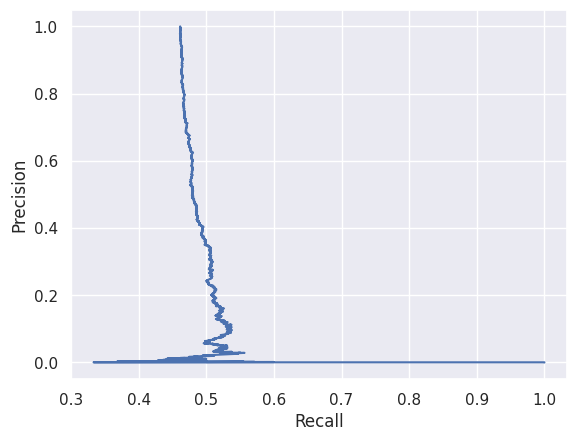

In [ ]:
draw_auprc_score(saved_model_cnn_f_o, X_test_dl, y_test)

The best model is : <class 'keras.src.engine.functional.Functional'>
153/153 [==============================] - 1s 3ms/step


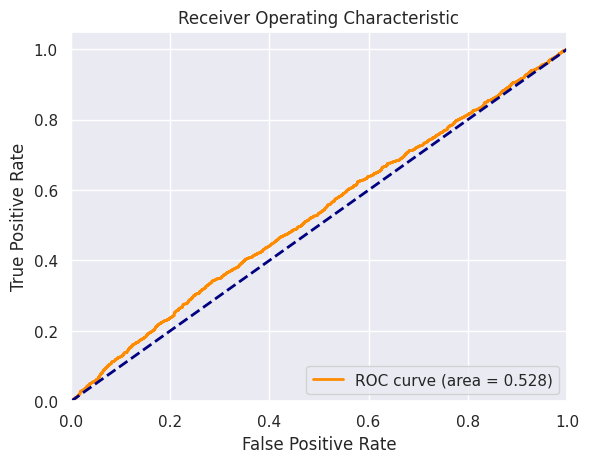

In [ ]:
draw_roc_curve(saved_model_cnn_f_o, X_test_dl, y_test)

In [ ]:
cnn_model_glove_300_a = build_model_cnn_glove(filters = 512, kernel_size=6,
                                              dropout_rate= 0.5,
                                              dense_units= 512, emb_dim = 300)
cnn_model_glove_history_300_a = fit_network(cnn_model_glove_300_a,
                                          X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_cnn_glove"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 100, 300)             6000300   ['input_2[0][0]']             
                                                                                                  
 spatial_dropout1d_1 (Spati  (None, 100, 300)             0         ['embedding_1[0][0]']         
 alDropout1D)                                                                                     
                                                                                                  
 conv1d_4 (Conv1D)           (None, 95, 512)              922112    ['spatial_dropou

Average Accuracy score: 0.5155668467283249
Best loss: 0.6925696134567261
for epoch : 19


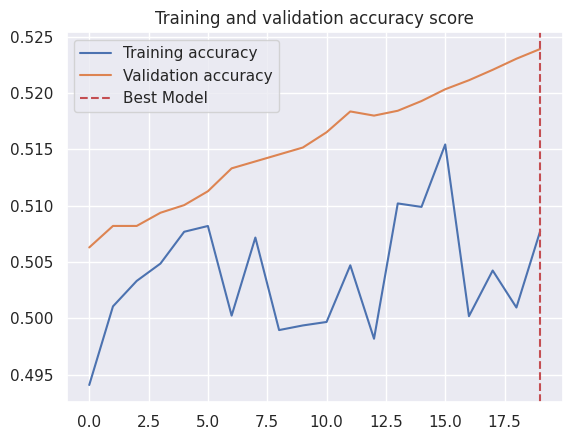

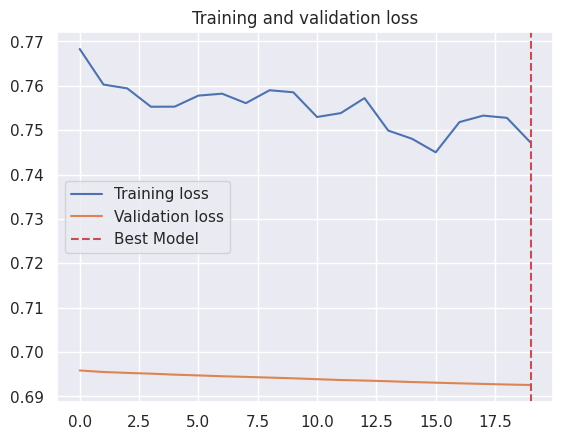

In [ ]:
plot_accuracy_loss(cnn_model_glove_history_300_a)

In [ ]:
from keras.models import load_model
saved_model_cnn_g_o = load_model('model_cnn_glove.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_cnn_g_o, X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_cnn_g_o, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

153/153 [==============================] - 1s 3ms/step
Train accuracy: 51.92%, Train loss: 0.69, Train precision: 50.73%, Train recall: 50.65%, Train f1-score: 49.80%
Test accuracy: 52.78%, Test loss: 0.69, Test precision: 51.73%, Test recall: 51.57%, Test f1-score: 50.87%


In [ ]:
get_auc_score(saved_model_cnn_g_o, X_test_dl, y_test)

153/153 [==============================] - 1s 3ms/step
model AUC score: 0.5181849954627687


In [ ]:
draw_confusion_matrix(saved_model_cnn_g_o, X_test_dl, y_test)

153/153 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.55      0.67      0.61      2623
           1       0.48      0.36      0.41      2246

    accuracy                           0.53      4869
   macro avg       0.52      0.52      0.51      4869
weighted avg       0.52      0.53      0.52      4869



hate  no-hate
hate     1765      858
no-hate  1441      805

153/153 [==============================] - 1s 3ms/step
model AUPRC score: 0.4865451383289406


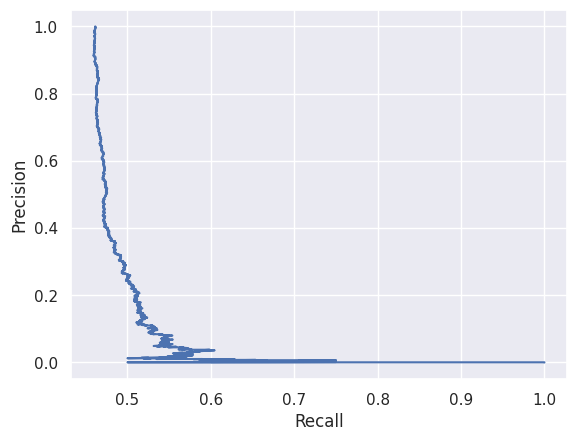

In [ ]:
draw_auprc_score(saved_model_cnn_g_o, X_test_dl, y_test)

The best model is : <class 'keras.src.engine.functional.Functional'>
153/153 [==============================] - 1s 3ms/step


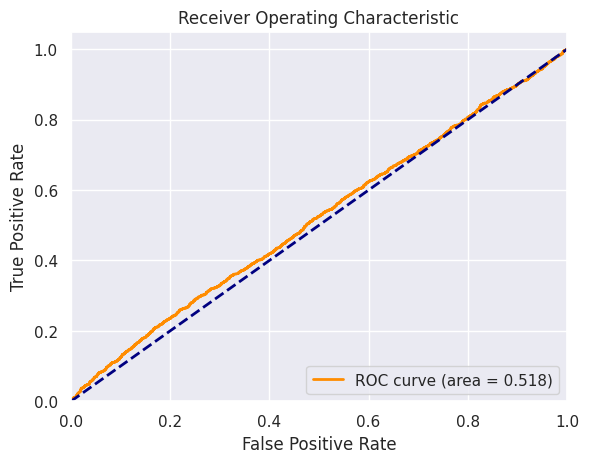

In [ ]:
draw_roc_curve(saved_model_cnn_g_o, X_test_dl, y_test)

### <h4> *LSTM models* </h4>

In [ ]:
lstm_model_fastText_300_a = build_model_lstm_fastText(lstm_units = 64, dense_units = 512,
                              k_regularizer = 0.001, dropout_rate = 0.3,
                              recurrent_dropout = 0.0, emb_dim = 300)
lstm_fastText_history_300_a = fit_network(lstm_model_fastText_300_a, X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_lstm_fastText"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 100, 300)             6000300   ['input_3[0][0]']             
                                                                                                  
 spatial_dropout1d_2 (Spati  (None, 100, 300)             0         ['embedding_2[0][0]']         
 alDropout1D)                                                                                     
                                                                                                  
 lstm (LSTM)                 (None, 100, 64)              93440     ['spatial_dr

Average Accuracy score: 0.6979051142930984
Best loss: 0.6745641827583313
for epoch : 14


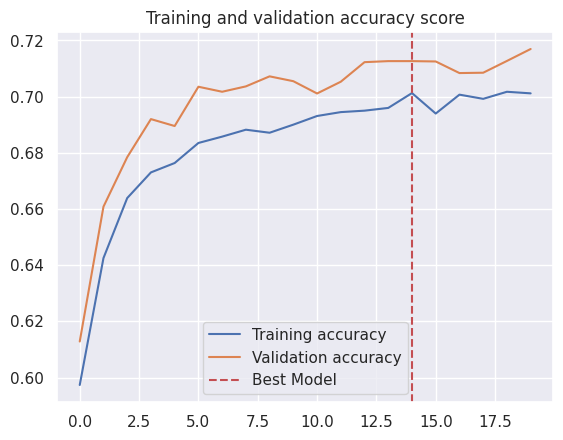

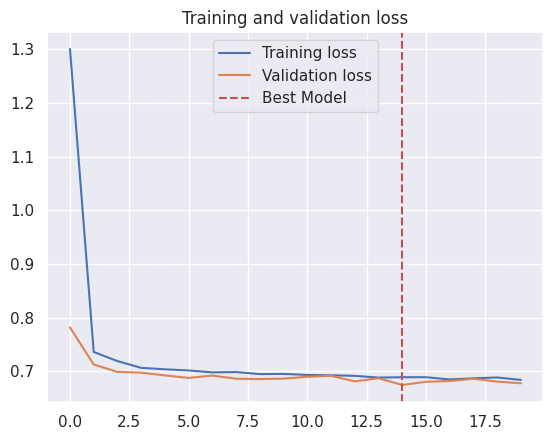

In [ ]:
plot_accuracy_loss(lstm_fastText_history_300_a)

In [ ]:
from keras.models import load_model
saved_model_lstm_f_a = load_model('model_lstm_fastText.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_lstm_f_a , X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_lstm_f_a, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

153/153 [==============================] - 1s 3ms/step
Train accuracy: 72.90%, Train loss: 0.64, Train precision: 73.39%, Train recall: 72.08%, Train f1-score: 72.17%
Test accuracy: 71.68%, Test loss: 0.67, Test precision: 71.99%, Test recall: 70.89%, Test f1-score: 70.97%


In [ ]:
get_auc_score(saved_model_lstm_f_a, X_test_dl, y_test)

153/153 [==============================] - 1s 4ms/step
model AUC score: 0.7885136756869247


In [ ]:
draw_confusion_matrix(saved_model_lstm_f_a, X_test_dl, y_test)

153/153 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      2623
           1       0.73      0.61      0.66      2246

    accuracy                           0.72      4869
   macro avg       0.72      0.71      0.71      4869
weighted avg       0.72      0.72      0.71      4869



hate  no-hate
hate     2126      497
no-hate   882     1364

153/153 [==============================] - 1s 3ms/step
model AUPRC score: 0.7697455901779456


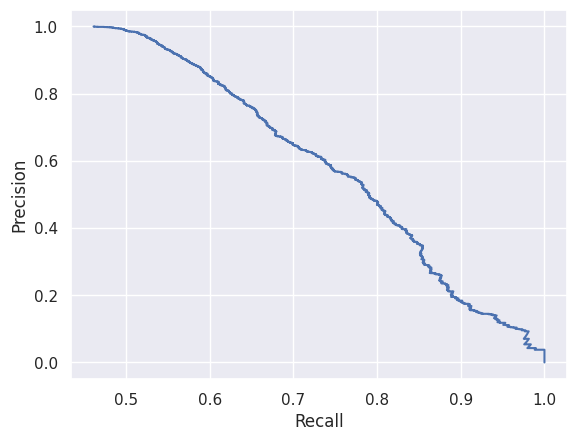

In [ ]:
draw_auprc_score(saved_model_lstm_f_a, X_test_dl, y_test)

The best model is : <class 'keras.src.engine.functional.Functional'>
153/153 [==============================] - 1s 3ms/step


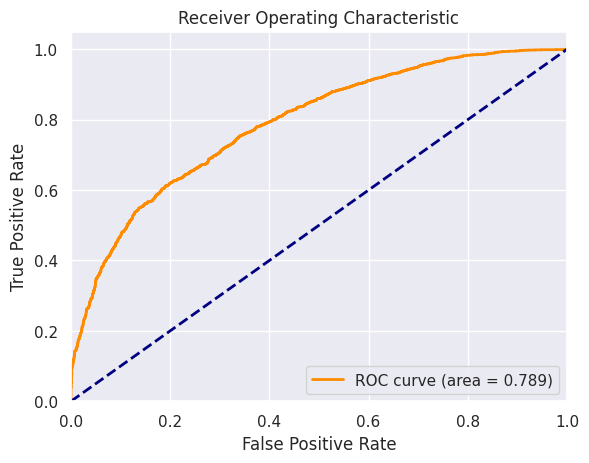

In [ ]:
draw_roc_curve(saved_model_lstm_f_a, X_test_dl, y_test)

In [ ]:
lstm_model_glove_300_a = build_model_lstm_glove(lstm_units = 64, dense_units = 512,
                              k_regularizer = 0.001, dropout_rate = 0.3,
                              recurrent_dropout = 0.0, emb_dim = 300)
lstm_glove_history_300_a = fit_network(lstm_model_glove_300_a, X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_lstm_glove"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_3 (Embedding)     (None, 100, 300)             6000300   ['input_4[0][0]']             
                                                                                                  
 spatial_dropout1d_3 (Spati  (None, 100, 300)             0         ['embedding_3[0][0]']         
 alDropout1D)                                                                                     
                                                                                                  
 lstm_1 (LSTM)               (None, 100, 64)              93440     ['spatial_dropo

Average Accuracy score: 0.6877849598725637
Best loss: 0.6497669816017151
for epoch : 6


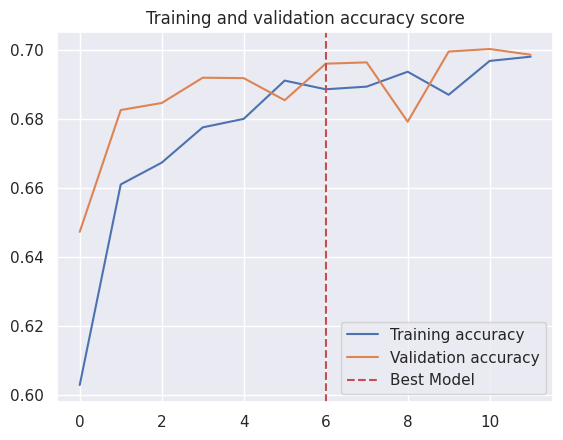

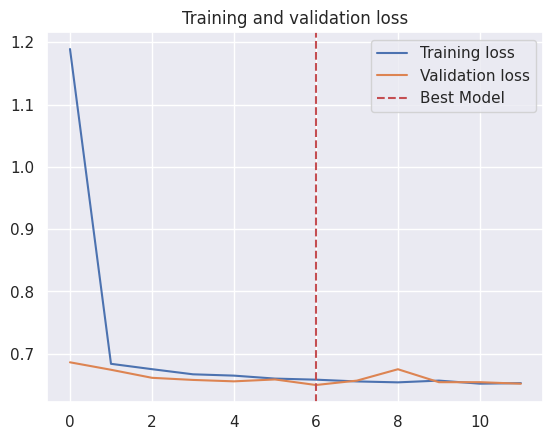

In [ ]:
plot_accuracy_loss(lstm_glove_history_300_a)

In [ ]:
from keras.models import load_model
saved_model_lstm_g_a = load_model('model_lstm_glove.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_lstm_g_a , X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_lstm_g_a, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

153/153 [==============================] - 1s 3ms/step
Train accuracy: 71.69%, Train loss: 0.62, Train precision: 72.30%, Train recall: 70.77%, Train f1-score: 70.80%
Test accuracy: 69.89%, Test loss: 0.65, Test precision: 70.31%, Test recall: 68.97%, Test f1-score: 68.97%


In [ ]:
get_auc_score(saved_model_lstm_g_a, X_test_dl, y_test)

153/153 [==============================] - 1s 3ms/step
model AUC score: 0.7713495996950056


In [ ]:
draw_confusion_matrix(saved_model_lstm_g_a, X_test_dl, y_test)

153/153 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.69      0.81      0.74      2623
           1       0.72      0.57      0.64      2246

    accuracy                           0.70      4869
   macro avg       0.70      0.69      0.69      4869
weighted avg       0.70      0.70      0.69      4869



hate  no-hate
hate     2122      501
no-hate   965     1281

153/153 [==============================] - 1s 3ms/step
model AUPRC score: 0.7469411403969288


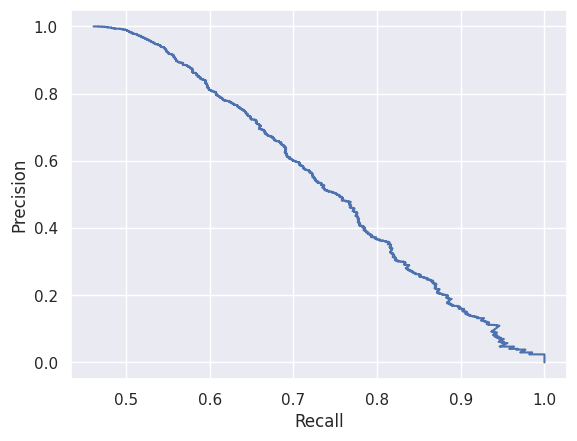

In [ ]:
draw_auprc_score(saved_model_lstm_g_a, X_test_dl, y_test)

The best model is : <class 'keras.src.engine.functional.Functional'>
153/153 [==============================] - 1s 3ms/step


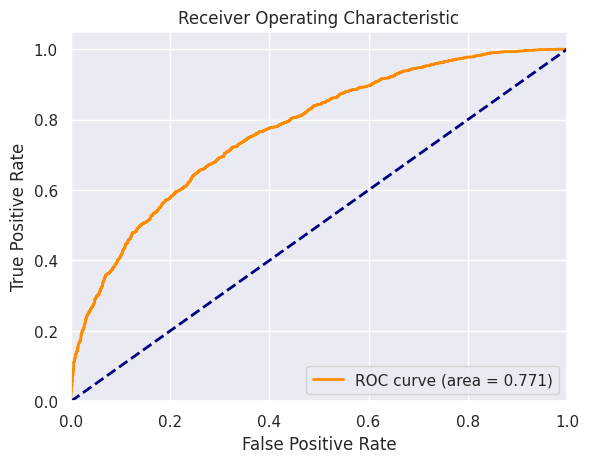

In [ ]:
draw_roc_curve(saved_model_lstm_g_a, X_test_dl, y_test)

### <h4> *GRU models* </h4>

In [ ]:
gru_model_fastText_300_a = build_model_gru_fastText(gru_units = 64,learning_rate = 0.001,
                              k_regularizer = 0.00001, dropout_rate = 0.5,
                              recurrent_dropout = 0.0, emb_dim = 300)
gru_fastText_history_300_a = fit_network(gru_model_fastText_300_a, X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_gru_fastText"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 100, 300)             6000300   ['input_5[0][0]']             
                                                                                                  
 spatial_dropout1d_4 (Spati  (None, 100, 300)             0         ['embedding_4[0][0]']         
 alDropout1D)                                                                                     
                                                                                                  
 gru (GRU)                   (None, 100, 64)              70272     ['spatial_dro

Average Accuracy score: 0.7058932290357702
Best loss: 0.5716627836227417
for epoch : 11


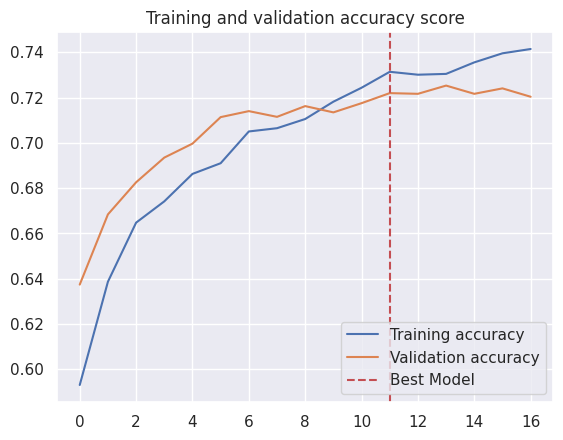

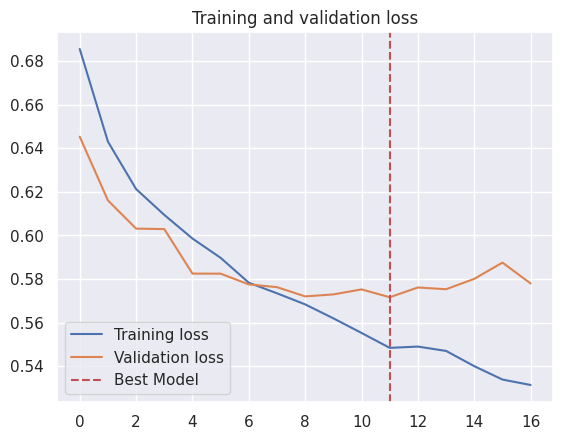

In [ ]:
plot_accuracy_loss(gru_fastText_history_300_a)

In [ ]:
from keras.models import load_model
saved_model_gru_f_a = load_model('model_gru_fastText.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_gru_f_a , X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_gru_f_a, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

153/153 [==============================] - 1s 3ms/step
Train accuracy: 78.36%, Train loss: 0.47, Train precision: 78.44%, Train recall: 77.93%, Train f1-score: 78.07%
Test accuracy: 71.49%, Test loss: 0.58, Test precision: 71.41%, Test recall: 71.01%, Test f1-score: 71.10%


In [ ]:
get_auc_score(saved_model_gru_f_a, X_test_dl, y_test)

153/153 [==============================] - 1s 3ms/step
model AUC score: 0.7984926988429296


In [ ]:
draw_confusion_matrix(saved_model_gru_f_a, X_test_dl, y_test)

153/153 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      2623
           1       0.71      0.65      0.68      2246

    accuracy                           0.71      4869
   macro avg       0.71      0.71      0.71      4869
weighted avg       0.71      0.71      0.71      4869



hate  no-hate
hate     2025      598
no-hate   790     1456

153/153 [==============================] - 1s 4ms/step
model AUPRC score: 0.7815213943788131


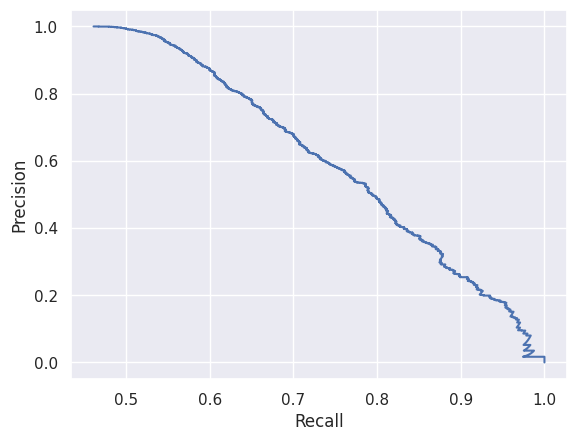

In [ ]:
draw_auprc_score(saved_model_gru_f_a, X_test_dl, y_test)

The best model is : <class 'keras.src.engine.functional.Functional'>
153/153 [==============================] - 1s 4ms/step


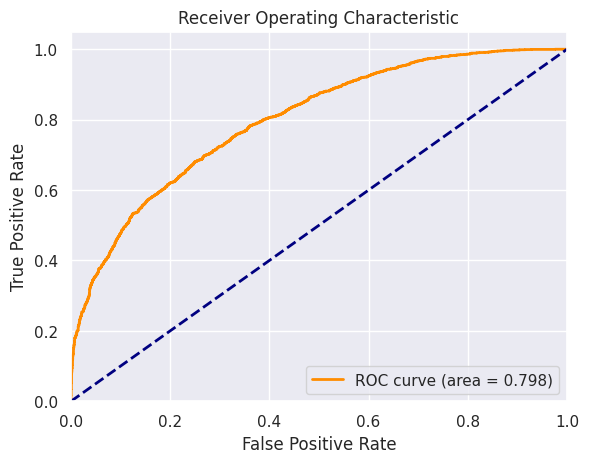

In [ ]:
draw_roc_curve(saved_model_gru_f_a, X_test_dl, y_test)

In [ ]:
gru_model_glove_300_a = build_model_gru_glove(gru_units = 64 ,learning_rate = 0.001,
                              k_regularizer = 0.00001, dropout_rate = 0.5,
                              recurrent_dropout = 0.0, emb_dim = 300)
gru_glove_history_300_a = fit_network(gru_model_glove_300_a, X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_gru_glove"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_5 (Embedding)     (None, 100, 300)             6000300   ['input_6[0][0]']             
                                                                                                  
 spatial_dropout1d_5 (Spati  (None, 100, 300)             0         ['embedding_5[0][0]']         
 alDropout1D)                                                                                     
                                                                                                  
 gru_1 (GRU)                 (None, 100, 64)              70272     ['spatial_dropou

Average Accuracy score: 0.701938038522547
Best loss: 0.5782486200332642
for epoch : 5


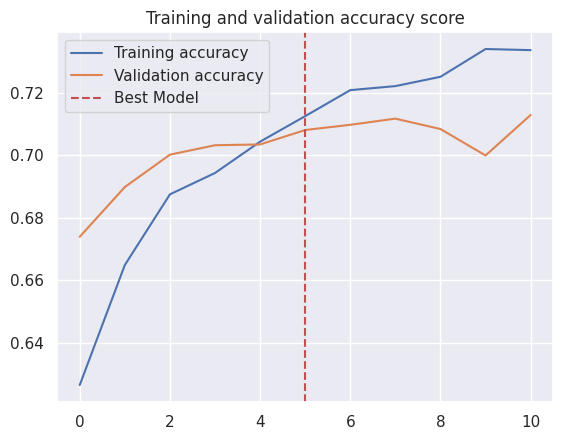

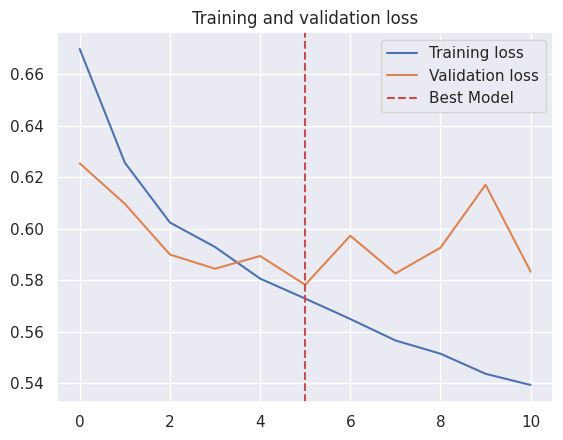

In [ ]:
plot_accuracy_loss(gru_glove_history_300_a)

In [ ]:
from keras.models import load_model
saved_model_gru_g_a = load_model('model_gru_glove.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_gru_g_a , X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_gru_g_a, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

153/153 [==============================] - 1s 3ms/step
Train accuracy: 77.64%, Train loss: 0.48, Train precision: 78.29%, Train recall: 76.91%, Train f1-score: 77.09%
Test accuracy: 71.60%, Test loss: 0.58, Test precision: 71.91%, Test recall: 70.80%, Test f1-score: 70.87%


In [ ]:
get_auc_score(saved_model_gru_g_a, X_test_dl, y_test)

153/153 [==============================] - 1s 4ms/step
model AUC score: 0.7947943376440142


In [ ]:
draw_confusion_matrix(saved_model_gru_g_a, X_test_dl, y_test)

153/153 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.71      0.81      0.75      2623
           1       0.73      0.61      0.66      2246

    accuracy                           0.72      4869
   macro avg       0.72      0.71      0.71      4869
weighted avg       0.72      0.72      0.71      4869



hate  no-hate
hate     2126      497
no-hate   886     1360

153/153 [==============================] - 1s 3ms/step
model AUPRC score: 0.7689907118079338


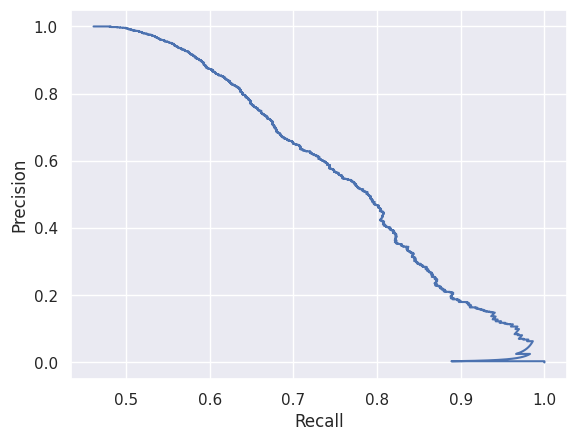

In [ ]:
draw_auprc_score(saved_model_gru_g_a, X_test_dl, y_test)

The best model is : <class 'keras.src.engine.functional.Functional'>
153/153 [==============================] - 1s 3ms/step


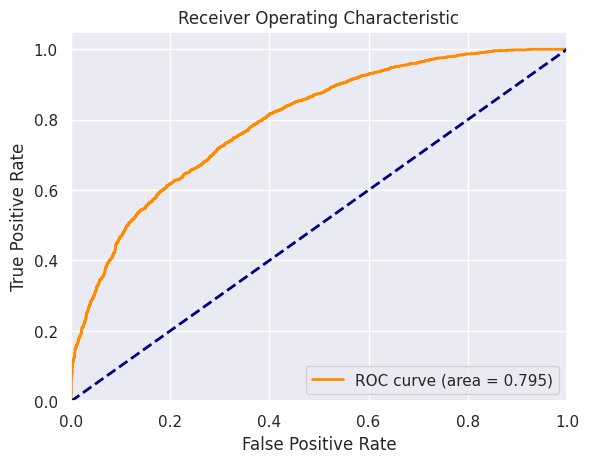

In [ ]:
draw_roc_curve(saved_model_gru_g_a, X_test_dl, y_test)

### <h4> *BiGRU models* </h4>

In [ ]:
bi_gru_model_fastText_a = build_model_bi_gru_fastText(gru_units = 256, k_regularizer = 0.00001,learning_rate = 0.001,
                                dropout_rate = 0.5, recurrent_dropout= 0.0, emb_dim = 300)
bi_gru_model_fastText_history_a = fit_network(bi_gru_model_fastText_a, X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_bigru_fastText"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 100, 300)             6000300   ['input_2[0][0]']             
                                                                                                  
 spatial_dropout1d_1 (Spati  (None, 100, 300)             0         ['embedding_1[0][0]']         
 alDropout1D)                                                                                     
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 100, 512)             857088    ['spatial_d

Average Accuracy score: 0.7024813836271112
Best loss: 0.6476995348930359
for epoch : 6


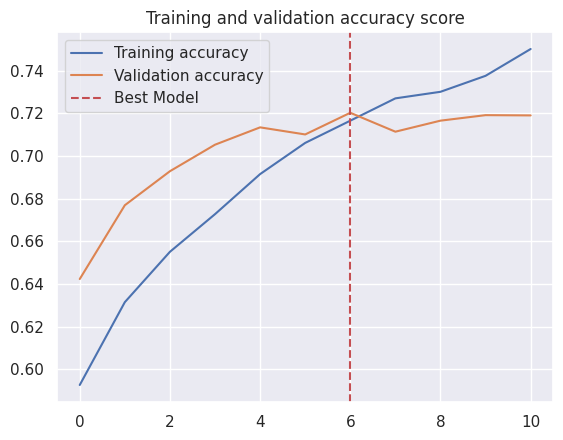

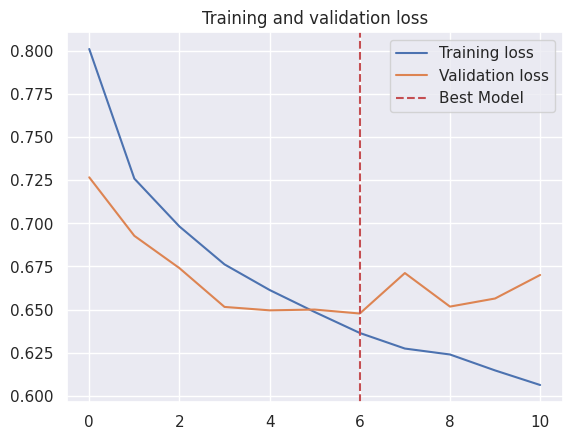

In [ ]:
plot_accuracy_loss(bi_gru_model_fastText_history_a)

In [ ]:
from keras.models import load_model
saved_model_bi_gru_f_a = load_model('model_bigru_fastText.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_bi_gru_f_a , X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_bi_gru_f_a, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

153/153 [==============================] - 1s 6ms/step
Train accuracy: 76.65%, Train loss: 0.56, Train precision: 77.14%, Train recall: 75.95%, Train f1-score: 76.12%
Test accuracy: 72.48%, Test loss: 0.64, Test precision: 72.72%, Test recall: 71.76%, Test f1-score: 71.86%


In [ ]:
get_auc_score(saved_model_bi_gru_f_a, X_test_dl, y_test)

153/153 [==============================] - 1s 7ms/step
model AUC score: 0.8020057006500141


In [ ]:
draw_confusion_matrix(saved_model_bi_gru_f_a, X_test_dl, y_test)

153/153 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      2623
           1       0.74      0.62      0.68      2246

    accuracy                           0.72      4869
   macro avg       0.73      0.72      0.72      4869
weighted avg       0.73      0.72      0.72      4869



hate  no-hate
hate     2126      497
no-hate   843     1403

153/153 [==============================] - 1s 7ms/step
model AUPRC score: 0.7856689803041247


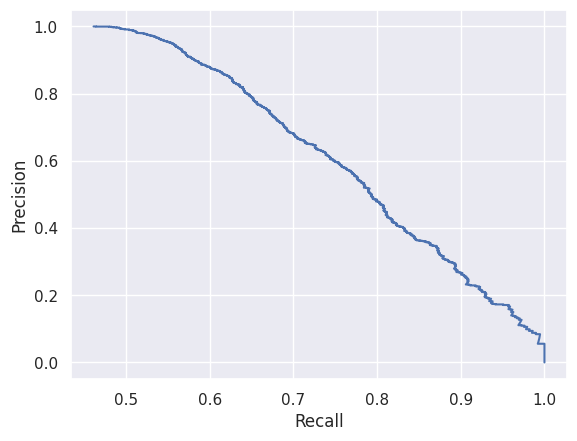

In [ ]:
draw_auprc_score(saved_model_bi_gru_f_a, X_test_dl, y_test)

The best model is : <class 'keras.src.engine.functional.Functional'>
153/153 [==============================] - 1s 7ms/step


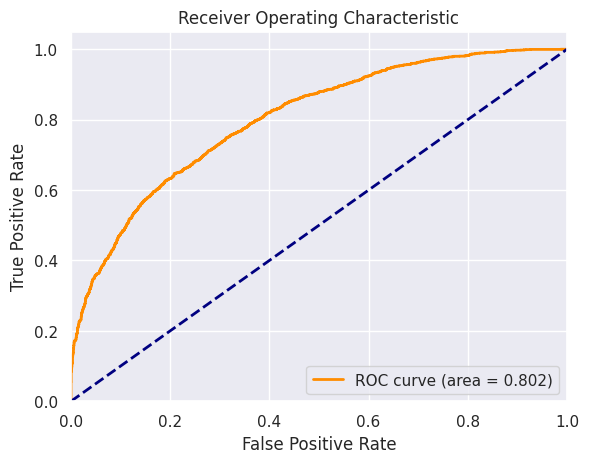

In [ ]:
draw_roc_curve(saved_model_bi_gru_f_a, X_test_dl, y_test)

In [ ]:
bi_gru_model_glove_300_a = build_model_bi_gru_glove(gru_units = 64, k_regularizer = 0.00001,learning_rate= 0.001,
                                dropout_rate = 0.4, recurrent_dropout= 0.0, emb_dim = 300)
bi_gru_model_glove_history_300_a = fit_network(bi_gru_model_glove_300_a , X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_bigru_glove"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 100, 300)             6000300   ['input_3[0][0]']             
                                                                                                  
 spatial_dropout1d_2 (Spati  (None, 100, 300)             0         ['embedding_2[0][0]']         
 alDropout1D)                                                                                     
                                                                                                  
 bidirectional_2 (Bidirecti  (None, 100, 128)             140544    ['spatial_drop

Average Accuracy score: 0.7034435603353713
Best loss: 0.592952311038971
for epoch : 4


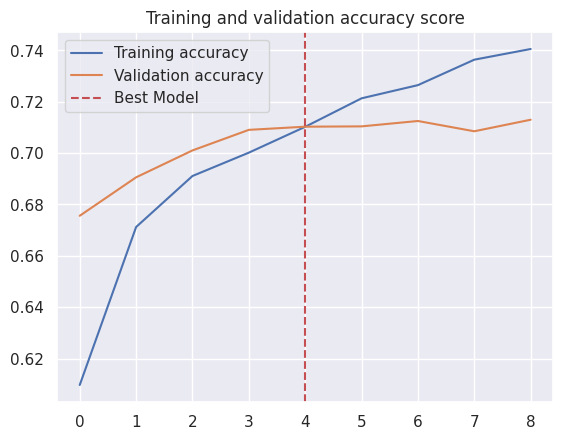

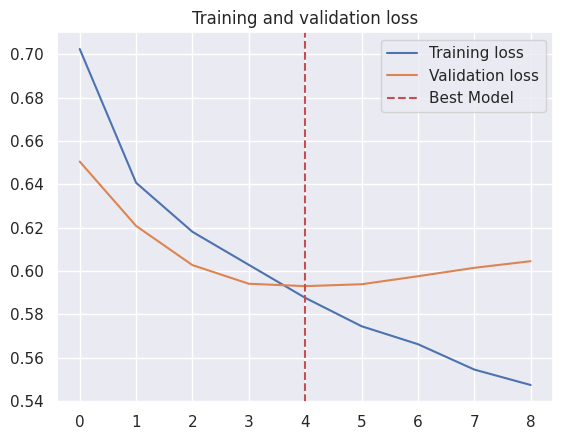

In [ ]:
plot_accuracy_loss(bi_gru_model_glove_history_300_a)

In [ ]:
from keras.models import load_model
saved_model_bi_gru_g_a = load_model('model_bigru_glove.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_bi_gru_g_a, X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_bi_gru_g_a, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

153/153 [==============================] - 1s 4ms/step
Train accuracy: 78.31%, Train loss: 0.48, Train precision: 79.68%, Train recall: 77.36%, Train f1-score: 77.56%
Test accuracy: 72.66%, Test loss: 0.60, Test precision: 73.44%, Test recall: 71.70%, Test f1-score: 71.75%


In [ ]:
get_auc_score(saved_model_bi_gru_g_a, X_test_dl, y_test)

153/153 [==============================] - 1s 5ms/step
model AUC score: 0.7992020549770525


In [ ]:
draw_confusion_matrix(saved_model_bi_gru_g_a, X_test_dl, y_test)

153/153 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.71      0.84      0.77      2623
           1       0.76      0.59      0.67      2246

    accuracy                           0.73      4869
   macro avg       0.73      0.72      0.72      4869
weighted avg       0.73      0.73      0.72      4869



hate  no-hate
hate     2207      416
no-hate   915     1331

153/153 [==============================] - 1s 5ms/step
model AUPRC score: 0.7761356023857626


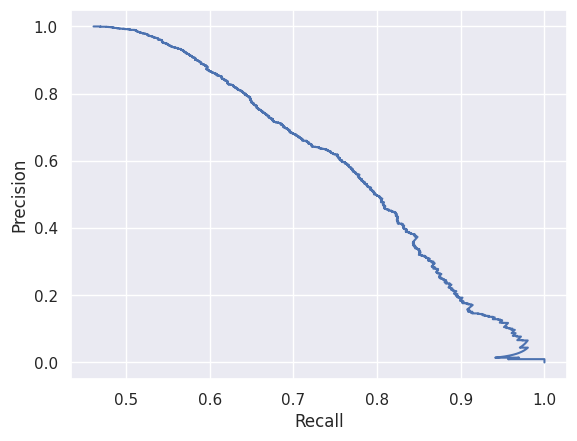

In [ ]:
draw_auprc_score(saved_model_bi_gru_g_a, X_test_dl, y_test)

The best model is : <class 'keras.src.engine.functional.Functional'>
153/153 [==============================] - 1s 4ms/step


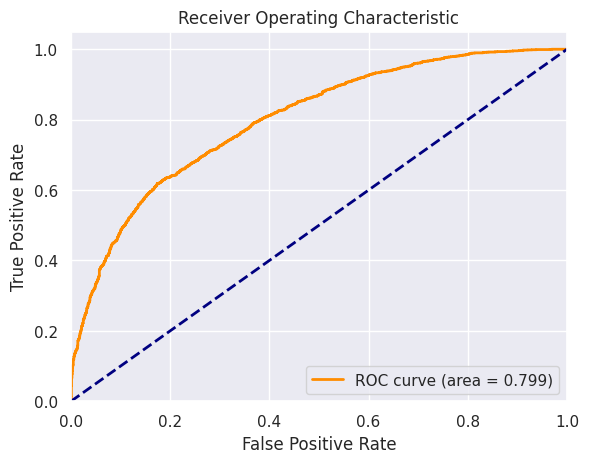

In [ ]:
draw_roc_curve(saved_model_bi_gru_g_a, X_test_dl, y_test)

### <h4> *BiGRU + CNN models* </h4>

In [ ]:
bi_gru_cnn_model_fastText_a = build_model_bi_gru_cnn_fastText(filters = 16, kernel_size=6,
                                              dropout_rate= 0.5, dense_units= 64,
                                              gru_units = 256, k_regularizer = 0.00001,
                                              learning_rate= 0.003, recurrent_dropout= 0.0, emb_dim = 300)
bi_gru_cnn_model_fastText_history_a = fit_network(bi_gru_cnn_model_fastText_a , X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_bi_gru_cnn_fastText"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_3 (Embedding)     (None, 100, 300)             6000300   ['input_4[0][0]']             
                                                                                                  
 spatial_dropout1d_3 (Spati  (None, 100, 300)             0         ['embedding_3[0][0]']         
 alDropout1D)                                                                                     
                                                                                                  
 conv1d (Conv1D)             (None, 95, 16)               28816     ['spat

Average Accuracy score: 0.6866297040666852
Best loss: 0.6811482310295105
for epoch : 2


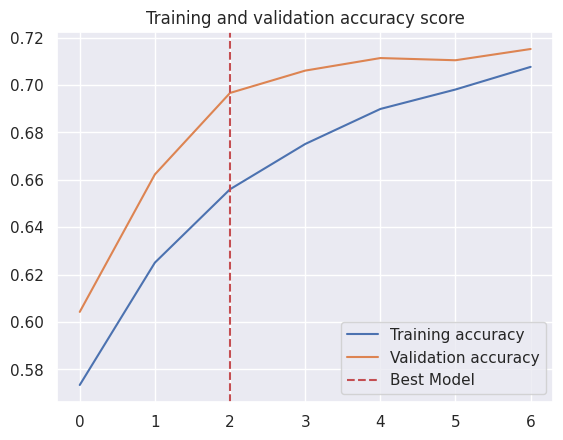

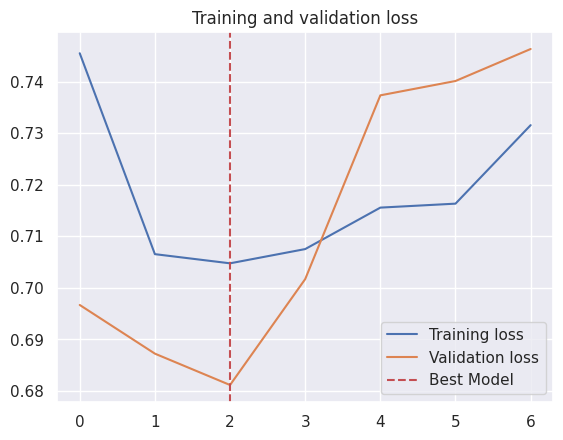

In [ ]:
plot_accuracy_loss(bi_gru_cnn_model_fastText_history_a)

In [ ]:
from keras.models import load_model
saved_model_bi_gru_cnn_f_a = load_model('model_bi_gru_cnn_fastText.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_bi_gru_cnn_f_a , X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_bi_gru_cnn_f_a, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

153/153 [==============================] - 1s 6ms/step
Train accuracy: 75.99%, Train loss: 0.65, Train precision: 76.79, Train recall: 75.15%, Train f1-score: 75.30%
Test accuracy: 71.51%, Test loss: 0.74, Test precision: 71.92, Test recall: 70.67%, Test f1-score: 70.72%


In [ ]:
get_auc_score(saved_model_bi_gru_cnn_f_a, X_test_dl, y_test)

153/153 [==============================] - 1s 7ms/step
model AUC score: 0.793191199570618


In [ ]:
draw_confusion_matrix(saved_model_bi_gru_cnn_f_a, X_test_dl, y_test)

153/153 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.70      0.82      0.76      2623
           1       0.74      0.60      0.66      2246

    accuracy                           0.72      4869
   macro avg       0.72      0.71      0.71      4869
weighted avg       0.72      0.72      0.71      4869



hate  no-hate
hate     2141      482
no-hate   905     1341

153/153 [==============================] - 1s 6ms/step
model AUPRC score: 0.774145907174445


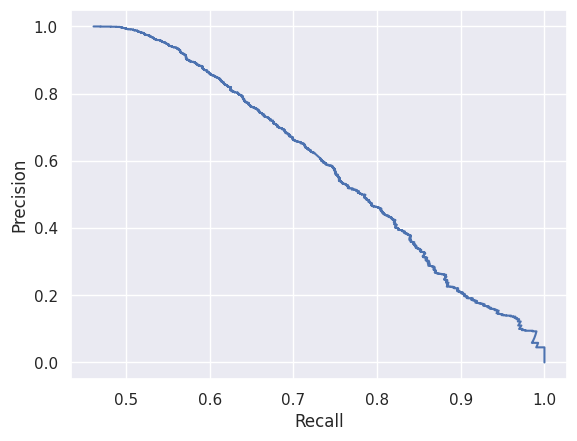

In [ ]:
draw_auprc_score(saved_model_bi_gru_cnn_f_a, X_test_dl, y_test)

The best model is : <class 'keras.src.engine.functional.Functional'>
153/153 [==============================] - 1s 8ms/step


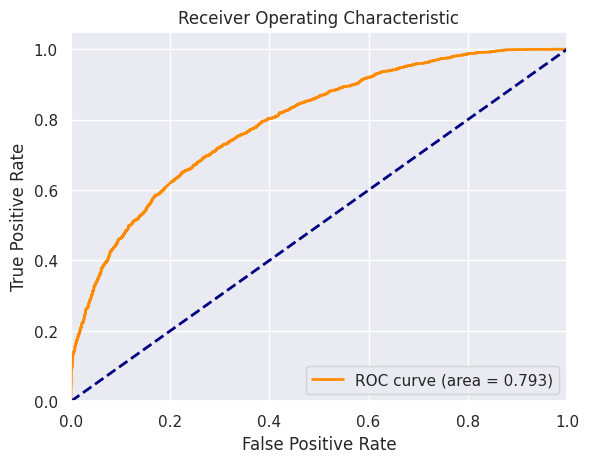

In [ ]:
draw_roc_curve(saved_model_bi_gru_cnn_f_a, X_test_dl, y_test)

In [ ]:
bi_gru_cnn_model_glove_300_a = build_model_bi_gru_cnn_glove(filters = 8, kernel_size=6,
                                              dropout_rate= 0.4, dense_units= 64,
                                              gru_units = 256, k_regularizer = 0.00001,
                                              learning_rate= 0.003, recurrent_dropout= 0.0, emb_dim = 300)
bi_gru_cnn_model_glove_history_300_a = fit_network(bi_gru_cnn_model_glove_300_a , X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_bi_gru_cnn_glove"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_10 (Embedding)    (None, 100, 300)             6000300   ['input_11[0][0]']            
                                                                                                  
 spatial_dropout1d_10 (Spat  (None, 100, 300)             0         ['embedding_10[0][0]']        
 ialDropout1D)                                                                                    
                                                                                                  
 conv1d_16 (Conv1D)          (None, 95, 8)                14408     ['spatial

Average Accuracy score: 0.674847682317098
Best loss: 0.5919297933578491
for epoch : 3


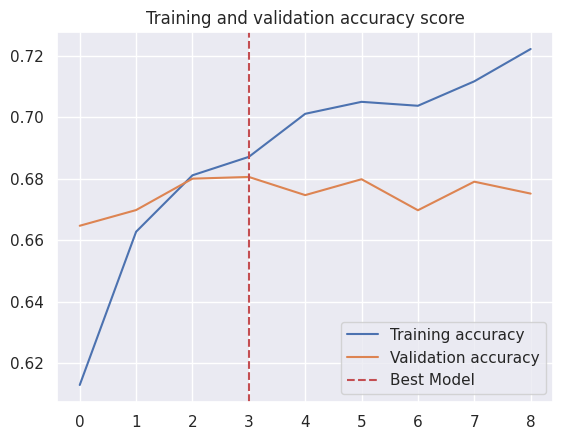

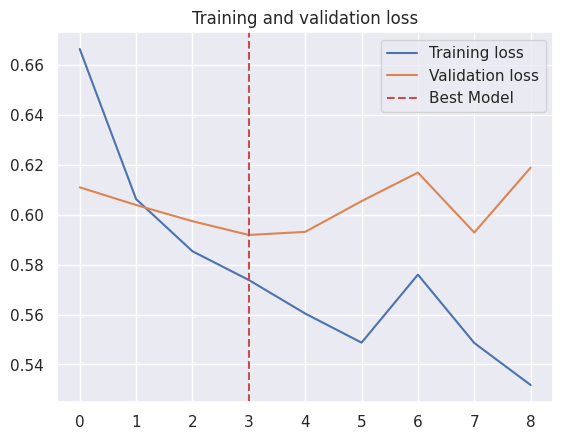

In [ ]:
plot_accuracy_loss(bi_gru_cnn_model_glove_history_300_a)

In [ ]:
from keras.models import load_model
saved_model_bi_gru_cnn_g_a = load_model('model_bi_gru_cnn_glove.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_bi_gru_cnn_g_a , X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_bi_gru_cnn_g_a, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

153/153 [==============================] - 1s 7ms/step
Train accuracy: 73.91%, Train loss: 0.51, Train precision: 74.64%, Train recall: 73.02%, Train f1-score: 73.12%
Test accuracy: 67.76%, Test loss: 0.59, Test precision: 67.95%, Test recall: 66.86%, Test f1-score: 66.82%


In [ ]:
get_auc_score(saved_model_bi_gru_cnn_g_a, X_test_dl, y_test)

153/153 [==============================] - 1s 8ms/step
model AUC score: 0.748667517192423


In [ ]:
draw_confusion_matrix(saved_model_bi_gru_cnn_g_a, X_test_dl, y_test)

153/153 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      2623
           1       0.69      0.55      0.61      2246

    accuracy                           0.68      4869
   macro avg       0.68      0.67      0.67      4869
weighted avg       0.68      0.68      0.67      4869



hate  no-hate
hate     2058      565
no-hate  1005     1241

In [ ]:
draw_auprc_score(saved_model_bi_gru_cnn_g_a, X_test_dl, y_test)

The best model is : <class 'keras.src.engine.functional.Functional'>
153/153 [==============================] - 1s 7ms/step


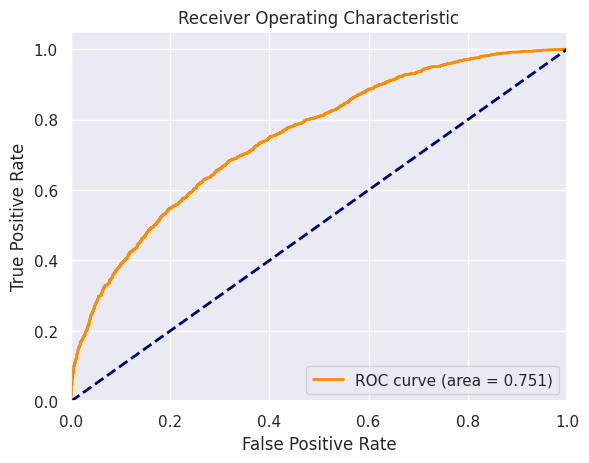

In [ ]:
draw_roc_curve(saved_model_bi_gru_cnn_g_a, X_test_dl, y_test)

### <h4> *BiGRU + LSTM models* </h4>

### <h4> *RoBERTA models* </h4>

In [ ]:
roberta_model_a = build_model_roberta(gru_units = 64, k_regularizer = 0.00001,
                                     dropout_rate = 0.5, dense_units = 256,
                                     recurrent_dropout = 0.0, emb_dim = 300)
roberta_history_a = fit_network(roberta_model_a, X_train_roberta, y_train, X_dev_roberta, y_dev)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['roberta.embeddings.position_ids', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

Model: "model_roberta"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 100)]                0         []                            
 )                                                                                                
                                                                                                  
 input_mask (InputLayer)     [(None, 100)]                0         []                            
                                                                                                  
 input_type_ids (InputLayer  [(None, 100)]                0         []                            
 )                                                                                                
                                                                                      

305/305 [==============================] - ETA: 0s - loss: 0.9597 - accuracy: 0.5226 - precision_13: 0.4594 - recall_13: 0.1904
Epoch 1: val_accuracy improved from -inf to 0.54023, saving model to model_roberta.keras


/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


305/305 [==============================] - 515s 2s/step - loss: 0.9597 - accuracy: 0.5226 - precision_13: 0.4594 - recall_13: 0.1904 - val_loss: 0.8393 - val_accuracy: 0.5402 - val_precision_13: 0.0000e+00 - val_recall_13: 0.0000e+00
Epoch 2/3
305/305 [==============================] - ETA: 0s - loss: 0.8002 - accuracy: 0.5369 - precision_13: 0.4810 - recall_13: 0.0324
Epoch 2: val_accuracy did not improve from 0.54023
305/305 [==============================] - 460s 2s/step - loss: 0.8002 - accuracy: 0.5369 - precision_13: 0.4810 - recall_13: 0.0324 - val_loss: 0.7708 - val_accuracy: 0.5402 - val_precision_13: 0.0000e+00 - val_recall_13: 0.0000e+00
Epoch 3/3
305/305 [==============================] - ETA: 0s - loss: 0.7547 - accuracy: 0.5360 - precision_13: 0.4617 - recall_13: 0.0281
Epoch 3: val_accuracy did not improve from 0.54023
305/305 [==============================] - 460s 2s/step - loss: 0.7547 - accuracy: 0.5360 - precision_13: 0.4617 - recall_13: 0.0281 - val_loss: 0.7386 - 

Average Accuracy score: 0.5402341485023499
Best loss: 0.7385542988777161
for epoch : 2


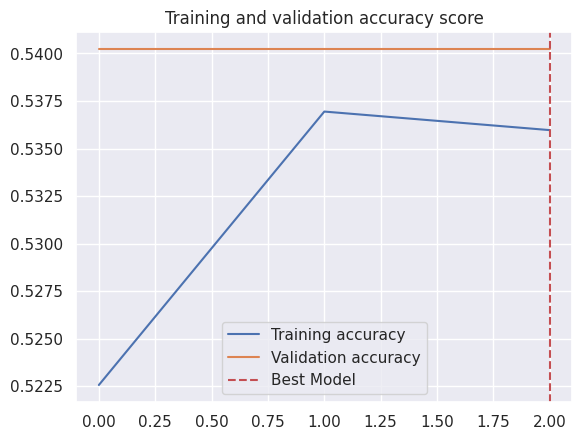

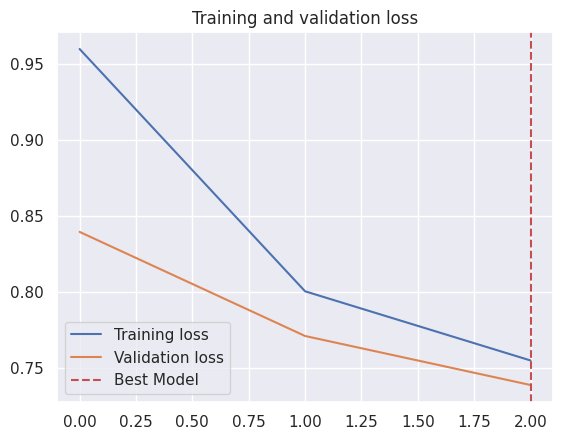

In [ ]:
plot_accuracy_loss(roberta_history_a)

In [ ]:
get_auc_score(roberta_history_a, X_test_roberta, y_test)

AttributeError: 'History' object has no attribute 'predict'

In [ ]:
from keras.models import load_model
saved_model_roberta_a = load_model('model_roberta.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_roberta_a , X_train_roberta, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_roberta_a, X_test_roberta, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

TypeError: 'str' object is not callable

In [ ]:
draw_confusion_matrix(saved_model_roberta_a, X_test_roberta, y_test)

In [ ]:
draw_auprc_score(saved_model_roberta_a, X_test_roberta, y_test)

In [ ]:
draw_roc_curve(saved_model_roberta_a, X_test_roberta, y_test)

## <h3> *Training on perturbated data* </h3>

### <h4> *CNN models* </h4>

In [ ]:
cnn_model_fastText_300 = build_model_cnn_fastText(filters = 512, kernel_size=6,
                                              dropout_rate= 0.5,
                                              dense_units= 512, emb_dim = 300)
cnn_model_fastText_history_300 = fit_network(cnn_model_fastText_300,
                                          X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_cnn_fastText"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_6 (Embedding)     (None, 100, 300)             6000300   ['input_7[0][0]']             
                                                                                                  
 spatial_dropout1d_6 (Spati  (None, 100, 300)             0         ['embedding_6[0][0]']         
 alDropout1D)                                                                                     
                                                                                                  
 conv1d_16 (Conv1D)          (None, 95, 512)              922112    ['spatial_dro

Average Accuracy score: 0.5005534328520298
Best loss: 0.7213730812072754
for epoch : 2


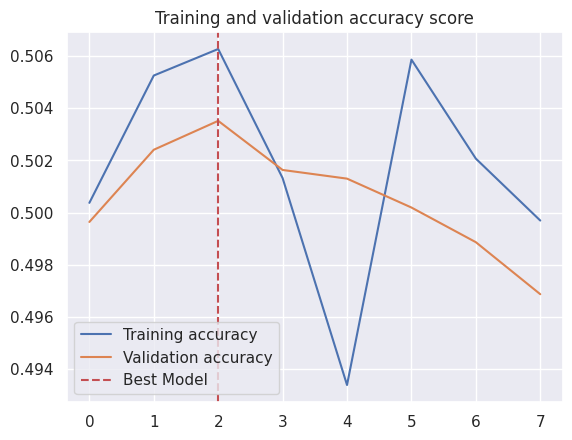

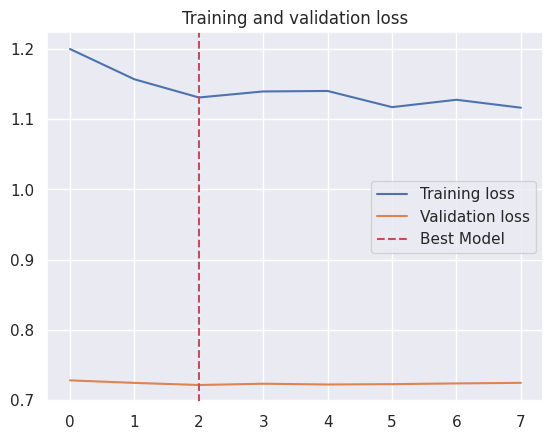

In [ ]:
plot_accuracy_loss(cnn_model_fastText_history_300)

In [ ]:
from keras.models import load_model
saved_model_cnn_f = load_model('model_cnn_fastText.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_cnn_f, X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_cnn_f, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

242/242 [==============================] - 1s 3ms/step
Train accuracy: 50.57%, Train loss: 0.73, Train precision: 50.57%, Train recall: 50.57%, Train f1-score: 50.56%
Test accuracy: 50.72%, Test loss: 0.72, Test precision: 50.93%, Test recall: 50.95%, Test f1-score: 50.61%


In [ ]:
get_auc_score(saved_model_cnn_f, X_test_dl, y_test)

242/242 [==============================] - 1s 4ms/step
model AUC score: 0.5069408213997444


In [ ]:
draw_confusion_matrix(saved_model_cnn_f, X_test_dl, y_test)

242/242 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.57      0.49      0.53      4365
           1       0.45      0.53      0.48      3379

    accuracy                           0.51      7744
   macro avg       0.51      0.51      0.51      7744
weighted avg       0.52      0.51      0.51      7744



hate  no-hate
hate     2147     2218
no-hate  1598     1781

242/242 [==============================] - 1s 4ms/step
model AUPRC score: 0.43858156782566643


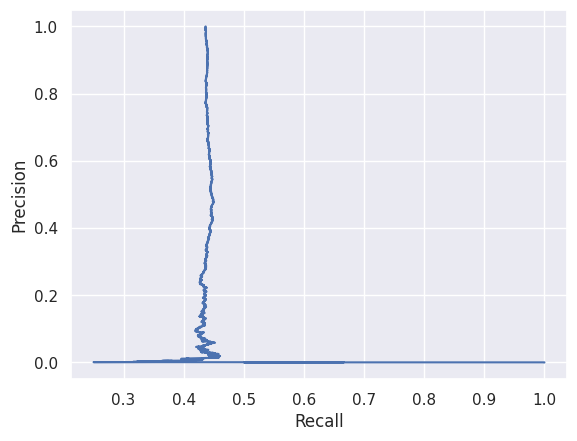

In [ ]:
draw_auprc_score(saved_model_cnn_f, X_test_dl, y_test)

The best model is : <class 'keras.src.engine.functional.Functional'>
242/242 [==============================] - 1s 4ms/step


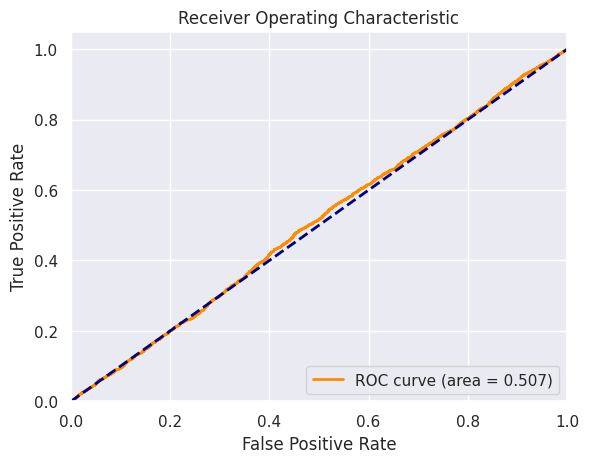

In [ ]:
draw_roc_curve(saved_model_cnn_f, X_test_dl, y_test)

In [ ]:
cnn_model_glove_300 = build_model_cnn_glove(filters = 512, kernel_size=6,
                                              dropout_rate= 0.5,
                                              dense_units= 512, emb_dim = 300)
cnn_model_glove_history_300 = fit_network(cnn_model_glove_300,
                                          X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_cnn_glove"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_7 (Embedding)     (None, 100, 300)             6000300   ['input_8[0][0]']             
                                                                                                  
 spatial_dropout1d_7 (Spati  (None, 100, 300)             0         ['embedding_7[0][0]']         
 alDropout1D)                                                                                     
                                                                                                  
 conv1d_20 (Conv1D)          (None, 95, 512)              922112    ['spatial_dropou

Average Accuracy score: 0.48310181001822156
Best loss: 0.6985885500907898
for epoch : 0


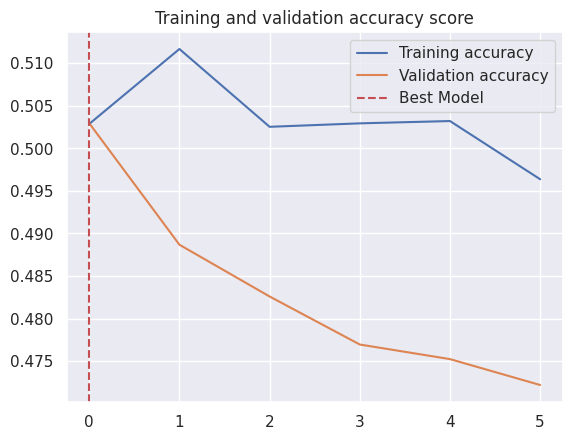

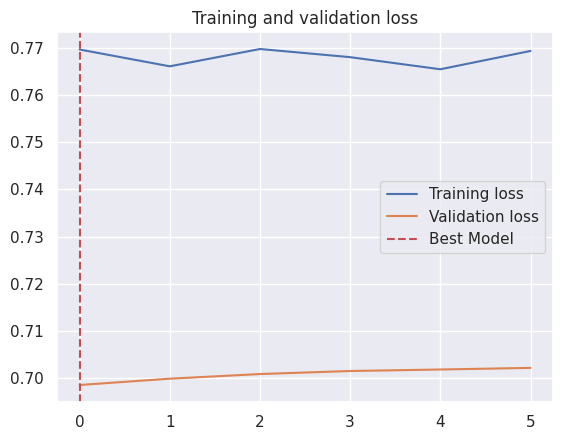

In [ ]:
plot_accuracy_loss(cnn_model_glove_history_300)

In [ ]:
from keras.models import load_model
saved_model_cnn_g = load_model('model_cnn_glove.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_cnn_g , X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_cnn_g, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

242/242 [==============================] - 1s 3ms/step
Train accuracy: 50.47%, Train loss: 0.70, Train precision: 50.51%, Train recall: 50.40%, Train f1-score: 47.59%
Test accuracy: 50.05%, Test loss: 0.70, Test precision: 46.41%, Test recall: 47.11%, Test f1-score: 45.42%


In [ ]:
get_auc_score(saved_model_cnn_g, X_test_dl,y_test)

242/242 [==============================] - 1s 4ms/step
model AUC score: 0.4494106344455529


In [ ]:
draw_confusion_matrix(saved_model_cnn_g, X_test_dl, y_test)

242/242 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.54      0.70      0.61      4365
           1       0.38      0.24      0.30      3379

    accuracy                           0.50      7744
   macro avg       0.46      0.47      0.45      7744
weighted avg       0.47      0.50      0.47      7744



hate  no-hate
hate     3066     1299
no-hate  2569      810

242/242 [==============================] - 1s 4ms/step
model AUPRC score: 0.4021679788286233


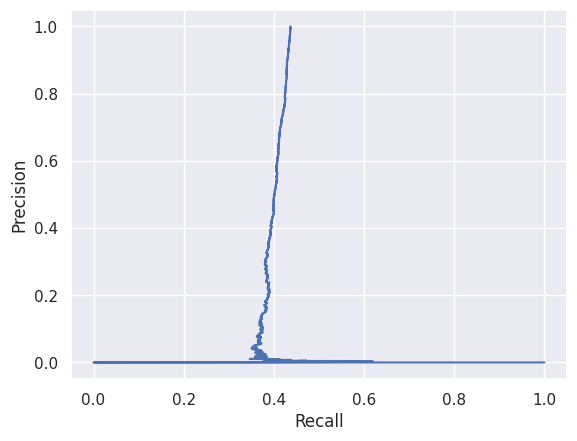

In [ ]:
draw_auprc_score(saved_model_cnn_g, X_test_dl, y_test)

The best model is : <class 'keras.src.engine.functional.Functional'>
242/242 [==============================] - 1s 4ms/step


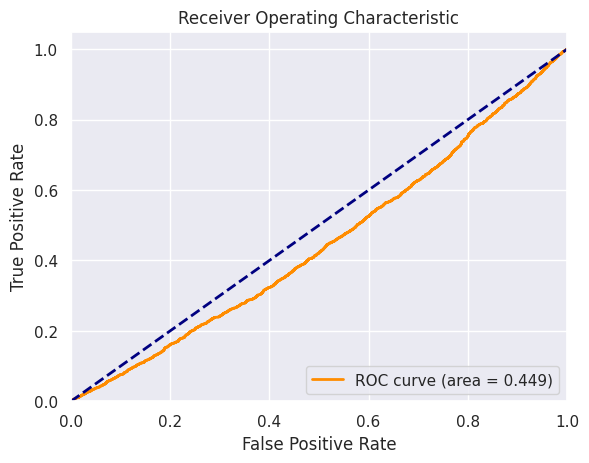

In [ ]:
draw_roc_curve(saved_model_cnn_g, X_test_dl, y_test)

### <h4> *LSTM models* </h4>

In [ ]:
lstm_model_fastText_300 = build_model_lstm_fastText(lstm_units = 64, dense_units = 512,
                              k_regularizer = 0.001, dropout_rate = 0.3,
                              recurrent_dropout = 0.0, emb_dim = 300)
lstm_fastText_history_300 = fit_network(lstm_model_fastText_300, X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_lstm_fastText"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_8 (Embedding)     (None, 100, 300)             6000300   ['input_9[0][0]']             
                                                                                                  
 spatial_dropout1d_8 (Spati  (None, 100, 300)             0         ['embedding_8[0][0]']         
 alDropout1D)                                                                                     
                                                                                                  
 lstm_3 (LSTM)               (None, 100, 64)              93440     ['spatial_dr

Average Accuracy score: 0.521923531185497
Best loss: 0.904959499835968
for epoch : 5


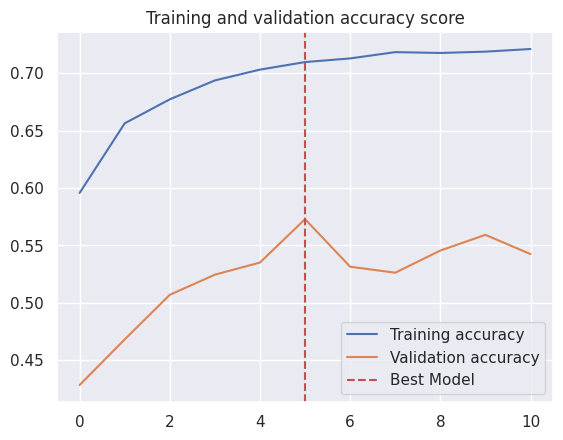

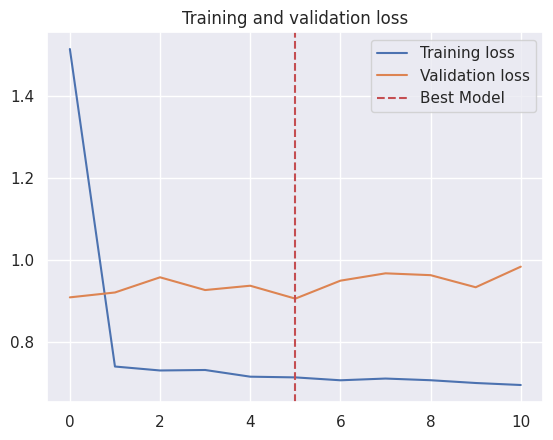

In [ ]:
plot_accuracy_loss(lstm_fastText_history_300)

In [ ]:
from keras.models import load_model
saved_model_lstm_f = load_model('model_lstm_fastText.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_lstm_f , X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_lstm_f, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

242/242 [==============================] - 1s 3ms/step
Train accuracy: 74.39%, Train loss: 0.66, Train precision: 74.52%, Train recall: 74.38%, Train f1-score: 74.35%
Test accuracy: 57.39%, Test loss: 0.91, Test precision: 56.52%, Test recall: 56.45%, Test f1-score: 56.47%


In [ ]:
get_auc_score(saved_model_lstm_f, X_test_dl, y_test)

242/242 [==============================] - 1s 4ms/step
model AUC score: 0.5711833787760601


In [ ]:
draw_confusion_matrix(saved_model_lstm_f, X_test_dl, y_test)

242/242 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      4365
           1       0.51      0.49      0.50      3379

    accuracy                           0.57      7744
   macro avg       0.57      0.56      0.56      7744
weighted avg       0.57      0.57      0.57      7744



hate  no-hate
hate     2784     1581
no-hate  1719     1660

242/242 [==============================] - 1s 4ms/step
model AUPRC score: 0.4943834512260757


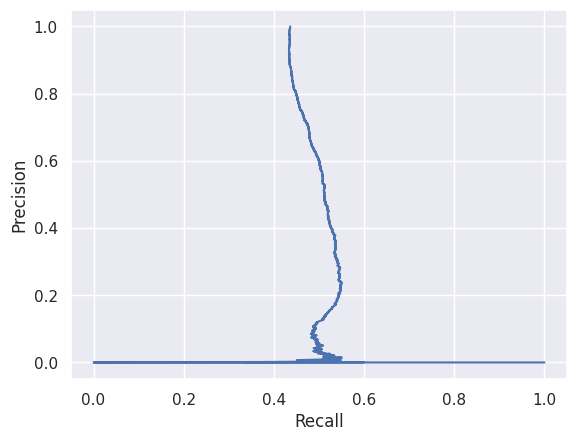

In [ ]:
draw_auprc_score(saved_model_lstm_f, X_test_dl, y_test)

The best model is : <class 'keras.src.engine.functional.Functional'>
242/242 [==============================] - 1s 4ms/step


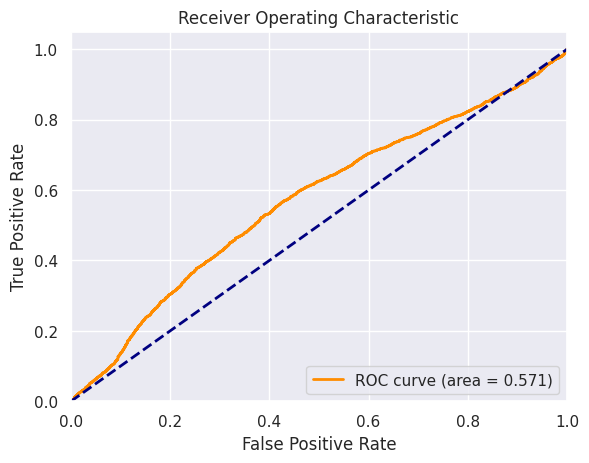

In [ ]:
draw_roc_curve(saved_model_lstm_f, X_test_dl, y_test)

In [ ]:
lstm_model_glove_300 = build_model_lstm_glove(lstm_units = 64, dense_units = 512,
                              k_regularizer = 0.001, dropout_rate = 0.3,
                              recurrent_dropout = 0.0, emb_dim = 300)
lstm_glove_history_300 = fit_network(lstm_model_glove_300, X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_lstm_glove"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_9 (Embedding)     (None, 100, 300)             6000300   ['input_10[0][0]']            
                                                                                                  
 spatial_dropout1d_9 (Spati  (None, 100, 300)             0         ['embedding_9[0][0]']         
 alDropout1D)                                                                                     
                                                                                                  
 lstm_4 (LSTM)               (None, 100, 64)              93440     ['spatial_dropo

Average Accuracy score: 0.5104322284460068
Best loss: 0.8268182277679443
for epoch : 0


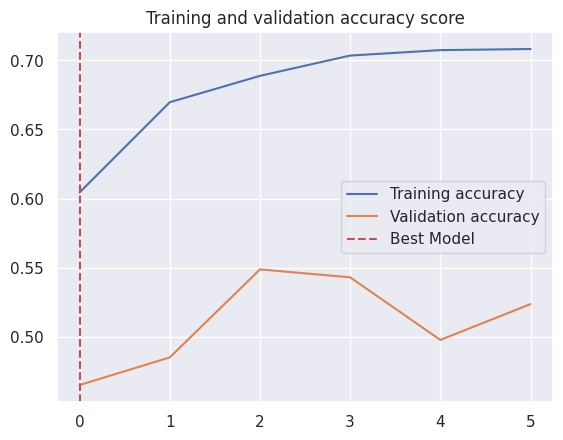

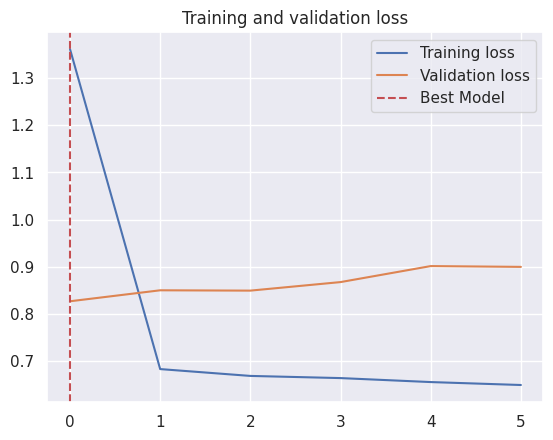

In [ ]:
plot_accuracy_loss(lstm_glove_history_300)

In [ ]:
from keras.models import load_model
saved_model_lstm_g = load_model('model_lstm_glove.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_lstm_g , X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_lstm_g, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

242/242 [==============================] - 1s 3ms/step
Train accuracy: 71.76%, Train loss: 0.64, Train precision: 71.90%, Train recall: 71.75%, Train f1-score: 71.71%
Test accuracy: 54.79%, Test loss: 0.85, Test precision: 53.94%, Test recall: 53.92%, Test f1-score: 53.92%


In [ ]:
get_auc_score(saved_model_lstm_g, X_test_dl, y_test)

242/242 [==============================] - 1s 3ms/step
model AUC score: 0.5452430906206958


In [ ]:
draw_confusion_matrix(saved_model_lstm_g, X_test_dl, y_test)

242/242 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.60      0.61      0.60      4365
           1       0.48      0.47      0.48      3379

    accuracy                           0.55      7744
   macro avg       0.54      0.54      0.54      7744
weighted avg       0.55      0.55      0.55      7744



hate  no-hate
hate     2653     1712
no-hate  1789     1590

242/242 [==============================] - 1s 3ms/step
model AUPRC score: 0.47380408120829776


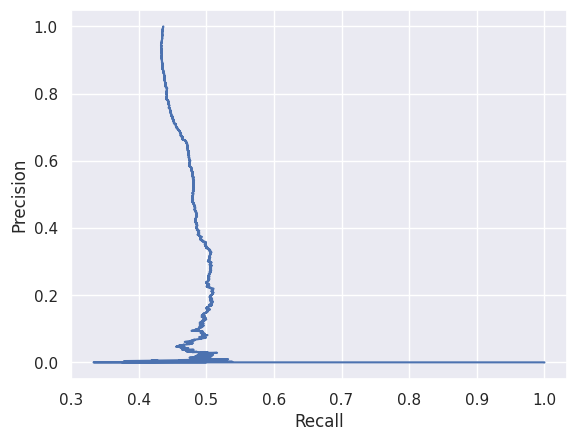

In [ ]:
draw_auprc_score(saved_model_lstm_g, X_test_dl, y_test)

The best model is : <class 'keras.src.engine.functional.Functional'>
242/242 [==============================] - 1s 3ms/step


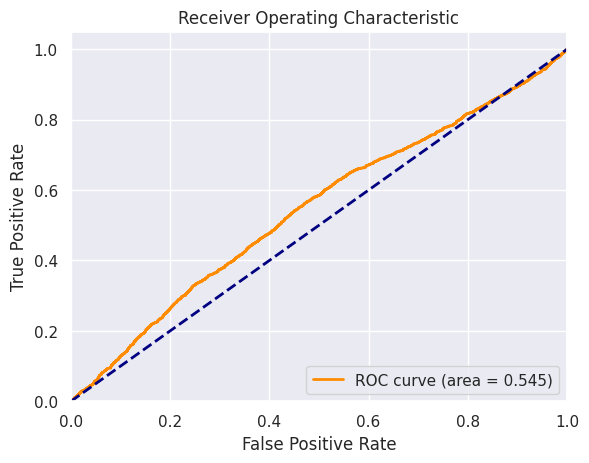

In [ ]:
draw_roc_curve(saved_model_lstm_g, X_test_dl, y_test)

### <h4> *GRU models* </h4>

In [ ]:
gru_model_fastText_300 = build_model_gru_fastText(gru_units = 64,learning_rate = 0.001,
                              k_regularizer = 0.00001, dropout_rate = 0.5,
                              recurrent_dropout = 0.0, emb_dim = 300)
gru_fastText_history_300 = fit_network(gru_model_fastText_300, X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_gru_fastText"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_10 (Embedding)    (None, 100, 300)             6000300   ['input_11[0][0]']            
                                                                                                  
 spatial_dropout1d_10 (Spat  (None, 100, 300)             0         ['embedding_10[0][0]']        
 ialDropout1D)                                                                                    
                                                                                                  
 gru (GRU)                   (None, 100, 64)              70272     ['spatial_dro

Average Accuracy score: 0.5164868056774139
Best loss: 0.8437986969947815
for epoch : 4


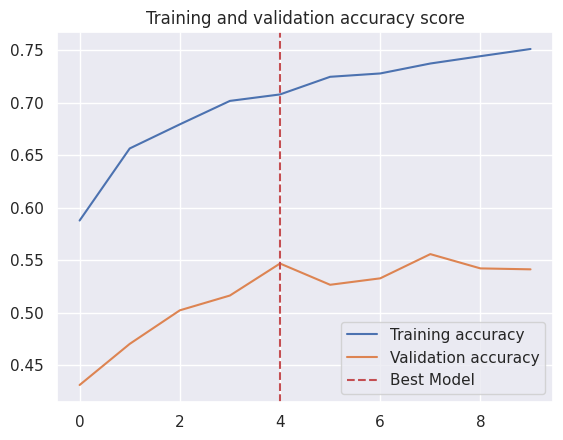

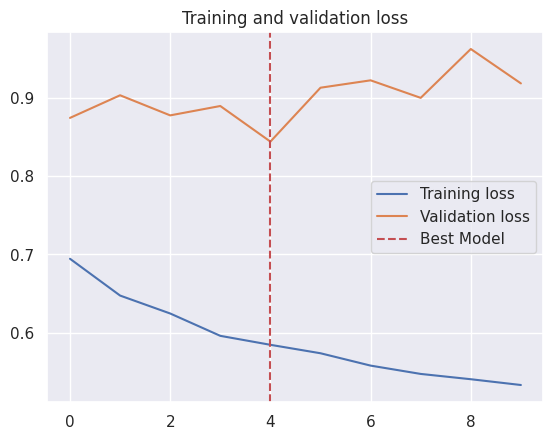

In [ ]:
plot_accuracy_loss(gru_fastText_history_300)

In [ ]:
from keras.models import load_model
saved_model_gru_f = load_model('model_gru_fastText.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_gru_f , X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_gru_f, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

242/242 [==============================] - 1s 3ms/step
Train accuracy: 78.87%, Train loss: 0.48, Train precision: 79.09%, Train recall: 78.86%, Train f1-score: 78.83%
Test accuracy: 55.58%, Test loss: 0.90, Test precision: 54.47%, Test recall: 54.35%, Test f1-score: 54.33%


In [ ]:
get_auc_score(saved_model_gru_f, X_test_dl, y_test)

242/242 [==============================] - 1s 4ms/step
model AUC score: 0.5499227931293174


In [ ]:
draw_confusion_matrix(saved_model_gru_f, X_test_dl, y_test)

242/242 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.60      0.64      0.62      4365
           1       0.49      0.45      0.47      3379

    accuracy                           0.56      7744
   macro avg       0.54      0.54      0.54      7744
weighted avg       0.55      0.56      0.55      7744



hate  no-hate
hate     2793     1572
no-hate  1868     1511

242/242 [==============================] - 1s 4ms/step
model AUPRC score: 0.4684520269138176


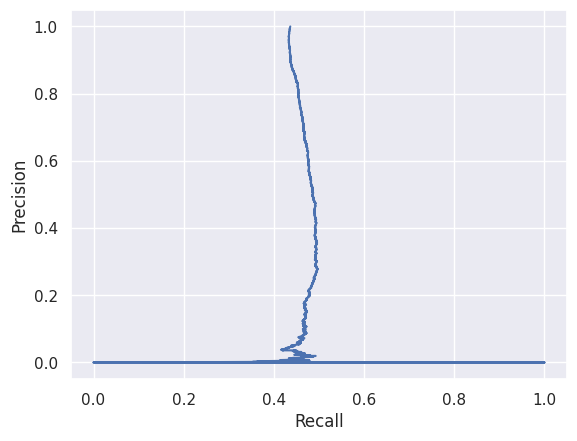

In [ ]:
draw_auprc_score(saved_model_gru_f, X_test_dl, y_test)

The best model is : <class 'keras.src.engine.functional.Functional'>
242/242 [==============================] - 1s 4ms/step


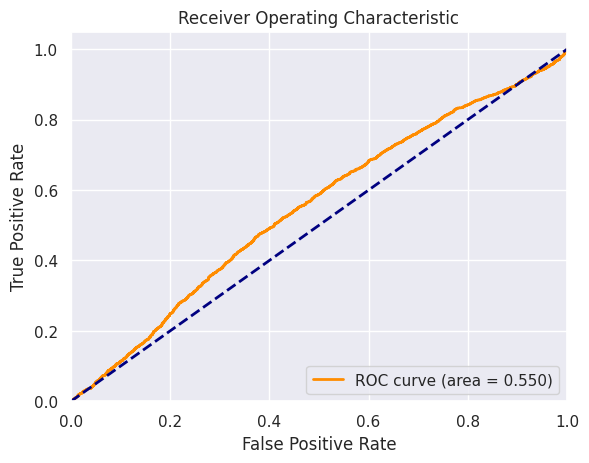

In [ ]:
draw_roc_curve(saved_model_gru_f, X_test_dl, y_test)

In [ ]:
gru_model_glove_300 = build_model_gru_glove(gru_units = 64 ,learning_rate = 0.001,
                              k_regularizer = 0.00001, dropout_rate = 0.5,
                              recurrent_dropout = 0.0, emb_dim = 300)
gru_glove_history_300 = fit_network(gru_model_glove_300, X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_gru_glove"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_11 (Embedding)    (None, 100, 300)             6000300   ['input_12[0][0]']            
                                                                                                  
 spatial_dropout1d_11 (Spat  (None, 100, 300)             0         ['embedding_11[0][0]']        
 ialDropout1D)                                                                                    
                                                                                                  
 gru_1 (GRU)                 (None, 100, 64)              70272     ['spatial_dropou

Average Accuracy score: 0.533224493265152
Best loss: 0.7885488271713257
for epoch : 0


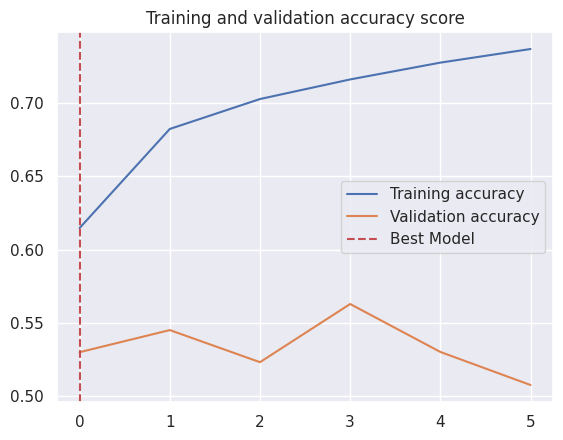

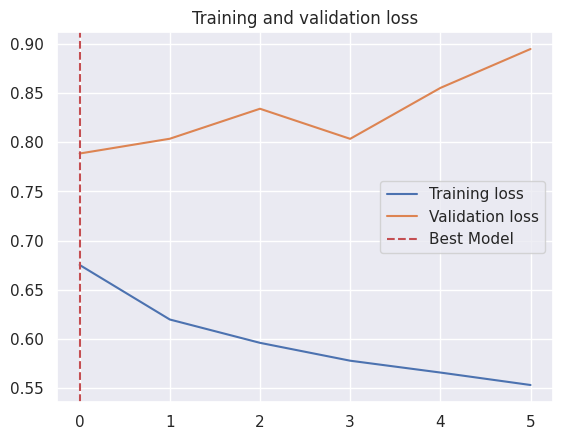

In [ ]:
plot_accuracy_loss(gru_glove_history_300)

In [ ]:
from keras.models import load_model
saved_model_gru_g = load_model('model_gru_glove.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_gru_g , X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_gru_g, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

242/242 [==============================] - 1s 3ms/step
Train accuracy: 76.01%, Train loss: 0.52, Train precision: 76.07%, Train recall: 76.00%, Train f1-score: 75.99%
Test accuracy: 55.73%, Test loss: 0.81, Test precision: 54.88%, Test recall: 54.84%, Test f1-score: 54.85%


In [ ]:
get_auc_score(saved_model_gru_g, X_test_dl, y_test)

242/242 [==============================] - 1s 4ms/step
model AUC score: 0.5542986853305589


In [ ]:
draw_confusion_matrix(saved_model_gru_g, X_test_dl, y_test)

242/242 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.60      0.62      0.61      4365
           1       0.49      0.48      0.49      3379

    accuracy                           0.56      7744
   macro avg       0.55      0.55      0.55      7744
weighted avg       0.56      0.56      0.56      7744



hate  no-hate
hate     2700     1665
no-hate  1763     1616

242/242 [==============================] - 1s 3ms/step
model AUPRC score: 0.46560369069952867


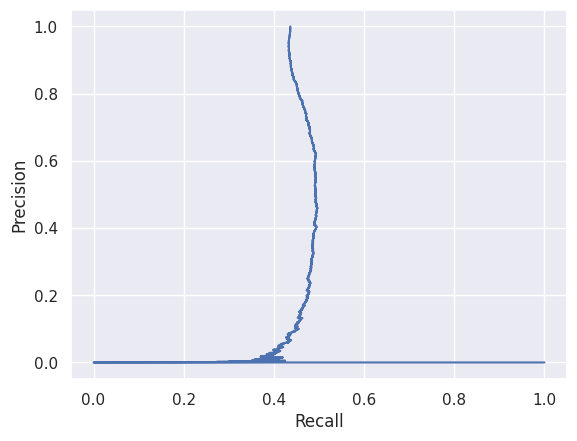

In [ ]:
draw_auprc_score(saved_model_gru_g, X_test_dl, y_test)

The best model is : <class 'keras.src.engine.functional.Functional'>
242/242 [==============================] - 1s 3ms/step


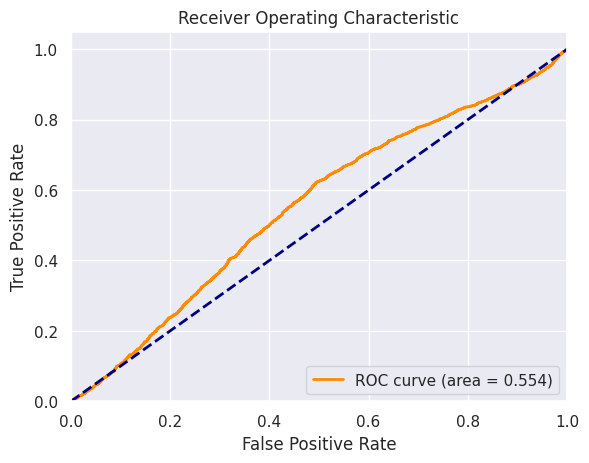

In [ ]:
draw_roc_curve(saved_model_gru_g, X_test_dl, y_test)

### <h4> *Bi-GRU models* </h4>

In [ ]:
bi_gru_model_fastText = build_model_bi_gru_fastText(gru_units = 256, k_regularizer = 0.00001,learning_rate = 0.001,
                                dropout_rate = 0.5, recurrent_dropout= 0.0, emb_dim = 300)
bi_gru_model_fastText_history = fit_network(bi_gru_model_fastText, X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_bigru_fastText"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_12 (Embedding)    (None, 100, 300)             6000300   ['input_13[0][0]']            
                                                                                                  
 spatial_dropout1d_12 (Spat  (None, 100, 300)             0         ['embedding_12[0][0]']        
 ialDropout1D)                                                                                    
                                                                                                  
 bidirectional (Bidirection  (None, 100, 512)             857088    ['spatial_d

Average Accuracy score: 0.5039263003402286
Best loss: 0.9360984563827515
for epoch : 3


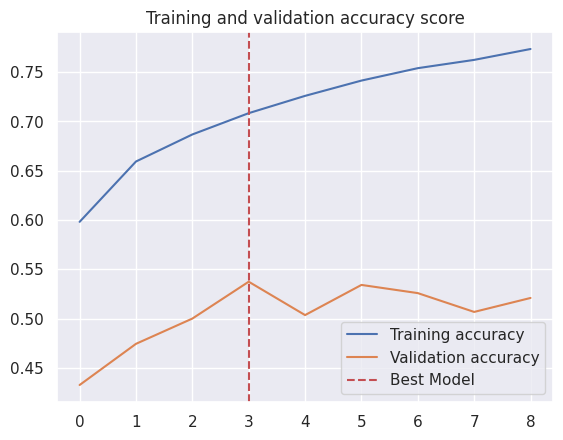

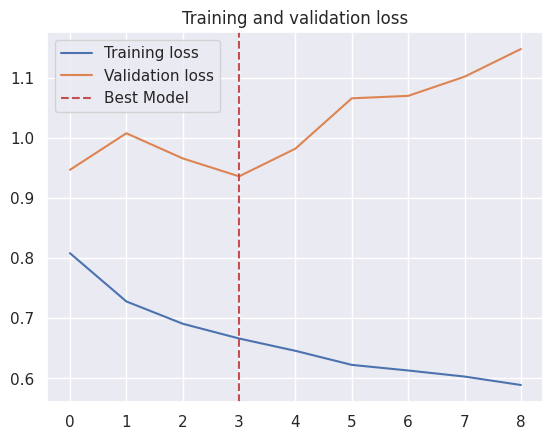

In [ ]:
plot_accuracy_loss(bi_gru_model_fastText_history)

In [ ]:
from keras.models import load_model
saved_model_bi_gru_f = load_model('model_bigru_fastText.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_bi_gru_f , X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_bi_gru_f, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

242/242 [==============================] - 1s 6ms/step
Train accuracy: 76.50%, Train loss: 0.59, Train precision: 76.67%, Train recall: 76.49%, Train f1-score: 76.45%
Test accuracy: 53.62%, Test loss: 0.94, Test precision: 53.13%, Test recall: 53.16%, Test f1-score: 53.11%


In [ ]:
get_auc_score(saved_model_bi_gru_f, X_test_dl, y_test)

242/242 [==============================] - 2s 7ms/step
model AUC score: 0.5281023517331459


In [ ]:
draw_confusion_matrix(saved_model_bi_gru_f, X_test_dl, y_test)

242/242 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.59      0.57      0.58      4365
           1       0.47      0.50      0.48      3379

    accuracy                           0.54      7744
   macro avg       0.53      0.53      0.53      7744
weighted avg       0.54      0.54      0.54      7744



hate  no-hate
hate     2477     1888
no-hate  1704     1675

242/242 [==============================] - 2s 7ms/step
model AUPRC score: 0.4602418896606718


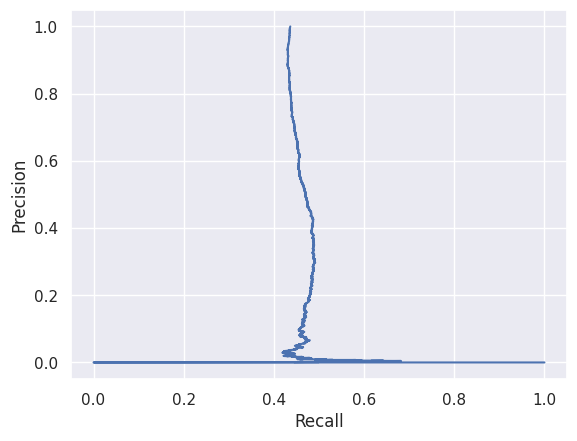

In [ ]:
draw_auprc_score(saved_model_bi_gru_f, X_test_dl, y_test)

The best model is : <class 'keras.src.engine.functional.Functional'>
242/242 [==============================] - 2s 7ms/step


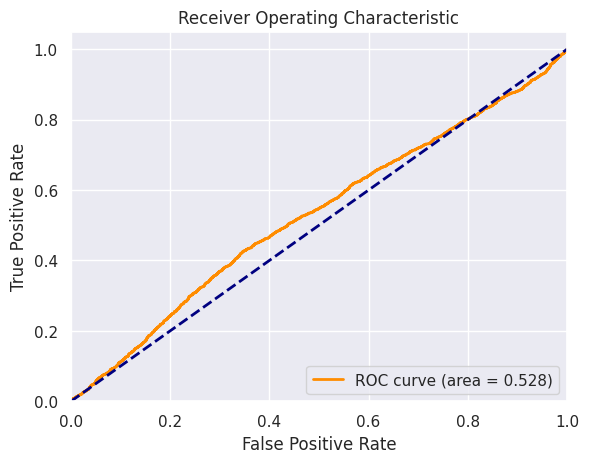

In [ ]:
draw_roc_curve(saved_model_bi_gru_f, X_test_dl, y_test)

In [ ]:
bi_gru_model_glove_300 = build_model_bi_gru_glove(gru_units = 64, k_regularizer = 0.00001,learning_rate= 0.001,
                                dropout_rate = 0.4, recurrent_dropout= 0.0, emb_dim = 300)
bi_gru_model_glove_history_300 = fit_network(bi_gru_model_glove_300 , X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_bigru_glove"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_13 (Embedding)    (None, 100, 300)             6000300   ['input_14[0][0]']            
                                                                                                  
 spatial_dropout1d_13 (Spat  (None, 100, 300)             0         ['embedding_13[0][0]']        
 ialDropout1D)                                                                                    
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 100, 128)             140544    ['spatial_drop

Average Accuracy score: 0.5307709351181984
Best loss: 0.813066303730011
for epoch : 2


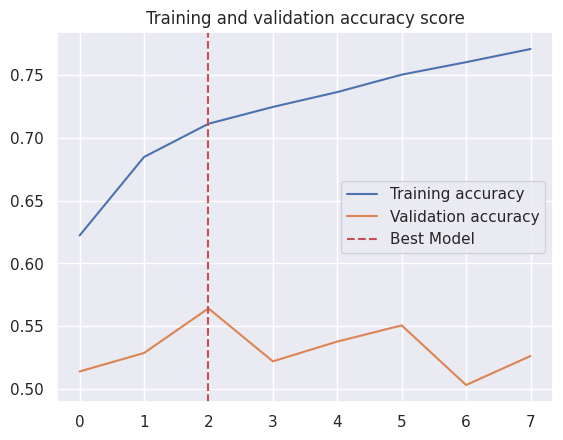

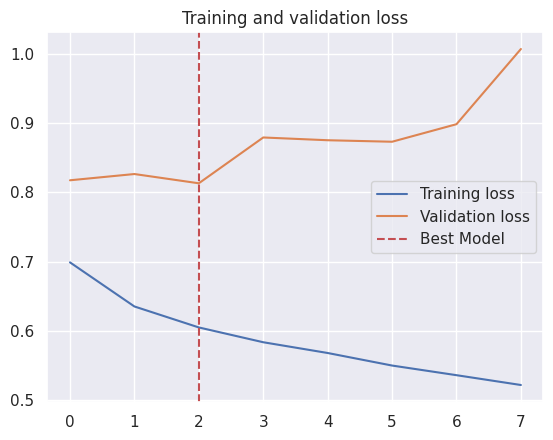

In [ ]:
plot_accuracy_loss(bi_gru_model_glove_history_300)

In [ ]:
from keras.models import load_model
saved_model_bi_gru_g = load_model('model_bigru_glove.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_bi_gru_g , X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_bi_gru_g, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

242/242 [==============================] - 1s 4ms/step
Train accuracy: 75.35%, Train loss: 0.55, Train precision: 75.67%, Train recall: 75.34%, Train f1-score: 75.27%
Test accuracy: 56.46%, Test loss: 0.81, Test precision: 55.34%, Test recall: 55.17%, Test f1-score: 55.15%


In [ ]:
get_auc_score(saved_model_bi_gru_g, X_test_dl, y_test)

242/242 [==============================] - 1s 5ms/step
model AUC score: 0.5571575938847413


In [ ]:
draw_confusion_matrix(saved_model_bi_gru_g, X_test_dl, y_test)

242/242 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.61      0.65      0.63      4365
           1       0.50      0.45      0.47      3379

    accuracy                           0.56      7744
   macro avg       0.55      0.55      0.55      7744
weighted avg       0.56      0.56      0.56      7744



hate  no-hate
hate     2848     1517
no-hate  1855     1524

242/242 [==============================] - 1s 5ms/step
model AUPRC score: 0.47599335568712386


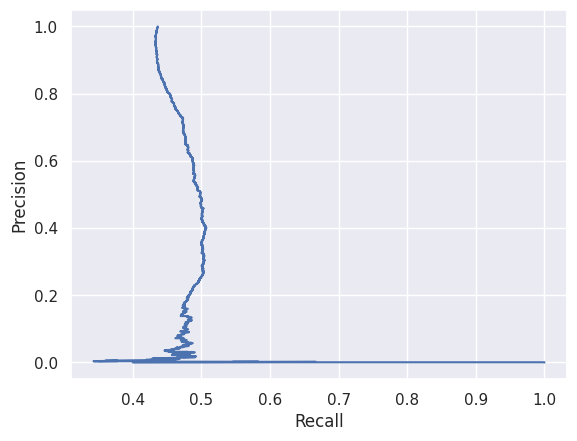

In [ ]:
draw_auprc_score(saved_model_bi_gru_g, X_test_dl, y_test)

The best model is : <class 'keras.src.engine.functional.Functional'>
242/242 [==============================] - 1s 5ms/step


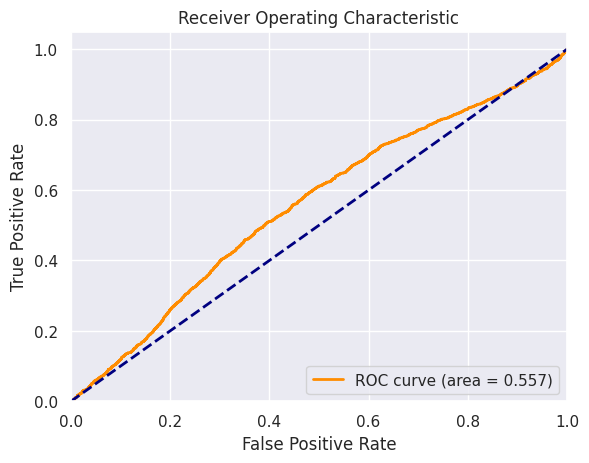

In [ ]:
draw_roc_curve(saved_model_bi_gru_g, X_test_dl, y_test)

### <h4> *Bi-GRU + CNN models* </h4>

In [ ]:
bi_gru_cnn_model_fastText_ = build_model_bi_gru_cnn_fastText(filters = 16, kernel_size=6,
                                              dropout_rate= 0.5, dense_units = 64,
                                              gru_units = 256, k_regularizer = 0.00001,
                                              learning_rate= 0.003, recurrent_dropout= 0.0, emb_dim = 300)
bi_gru_cnn_model_fastText_history_1 = fit_network(bi_gru_cnn_model_fastText_ , X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_bi_gru_cnn_fastText"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_53 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_52 (Embedding)    (None, 100, 300)             6000300   ['input_53[0][0]']            
                                                                                                  
 spatial_dropout1d_60 (Spat  (None, 100, 300)             0         ['embedding_52[0][0]']        
 ialDropout1D)                                                                                    
                                                                                                  
 conv1d_172 (Conv1D)         (None, 95, 16)               28816     ['spat

Average Accuracy score: 0.5544019242127737
Best loss: 0.8610203862190247
for epoch : 0


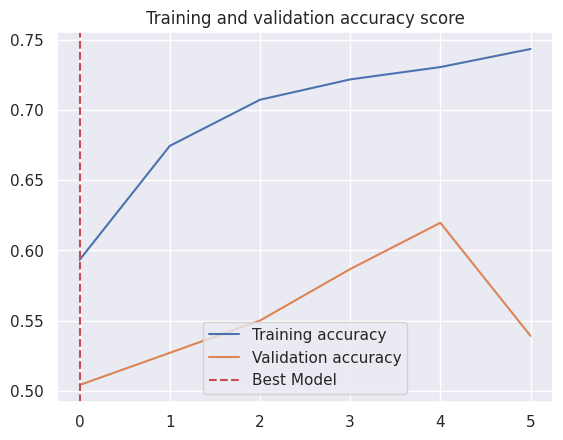

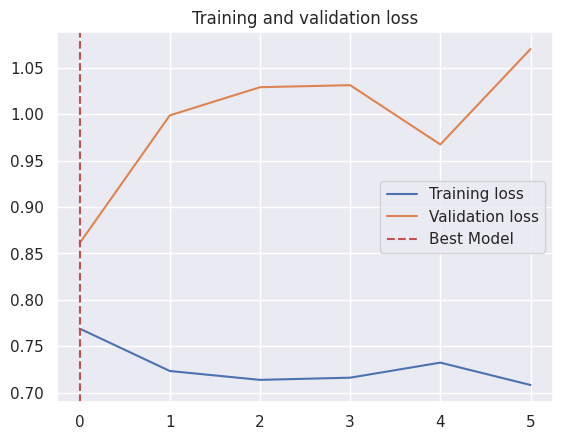

In [ ]:
plot_accuracy_loss(bi_gru_cnn_model_fastText_history_1)

In [ ]:
from keras.models import load_model
saved_model_bi_gru_cnn_f = load_model('model_bi_gru_cnn_fastText.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_bi_gru_cnn_f , X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_bi_gru_cnn_f, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

202/202 [==============================] - 1s 7ms/step
Train accuracy: 78.90%, Train loss: 0.62, Train precision: 79.14%, Train recall: 78.88%, Train f1-score: 78.85%
Test accuracy: 62.13%, Test loss: 0.98, Test precision: 61.54%, Test recall: 61.29%, Test f1-score: 61.33%


In [ ]:
# draw_roc_curve(saved_model, X_test_dl):

In [ ]:
get_auc_score(saved_model_bi_gru_cnn_f, X_test_dl, y_test)

202/202 [==============================] - 1s 7ms/step
model AUC score: 0.6054261750753588


In [ ]:
draw_confusion_matrix(saved_model_bi_gru_cnn_f, X_test_dl, y_test)

202/202 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.65      0.69      0.67      3575
           1       0.58      0.54      0.56      2879

    accuracy                           0.62      6454
   macro avg       0.62      0.61      0.61      6454
weighted avg       0.62      0.62      0.62      6454



hate  no-hate
hate     2469     1106
no-hate  1338     1541

202/202 [==============================] - 1s 7ms/step
model AUPRC score: 0.5377450968948192


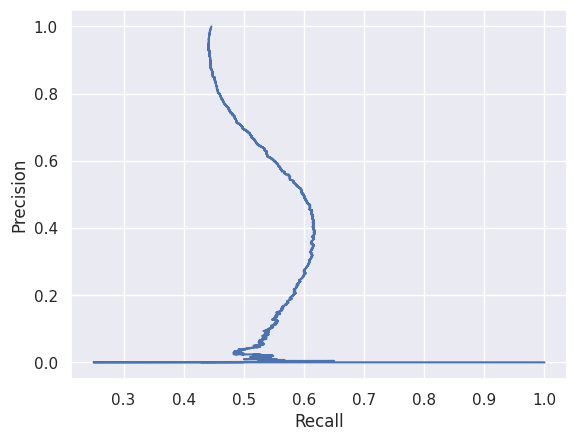

In [ ]:
draw_auprc_score(saved_model_bi_gru_cnn_f, X_test_dl, y_test)

The best model is : <class 'keras.src.engine.functional.Functional'>
202/202 [==============================] - 1s 7ms/step


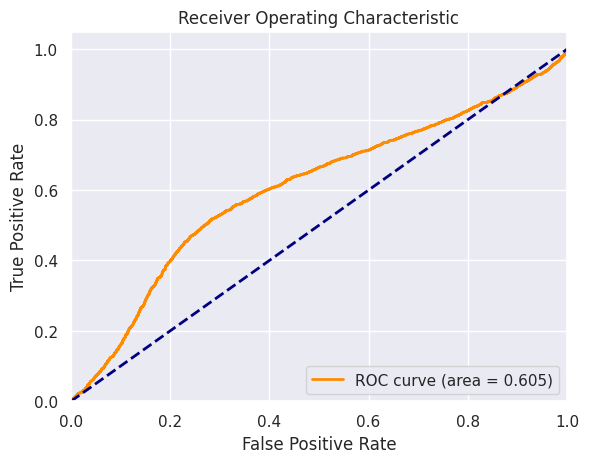

In [ ]:
draw_roc_curve(saved_model_bi_gru_cnn_f, X_test_dl, y_test)

In [ ]:
bi_gru_cnn_model_glove_300 = build_model_bi_gru_cnn_glove(filters = 8, kernel_size=6,
                                              dropout_rate = 0.5, dense_units= 64,
                                              gru_units = 256, k_regularizer = 0.00001,
                                              learning_rate= 0.003, recurrent_dropout= 0.0, emb_dim = 300)
bi_gru_cnn_model_glove_history_300 = fit_network(bi_gru_cnn_model_glove_300 , X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_bi_gru_cnn_glove"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_65 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_64 (Embedding)    (None, 100, 300)             6000300   ['input_65[0][0]']            
                                                                                                  
 spatial_dropout1d_72 (Spat  (None, 100, 300)             0         ['embedding_64[0][0]']        
 ialDropout1D)                                                                                    
                                                                                                  
 conv1d_220 (Conv1D)         (None, 95, 8)                14408     ['spatial

Average Accuracy score: 0.5281953364610672
Best loss: 0.79520183801651
for epoch : 0


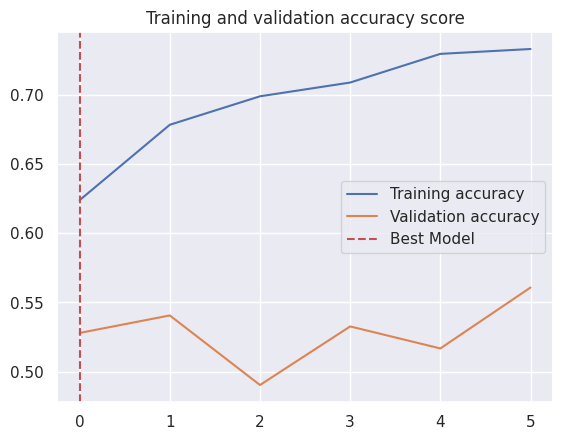

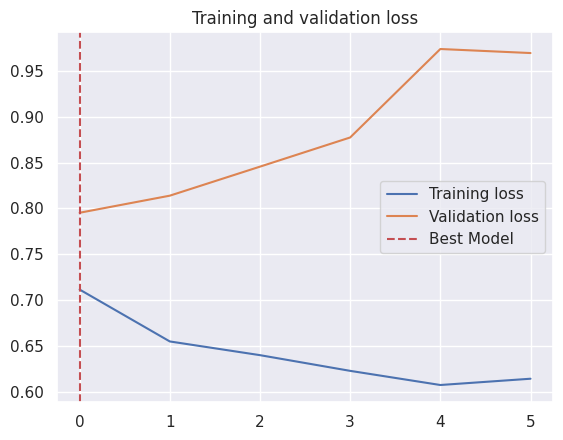

In [ ]:
plot_accuracy_loss(bi_gru_cnn_model_glove_history_300)

In [ ]:
from keras.models import load_model
saved_model_bi_gru_cnn_g = load_model('model_bi_gru_cnn_glove.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_bi_gru_cnn_g , X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_bi_gru_cnn_g, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

202/202 [==============================] - 1s 7ms/step
Train accuracy: 78.39%, Train loss: 0.52, Train precision: 78.73%, Train recall: 78.37%, Train f1-score: 78.32%
Test accuracy: 55.75%, Test loss: 0.98, Test precision: 54.77%, Test recall: 54.59%, Test f1-score: 54.48%


In [ ]:
get_auc_score(saved_model_bi_gru_cnn_g, X_test_dl, y_test)

202/202 [==============================] - 1s 7ms/step
model AUC score: 0.5392321537441371


In [ ]:
draw_confusion_matrix(saved_model_bi_gru_cnn_g, X_test_dl, y_test)

202/202 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.59      0.65      0.62      3575
           1       0.50      0.44      0.47      2879

    accuracy                           0.56      6454
   macro avg       0.55      0.55      0.54      6454
weighted avg       0.55      0.56      0.55      6454



hate  no-hate
hate     2337     1238
no-hate  1618     1261

202/202 [==============================] - 1s 7ms/step
model AUPRC score: 0.47051726507901936


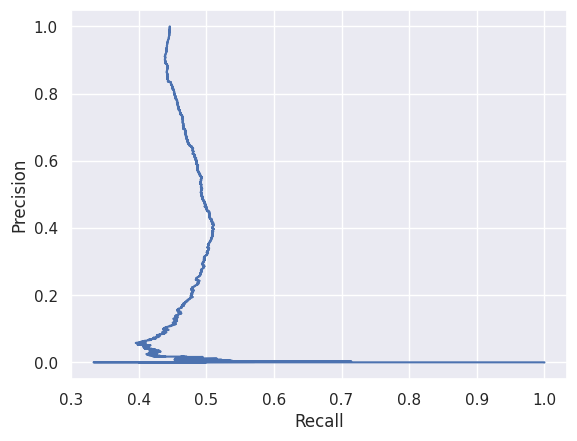

In [ ]:
draw_auprc_score(saved_model_bi_gru_cnn_g, X_test_dl, y_test)

In [ ]:
draw_roc_curve(saved_model_bi_gru_cnn_g, X_test_dl, y_test)

### <h4> *Bi-GRU + LSTM models* </h4>

In [ ]:
bi_gru_lstm_model_fastText_ = build_model_bi_gru_lstm_fastText(gru_units = 128, lstm_units = 64, dense_units = 512 , k_regularizer = 0.00001, learning_rate = 0.001,
                                dropout_rate = 0.5, recurrent_dropout= 0.0, emb_dim = 300)
bi_gru_lstm_model_fastText_history = fit_network(bi_gru_lstm_model_fastText_, X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_bigru_lstm_fastText"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_38 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_37 (Embedding)    (None, 100, 300)             6000300   ['input_38[0][0]']            
                                                                                                  
 spatial_dropout1d_45 (Spat  (None, 100, 300)             0         ['embedding_37[0][0]']        
 ialDropout1D)                                                                                    
                                                                                                  
 bidirectional_29 (Bidirect  (None, 100, 256)             330240    ['spat

Average Accuracy score: 0.7086876134077708
Best loss: 0.6460126638412476
for epoch : 6


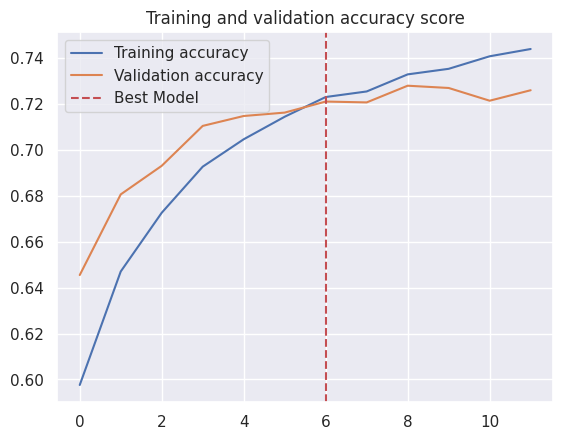

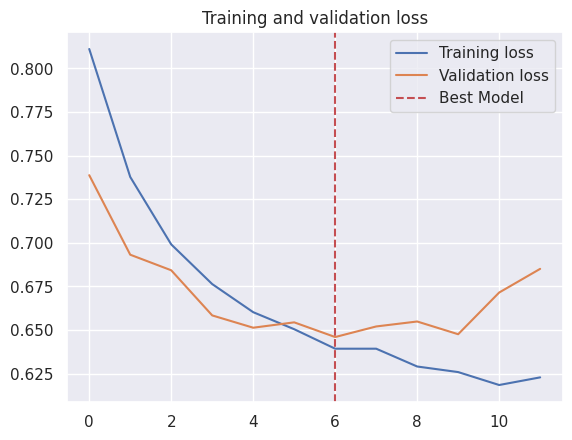

In [ ]:
plot_accuracy_loss(bi_gru_lstm_model_fastText_history)

In [ ]:
from keras.models import load_model
saved_model_bi_gru_lstm_f = load_model('model_bigru_lstm_fastText.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_bi_gru_lstm_f , X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_bi_gru_lstm_f, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

305/305 [==============================] - 2s 7ms/step
Train accuracy: 77.47%, Train loss: 0.55, Train precision: 78.39%, Train recall: 76.68%, Train f1-score: 76.85%
Test accuracy: 73.16%, Test loss: 0.64, Test precision: 73.49%, Test recall: 72.27%, Test f1-score: 72.41%


In [ ]:
get_auc_score(saved_model_bi_gru_lstm_f, X_test_dl, y_test)

305/305 [==============================] - 2s 8ms/step
model AUC score: 0.815333300154528


In [ ]:
draw_confusion_matrix(saved_model_bi_gru_lstm_f, X_test_dl, y_test)

305/305 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.72      0.82      0.77      5291
           1       0.75      0.62      0.68      4447

    accuracy                           0.73      9738
   macro avg       0.73      0.72      0.72      9738
weighted avg       0.73      0.73      0.73      9738



hate  no-hate
hate     4365      926
no-hate  1688     2759

305/305 [==============================] - 2s 8ms/step
model AUPRC score: 0.7941068011838832


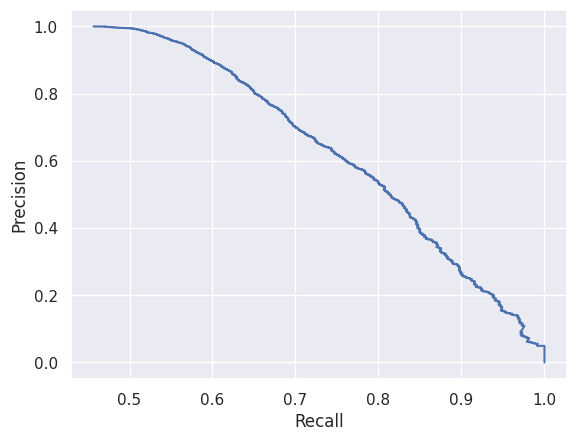

In [ ]:
draw_auprc_score(saved_model_bi_gru_lstm_f, X_test_dl, y_test)

In [ ]:
bi_gru_lstm_model_glove_ = build_model_bi_gru_lstm_glove(gru_units = 32, lstm_units = 32, dense_units = 32 , k_regularizer = 0.00001, learning_rate = 0.001,
                                dropout_rate = 0.5, recurrent_dropout= 0.0, emb_dim = 300)
bi_gru_lstm_model_glove_history = fit_network(bi_gru_lstm_model_glove_, X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_bigru_lstm_glove"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_22 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_21 (Embedding)    (None, 100, 300)             6000300   ['input_22[0][0]']            
                                                                                                  
 spatial_dropout1d_18 (Spat  (None, 100, 300)             0         ['embedding_21[0][0]']        
 ialDropout1D)                                                                                    
                                                                                                  
 bidirectional_7 (Bidirecti  (None, 100, 64)              64128     ['spatial

Average Accuracy score: 0.704161012172699
Best loss: 0.5896218419075012
for epoch : 9


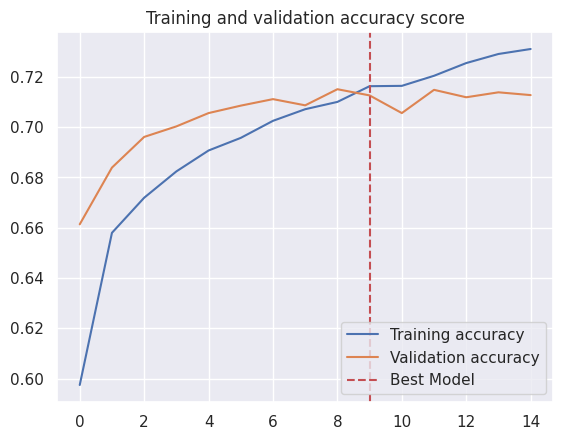

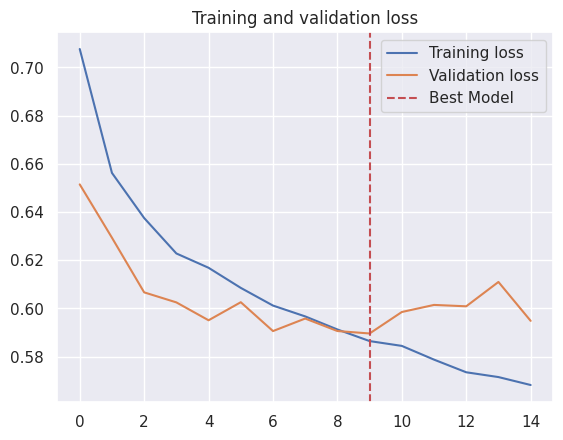

In [ ]:
plot_accuracy_loss(bi_gru_lstm_model_glove_history)

In [ ]:
from keras.models import load_model
saved_model_bi_gru_lstm_g = load_model('model_bigru_lstm_glove.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_bi_gru_lstm_g , X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_bi_gru_lstm_g, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

305/305 [==============================] - 2s 6ms/step
Train accuracy: 75.45%, Train loss: 0.53, Train precision: 75.68%, Train recall: 74.89%, Train f1-score: 75.02%
Test accuracy: 72.25%, Test loss: 0.57, Test precision: 72.19%, Test recall: 71.63%, Test f1-score: 71.75%


In [ ]:
draw_confusion_matrix(saved_model_bi_gru_lstm_g, X_test_dl, y_test)

305/305 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.71      0.82      0.76      5291
           1       0.74      0.61      0.67      4447

    accuracy                           0.72      9738
   macro avg       0.73      0.72      0.72      9738
weighted avg       0.73      0.72      0.72      9738



hate  no-hate
hate     4337      954
no-hate  1730     2717

In [ ]:
get_auc_score(saved_model_bi_gru_lstm_g, X_test_dl, y_test)

305/305 [==============================] - 2s 7ms/step
model AUC score: 0.8120282193814913


### <h4> *RoBERTA + BiGRU models* </h4>

In [ ]:
# roberta_model = build_model_roberta( dropout_rate = 0.5, dense_units = 64, gru_units = 64, k_regularizer = 0.00001, recurrent_dropout = 0.0, emb_dim = 300)
# roberta_history = fit_network(roberta_model, X_train_roberta, y_train, X_dev_roberta, y_dev)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'roberta.embeddings.position_ids', 'lm_head.dense.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weight

Model: "model_roberta"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 100)]                0         []                            
 )                                                                                                
                                                                                                  
 input_mask (InputLayer)     [(None, 100)]                0         []                            
                                                                                                  
 input_type_ids (InputLayer  [(None, 100)]                0         []                            
 )                                                                                                
                                                                                      

5681/5681 [==============================] - ETA: 0s - loss: 0.7439 - accuracy: 0.5311 - precision: 0.4785 - recall: 0.1396
Epoch 1: val_accuracy improved from -inf to 0.53986, saving model to model_roberta.keras


/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


5681/5681 [==============================] - 888s 148ms/step - loss: 0.7439 - accuracy: 0.5311 - precision: 0.4785 - recall: 0.1396 - val_loss: 0.6989 - val_accuracy: 0.5399 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
5681/5681 [==============================] - ETA: 0s - loss: 0.7001 - accuracy: 0.5336 - precision: 0.4637 - recall: 0.0449
Epoch 2: val_accuracy did not improve from 0.53986
5681/5681 [==============================] - 816s 144ms/step - loss: 0.7001 - accuracy: 0.5336 - precision: 0.4637 - recall: 0.0449 - val_loss: 0.6994 - val_accuracy: 0.5399 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
 358/5681 [>.............................] - ETA: 11:20 - loss: 0.6978 - accuracy: 0.5489 - precision: 0.2500 - recall: 0.0016

KeyboardInterrupt: 

In [ ]:
plot_accuracy_loss(roberta_history)

In [ ]:
from keras.models import load_model
saved_model_roberta_bi_gru_ = load_model('model_roberta.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_roberta_bi_gru_ , X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_roberta_bi_gru_, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss, test_precision*100, test_recall*100, test_f1_score*100))

In [ ]:
draw_roc_curve(roberta_model, X_test_roberta)

In [ ]:
draw_confusion_matrix(roberta_model, X_test_roberta, y_test)

### <h4> *Facebook NLI Model* </h4>

In [ ]:
# nli_model = build_model_bart(filters = 64, kernel_size=6,
#                                               dropout_rate= 0.5, dense_units= 64,
#                                               gru_units = 512, k_regularizer = 0.00001,
#                                               learning_rate= 0.003, recurrent_dropout= 0.0, emb_dim = 300)
# roberta_history = fit_network(roberta_model, X_train_facebook_bart, y_train, X_dev_facebook_bart, y_dev)

## <h3> *Training on original data* </h3>

### <h4> *CNN models* </h4>

In [ ]:
# cnn_model_ = build_model_cnn(filters = 256, kernel_size = 6, dropout_rate = 0.5,
#                              dense_units = 256, emb_dim = 100)
# cnn_history = fit_network(cnn_model_, X_train_dl, y_train, X_dev_dl, y_dev)

In [ ]:
# plot_accuracy_loss(cnn_history)

In [ ]:
# cnn_model_.save('cnn_model.keras')

In [ ]:
cnn_model_fastText_o = build_model_cnn_fastText(filters = 256, kernel_size=6,
                                              dropout_rate= 0.5,
                                              dense_units= 256, emb_dim = 300)
cnn_model_fastText_history_o = fit_network(cnn_model_fastText_o,
                                          X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_cnn_fastText"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_7 (Embedding)     (None, 100, 300)             6000300   ['input_8[0][0]']             
                                                                                                  
 spatial_dropout1d_7 (Spati  (None, 100, 300)             0         ['embedding_7[0][0]']         
 alDropout1D)                                                                                     
                                                                                                  
 conv1d_28 (Conv1D)          (None, 95, 256)              461056    ['spatial_dro

Average Accuracy score: 0.5042102187871933
Best loss: 0.7207494974136353
for epoch : 0


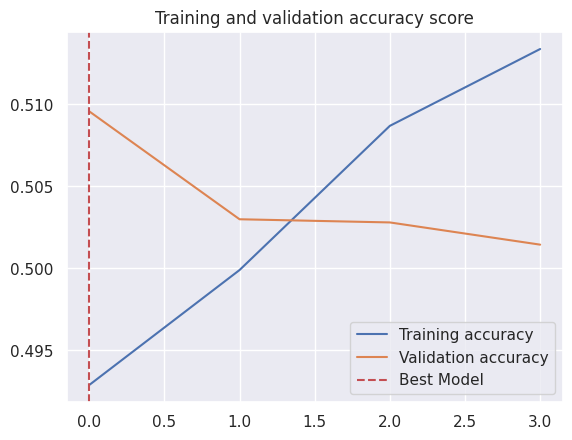

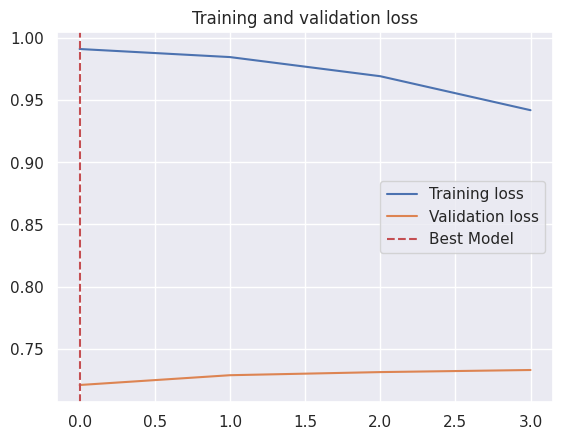

In [ ]:
plot_accuracy_loss(cnn_model_fastText_history_o)

In [ ]:
from keras.models import load_model
saved_model_cnn_fastText = load_model('model_cnn_fastText.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_cnn_fastText, X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_cnn_fastText, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f%%, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss*100, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f%%, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss*100, test_precision*100, test_recall*100, test_f1_score*100))

139/139 [==============================] - 0s 2ms/step
Train accuracy: 49.05%, Train loss: 71.96%, Train precision: 48.16%, Train recall: 48.17%, Train f1-score: 48.16%
Test accuracy: 51.46%, Test loss: 72.05%, Test precision: 51.62%, Test recall: 51.52%, Test f1-score: 50.76%


In [ ]:
# draw_roc_curve(saved_model_cnn_fastText, X_test_dl)

139/139 [==============================] - 0s 3ms/step
model AUPRC score: 0.514241739014581


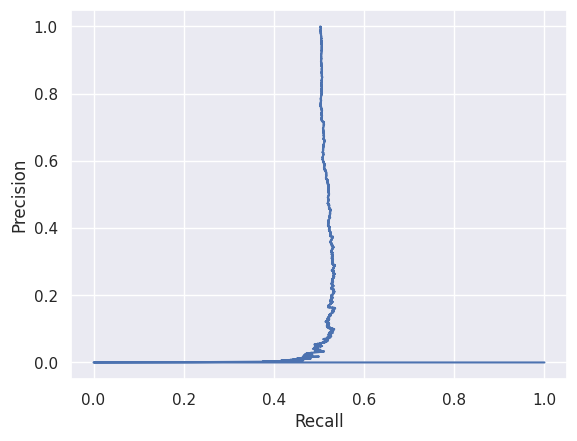

In [ ]:
draw_auprc_score(saved_model_cnn_fastText, X_test_dl, y_test) # AUC PRC score

In [ ]:
get_auc_score(saved_model_cnn_fastText, X_test_dl, y_test) # AUC ROC score

139/139 [==============================] - 0s 3ms/step
model AUC score: 0.5182626766620703


In [ ]:
draw_confusion_matrix(saved_model_cnn_fastText, X_test_dl, y_test)

139/139 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.51      0.64      0.57      2202
           1       0.52      0.39      0.45      2227

    accuracy                           0.51      4429
   macro avg       0.52      0.52      0.51      4429
weighted avg       0.52      0.51      0.51      4429



hate  no-hate
hate     1402      800
no-hate  1350      877

In [ ]:
cnn_model_glove_o = build_model_cnn_glove(filters = 256, kernel_size=6,
                                              dropout_rate= 0.5,
                                              dense_units= 256, emb_dim = 300)
cnn_model_glove_history_o = fit_network(cnn_model_glove_o,
                                          X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_cnn_glove"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_8 (Embedding)     (None, 100, 300)             6000300   ['input_9[0][0]']             
                                                                                                  
 spatial_dropout1d_8 (Spati  (None, 100, 300)             0         ['embedding_8[0][0]']         
 alDropout1D)                                                                                     
                                                                                                  
 conv1d_32 (Conv1D)          (None, 95, 256)              461056    ['spatial_dropou

Average Accuracy score: 0.5024196624755859
Best loss: 0.6976608037948608
for epoch : 1


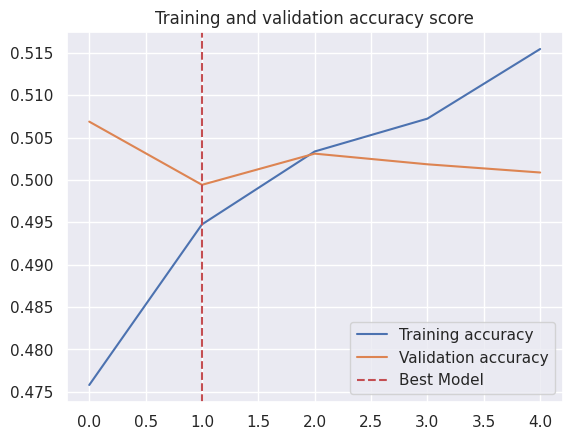

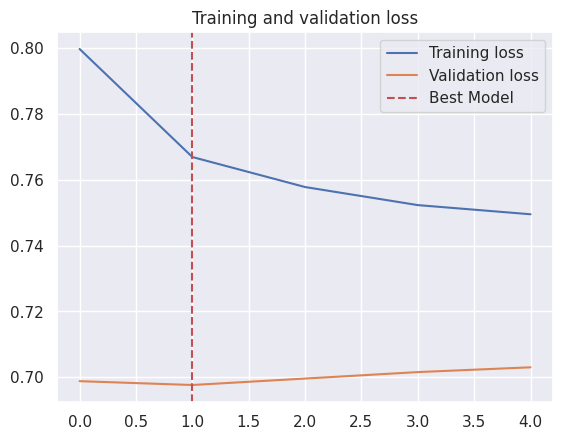

In [ ]:
plot_accuracy_loss(cnn_model_glove_history_o)

In [ ]:
from keras.models import load_model
saved_model_cnn_glove = load_model('model_cnn_glove.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_cnn_glove, X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_cnn_glove, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f%%, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss*100, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f%%, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss*100, test_precision*100, test_recall*100, test_f1_score*100))

139/139 [==============================] - 0s 2ms/step
Train accuracy: 48.83%, Train loss: 70.06%, Train precision: 50.81%, Train recall: 50.74%, Train f1-score: 48.35%
Test accuracy: 50.62%, Test loss: 69.93%, Test precision: 50.60%, Test recall: 50.51%, Test f1-score: 48.74%


In [ ]:
# draw_roc_curve(saved_model_cnn_glove, X_test_dl)

139/139 [==============================] - 0s 3ms/step
model AUPRC score: 0.49523986605285486


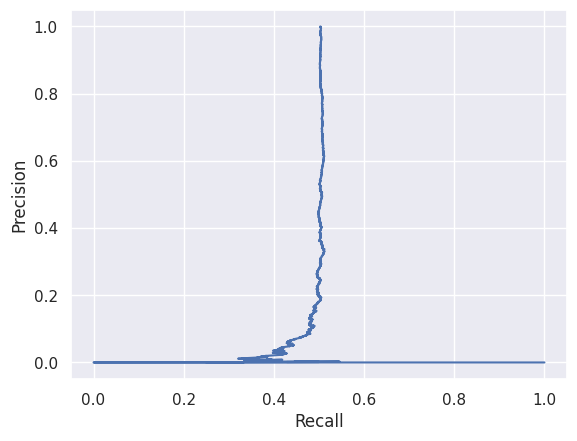

In [ ]:
draw_auprc_score(saved_model_cnn_glove, X_test_dl, y_test) # AUC PRC score

In [ ]:
get_auc_score(saved_model_cnn_glove, X_test_dl, y_test) # AUC ROC score

139/139 [==============================] - 0s 3ms/step
model AUC score: 0.5017207894035997


In [ ]:
draw_confusion_matrix(saved_model_cnn_glove, X_test_dl, y_test)

139/139 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.40      0.11      0.17      2202
           1       0.49      0.83      0.61      2227

    accuracy                           0.47      4429
   macro avg       0.44      0.47      0.39      4429
weighted avg       0.44      0.47      0.39      4429



hate  no-hate
hate      244     1958
no-hate   373     1854

### <h4> *LSTM models* </h4>

In [ ]:
# lstm_model_ = build_model_lstm(lstm_units = 64, dense_units = 512,
#                               k_regularizer = 0.001,
#                               dropout_rate = 0.3, recurrent_dropout = 0.0,emb_dim = 100)
# lstm_history = fit_network(lstm_model_, X_train_dl, y_train, X_dev_dl, y_dev)

In [ ]:
lstm_model_fastText_o = build_model_lstm_fastText(lstm_units = 64, dense_units = 512,
                              k_regularizer = 0.001, dropout_rate = 0.3,
                              recurrent_dropout = 0.0, emb_dim = 300)
lstm_fastText_history_o = fit_network(lstm_model_fastText_o, X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_lstm_fastText"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_9 (Embedding)     (None, 100, 300)             6000300   ['input_10[0][0]']            
                                                                                                  
 spatial_dropout1d_9 (Spati  (None, 100, 300)             0         ['embedding_9[0][0]']         
 alDropout1D)                                                                                     
                                                                                                  
 lstm (LSTM)                 (None, 100, 64)              93440     ['spatial_dr

Average Accuracy score: 0.4723051828997476
Best loss: 0.9380043745040894
for epoch : 3


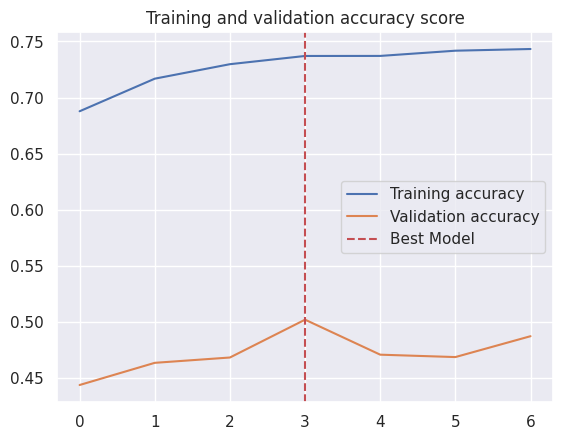

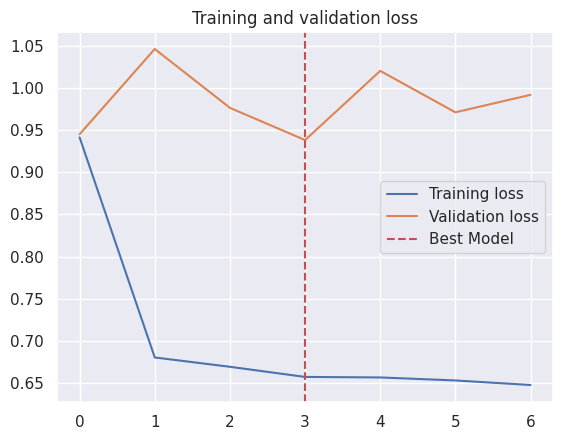

In [ ]:
plot_accuracy_loss(lstm_fastText_history_o)

In [ ]:
from keras.models import load_model
saved_model_lstm_fastText = load_model('model_lstm_fastText.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_lstm_fastText, X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_lstm_fastText, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f%%, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss*100, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f%%, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss*100, test_precision*100, test_recall*100, test_f1_score*100))

139/139 [==============================] - 0s 3ms/step
Train accuracy: 74.81%, Train loss: 63.13%, Train precision: 74.62%, Train recall: 74.96%, Train f1-score: 74.65%
Test accuracy: 49.97%, Test loss: 94.71%, Test precision: 49.92%, Test recall: 49.92%, Test f1-score: 49.58%


139/139 [==============================] - 1s 4ms/step
model AUPRC score: 0.4834205582837574


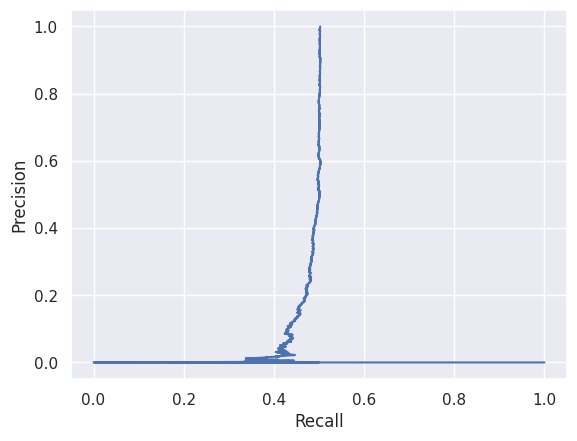

In [ ]:
draw_auprc_score(saved_model_lstm_fastText, X_test_dl, y_test) # AUC PRC score

In [ ]:
get_auc_score(saved_model_lstm_fastText, X_test_dl, y_test) # AUC ROC score

139/139 [==============================] - 1s 4ms/step
model AUC score: 0.48611673593871263


In [ ]:
draw_confusion_matrix(saved_model_lstm_fastText, X_test_dl, y_test)

139/139 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.50      0.41      0.45      2202
           1       0.50      0.58      0.54      2227

    accuracy                           0.50      4429
   macro avg       0.50      0.50      0.50      4429
weighted avg       0.50      0.50      0.50      4429



hate  no-hate
hate      913     1289
no-hate   927     1300

In [ ]:
lstm_model_glove_o = build_model_lstm_glove(lstm_units = 64, dense_units = 512,
                              k_regularizer = 0.001, dropout_rate = 0.3,
                              recurrent_dropout = 0.0, emb_dim = 300)
lstm_glove_history_o = fit_network(lstm_model_glove_o, X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_lstm_glove"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_10 (Embedding)    (None, 100, 300)             6000300   ['input_11[0][0]']            
                                                                                                  
 spatial_dropout1d_10 (Spat  (None, 100, 300)             0         ['embedding_10[0][0]']        
 ialDropout1D)                                                                                    
                                                                                                  
 lstm_1 (LSTM)               (None, 100, 64)              93440     ['spatial_dropo

Average Accuracy score: 0.4914551206997463
Best loss: 0.9235620498657227
for epoch : 3


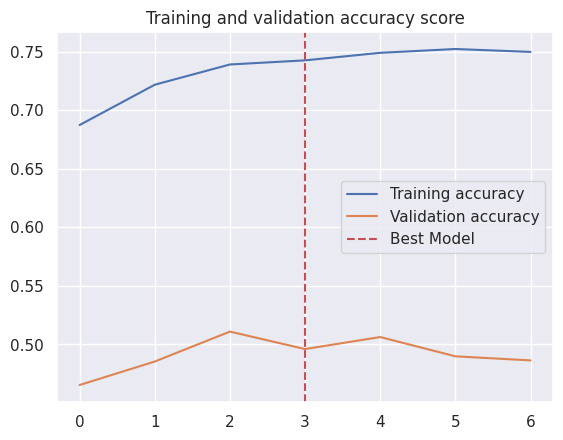

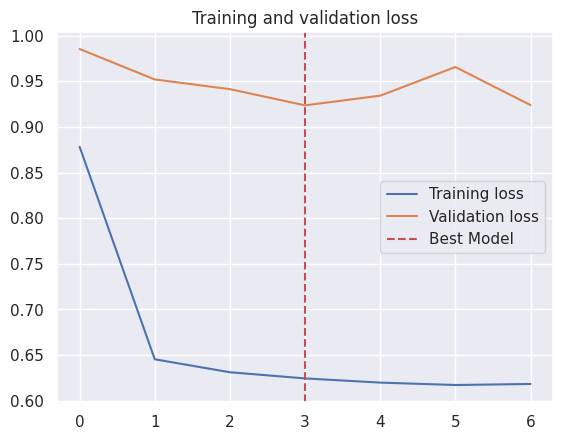

In [ ]:
plot_accuracy_loss(lstm_glove_history_o)

In [ ]:
from keras.models import load_model
saved_model_lstm_glove = load_model('model_lstm_glove.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_lstm_glove, X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_lstm_glove, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f%%, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss*100, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f%%, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss*100, test_precision*100, test_recall*100, test_f1_score*100))

139/139 [==============================] - 0s 3ms/step
Train accuracy: 76.38%, Train loss: 59.35%, Train precision: 77.02%, Train recall: 74.91%, Train f1-score: 75.26%
Test accuracy: 50.87%, Test loss: 94.10%, Test precision: 50.99%, Test recall: 50.94%, Test f1-score: 50.21%


139/139 [==============================] - 0s 3ms/step
model AUPRC score: 0.5104350929767274


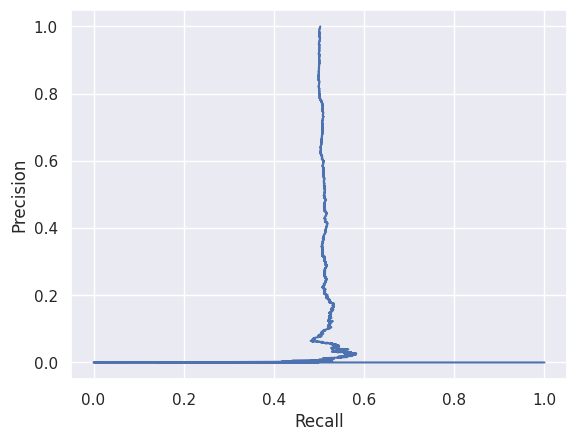

In [ ]:
draw_auprc_score(saved_model_lstm_glove, X_test_dl, y_test) # AUC PRC score

In [ ]:
get_auc_score(saved_model_lstm_glove, X_test_dl, y_test) # AUC ROC score

139/139 [==============================] - 0s 3ms/step
model AUC score: 0.5074104979471249


In [ ]:
draw_confusion_matrix(saved_model_lstm_glove, X_test_dl, y_test)

139/139 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.50      0.63      0.56      2202
           1       0.52      0.39      0.44      2227

    accuracy                           0.51      4429
   macro avg       0.51      0.51      0.50      4429
weighted avg       0.51      0.51      0.50      4429



hate  no-hate
hate     1382      820
no-hate  1356      871

### <h4> *GRU models* </h4>

In [ ]:
# gru_model = build_model_gru(gru_units = 64,learning_rate = 0.003,
#                               k_regularizer = 0.00001, dropout_rate = 0.4,
#                               recurrent_dropout = 0.0, emb_dim = 100)
# gru_history = fit_network(gru_model, X_train_dl, y_train, X_dev_dl, y_dev)

In [ ]:
gru_model_fastText_o = build_model_gru_fastText(gru_units = 64,learning_rate = 0.003,
                              k_regularizer = 0.00001, dropout_rate = 0.4,
                              recurrent_dropout = 0.0, emb_dim = 300)
gru_fastText_history_o = fit_network(gru_model_fastText_o, X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_gru_fastText"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_11 (Embedding)    (None, 100, 300)             6000300   ['input_12[0][0]']            
                                                                                                  
 spatial_dropout1d_11 (Spat  (None, 100, 300)             0         ['embedding_11[0][0]']        
 ialDropout1D)                                                                                    
                                                                                                  
 gru (GRU)                   (None, 100, 64)              70272     ['spatial_dro

In [ ]:
from keras.models import load_model
saved_model_gru_fastText = load_model('model_gru_fastText.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_gru_fastText, X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_gru_fastText, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f%%, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss*100, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f%%, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss*100, test_precision*100, test_recall*100, test_f1_score*100))

139/139 [==============================] - 0s 3ms/step
Train accuracy: 83.15%, Train loss: 42.64%, Train precision: 82.92%, Train recall: 82.85%, Train f1-score: 82.88%
Test accuracy: 48.97%, Test loss: 98.78%, Test precision: 48.97%, Test recall: 48.97%, Test f1-score: 48.96%


Average Accuracy score: 0.47576184783663067
Best loss: 0.9020192623138428
for epoch : 3


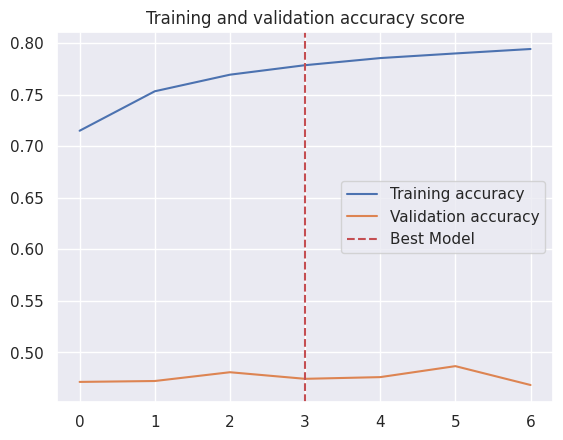

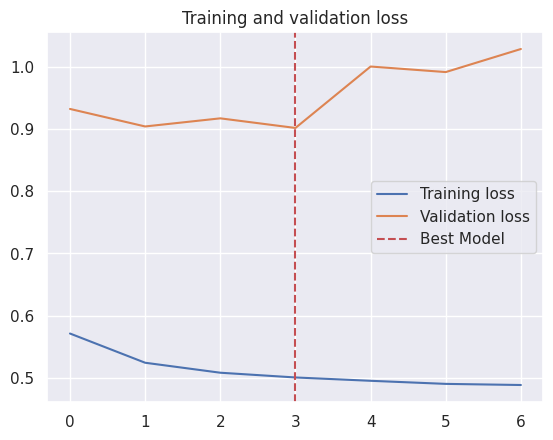

In [ ]:
plot_accuracy_loss(gru_fastText_history_o)

139/139 [==============================] - 1s 4ms/step
model AUPRC score: 0.4938100896719931


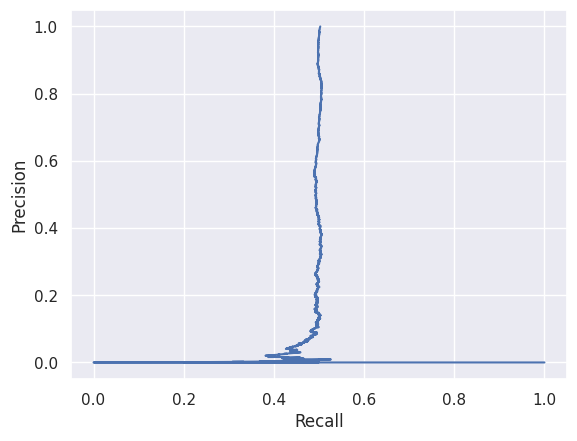

In [ ]:
draw_auprc_score(saved_model_gru_fastText, X_test_dl, y_test) # AUC PRC score

In [ ]:
get_auc_score(saved_model_gru_fastText, X_test_dl, y_test) # AUC ROC score

139/139 [==============================] - 0s 3ms/step
model AUC score: 0.49154175470966305


In [ ]:
draw_confusion_matrix(saved_model_gru_fastText, X_test_dl, y_test)

139/139 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.49      0.48      0.48      2202
           1       0.49      0.50      0.50      2227

    accuracy                           0.49      4429
   macro avg       0.49      0.49      0.49      4429
weighted avg       0.49      0.49      0.49      4429



hate  no-hate
hate     1056     1146
no-hate  1114     1113

In [ ]:
gru_model_glove_o = build_model_gru_glove(gru_units = 64,learning_rate = 0.003,
                              k_regularizer = 0.00001, dropout_rate = 0.4,
                              recurrent_dropout = 0.0, emb_dim = 300)
gru_glove_history_o = fit_network(gru_model_glove_o, X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_gru_glove"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_12 (Embedding)    (None, 100, 300)             6000300   ['input_13[0][0]']            
                                                                                                  
 spatial_dropout1d_12 (Spat  (None, 100, 300)             0         ['embedding_12[0][0]']        
 ialDropout1D)                                                                                    
                                                                                                  
 gru_1 (GRU)                 (None, 100, 64)              70272     ['spatial_dropou

In [ ]:
from keras.models import load_model
saved_model_gru_glove = load_model('model_gru_glove.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_gru_glove, X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_gru_glove, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f%%, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss*100, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f%%, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss*100, test_precision*100, test_recall*100, test_f1_score*100))


139/139 [==============================] - 0s 3ms/step
Train accuracy: 78.40%, Train loss: 48.25%, Train precision: 78.59%, Train recall: 77.36%, Train f1-score: 77.68%
Test accuracy: 50.08%, Test loss: 87.70%, Test precision: 50.12%, Test recall: 50.12%, Test f1-score: 49.82%


139/139 [==============================] - 0s 3ms/step
model AUPRC score: 0.4898115164561276


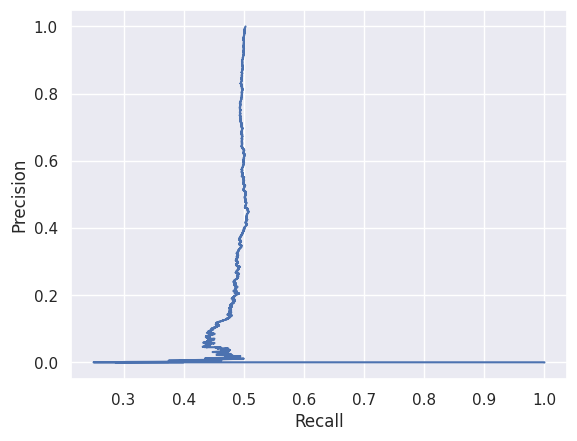

In [ ]:
draw_auprc_score(saved_model_gru_glove, X_test_dl, y_test) # AUC PRC score

In [ ]:
get_auc_score(saved_model_gru_glove, X_test_dl, y_test) # AUC ROC score

139/139 [==============================] - 0s 3ms/step
model AUC score: 0.48664213901963643


In [ ]:
draw_confusion_matrix(saved_model_gru_glove, X_test_dl, y_test)

139/139 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.50      0.58      0.53      2202
           1       0.50      0.43      0.46      2227

    accuracy                           0.50      4429
   macro avg       0.50      0.50      0.50      4429
weighted avg       0.50      0.50      0.50      4429



hate  no-hate
hate     1269      933
no-hate  1278      949

Average Accuracy score: 0.47229481488466263
Best loss: 0.8743648529052734
for epoch : 0


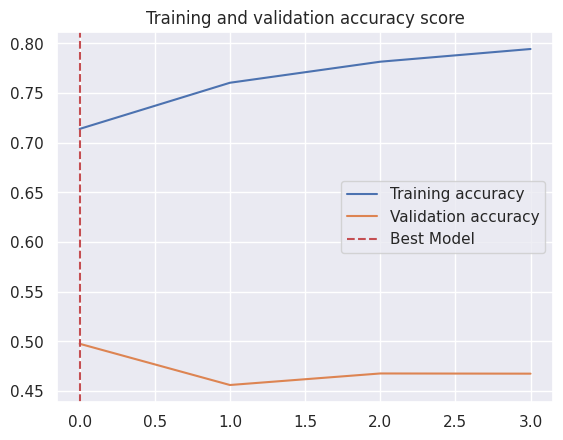

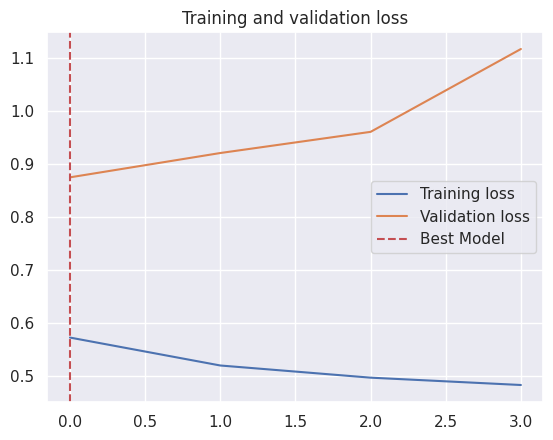

In [ ]:
plot_accuracy_loss(gru_glove_history_o)

### <h4> *Bi-GRU models* </h4>

In [ ]:
# bi_gru_model_ = build_model_bi_gru(gru_units = 64, k_regularizer = 0.00001,learning_rate = 0.003,
#                                 dropout_rate = 0.4, recurrent_dropout= 0.0, emb_dim = 100)
# bi_gru_model_history = fit_network(bi_gru_model_, X_train_dl, y_train, X_dev_dl, y_dev)

In [ ]:
bi_gru_model_fastText_o = build_model_bi_gru_fastText(gru_units = 64, k_regularizer = 0.00001,learning_rate = 0.003,
                                dropout_rate = 0.4, recurrent_dropout= 0.0, emb_dim = 300)
bi_gru_model_fastText_history_o = fit_network(bi_gru_model_fastText_o, X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_bigru_fastText"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 100, 300)             6000300   ['input_1[0][0]']             
                                                                                                  
 spatial_dropout1d (Spatial  (None, 100, 300)             0         ['embedding[0][0]']           
 Dropout1D)                                                                                       
                                                                                                  
 bidirectional (Bidirection  (None, 100, 128)             140544    ['spatial_d

Average Accuracy score: 0.48698218166828156
Best loss: 0.868405818939209
for epoch : 0


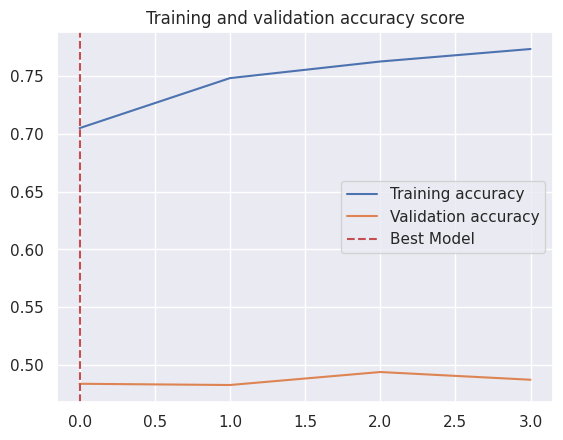

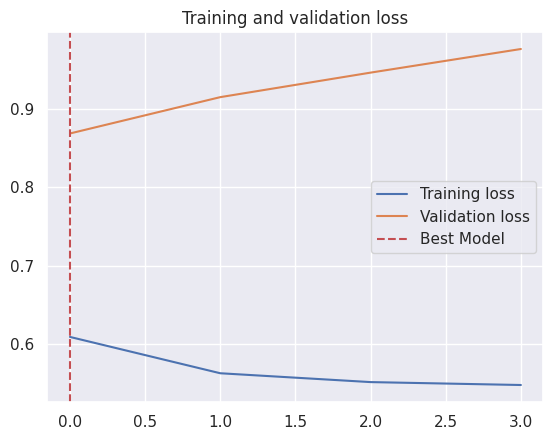

In [ ]:
plot_accuracy_loss(bi_gru_model_fastText_history_o)

In [ ]:
from keras.models import load_model
saved_model_bi_gru_fastText = load_model('model_bigru_fastText.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_bi_gru_fastText, X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_bi_gru_fastText, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f%%, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss*100, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f%%, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss*100, test_precision*100, test_recall*100, test_f1_score*100))

139/139 [==============================] - 1s 4ms/step
Train accuracy: 79.91%, Train loss: 49.44%, Train precision: 79.64%, Train recall: 79.49%, Train f1-score: 79.56%
Test accuracy: 48.66%, Test loss: 95.56%, Test precision: 48.65%, Test recall: 48.65%, Test f1-score: 48.65%


139/139 [==============================] - 1s 5ms/step
model AUPRC score: 0.4919886652922479


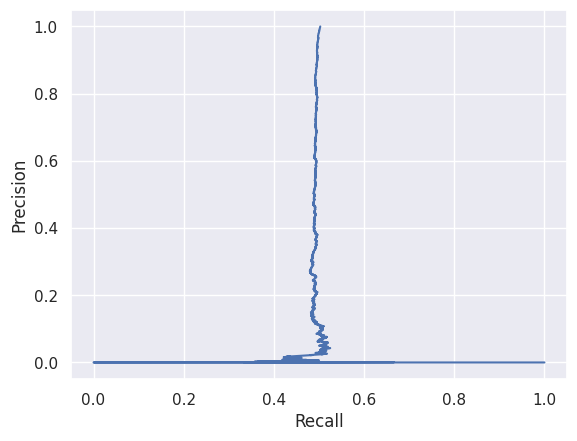

In [ ]:
draw_auprc_score(saved_model_bi_gru_fastText, X_test_dl, y_test) # AUC PRC score

In [ ]:
get_auc_score(saved_model_bi_gru_fastText, X_test_dl, y_test) # AUC ROC score

139/139 [==============================] - 1s 5ms/step
model AUC score: 0.48029835309126245


In [ ]:
draw_confusion_matrix(saved_model_bi_gru_fastText, X_test_dl, y_test)

139/139 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.48      0.48      0.48      2202
           1       0.49      0.50      0.49      2227

    accuracy                           0.49      4429
   macro avg       0.49      0.49      0.49      4429
weighted avg       0.49      0.49      0.49      4429



hate  no-hate
hate     1052     1150
no-hate  1124     1103

In [ ]:
bi_gru_model_glove_o = build_model_bi_gru_glove(gru_units = 64, k_regularizer = 0.00001,learning_rate= 0.003,
                                dropout_rate = 0.4, recurrent_dropout= 0.0, emb_dim = 300)
bi_gru_model_glove_history_o = fit_network(bi_gru_model_glove_o , X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_bigru_glove"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_14 (Embedding)    (None, 100, 300)             6000300   ['input_15[0][0]']            
                                                                                                  
 spatial_dropout1d_14 (Spat  (None, 100, 300)             0         ['embedding_14[0][0]']        
 ialDropout1D)                                                                                    
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 100, 128)             140544    ['spatial_drop

Average Accuracy score: 0.4819250777363777
Best loss: 0.9205524921417236
for epoch : 0


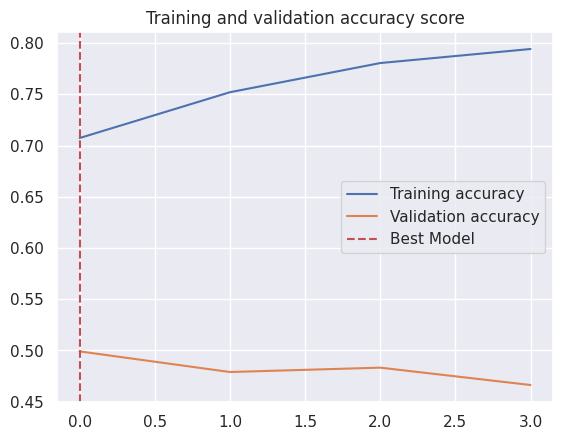

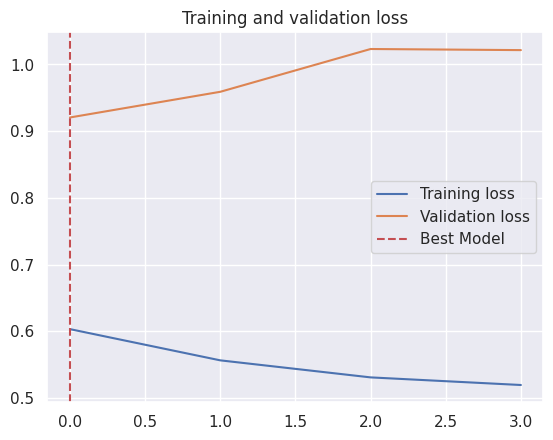

In [ ]:
plot_accuracy_loss(bi_gru_model_glove_history_o)

In [ ]:
from keras.models import load_model
saved_model_bi_gru_glove = load_model('model_bigru_glove.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_bi_gru_glove, X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_bi_gru_glove, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f%%, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss*100, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f%%, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss*100, test_precision*100, test_recall*100, test_f1_score*100))

139/139 [==============================] - 1s 4ms/step
Train accuracy: 77.18%, Train loss: 51.33%, Train precision: 78.18%, Train recall: 75.59%, Train f1-score: 75.98%
Test accuracy: 50.96%, Test loss: 91.30%, Test precision: 51.08%, Test recall: 51.03%, Test f1-score: 50.31%


139/139 [==============================] - 1s 4ms/step
model AUPRC score: 0.5011157293340758


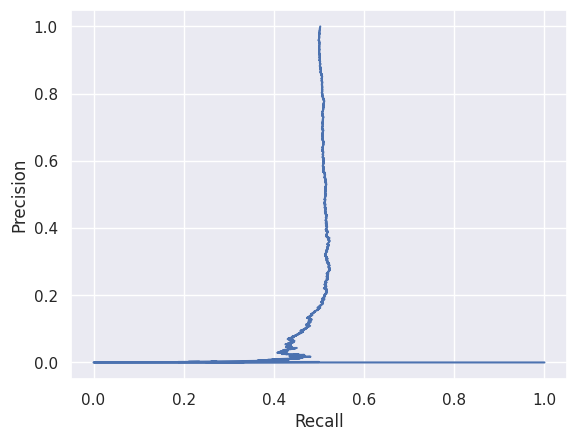

In [ ]:
draw_auprc_score(saved_model_bi_gru_glove, X_test_dl, y_test) # AUC PRC score

In [ ]:
get_auc_score(saved_model_bi_gru_glove, X_test_dl, y_test) # AUC ROC score

139/139 [==============================] - 1s 4ms/step
model AUC score: 0.5091227226585457


In [ ]:
draw_confusion_matrix(saved_model_bi_gru_glove, X_test_dl, y_test)

139/139 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.51      0.63      0.56      2202
           1       0.52      0.39      0.45      2227

    accuracy                           0.51      4429
   macro avg       0.51      0.51      0.50      4429
weighted avg       0.51      0.51      0.50      4429



hate  no-hate
hate     1381      821
no-hate  1351      876

### <h4> *BiGRU + CNN models* </h4>

In [ ]:
# bi_gru_cnn_model = build_model_bi_gru_cnn(filters = 64, kernel_size=6,
#                                               dropout_rate= 0.5, dense_units= 256,
#                                               gru_units = 64, k_regularizer = 0.00001,
#                                               learning_rate= 0.003, recurrent_dropout= 0.0, emb_dim = 100)
# bi_gru_cnn_model_history = fit_network(bi_gru_cnn_model, X_train_dl, y_train, X_dev_dl, y_dev)

In [ ]:
bi_gru_cnn_model_fastText_o = build_model_bi_gru_cnn_fastText(filters = 64, kernel_size=6,
                                              dropout_rate= 0.5, dense_units= 256,
                                              gru_units = 512, k_regularizer = 0.00001,
                                              learning_rate= 0.003, recurrent_dropout= 0.0, emb_dim = 300)
bi_gru_cnn_model_fastText_history_o = fit_network(bi_gru_cnn_model_fastText_o , X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_bi_gru_cnn_fastText"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_16 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_15 (Embedding)    (None, 100, 300)             6000300   ['input_16[0][0]']            
                                                                                                  
 spatial_dropout1d_15 (Spat  (None, 100, 300)             0         ['embedding_15[0][0]']        
 ialDropout1D)                                                                                    
                                                                                                  
 bidirectional_2 (Bidirecti  (None, 100, 1024)            2500608   ['spat

Average Accuracy score: 0.45915602147579193
Best loss: 0.9532997608184814
for epoch : 0


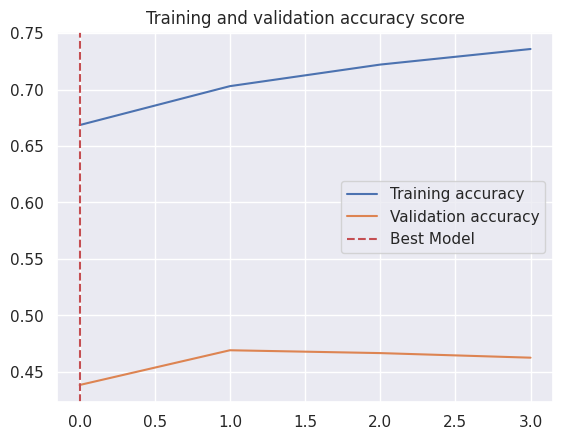

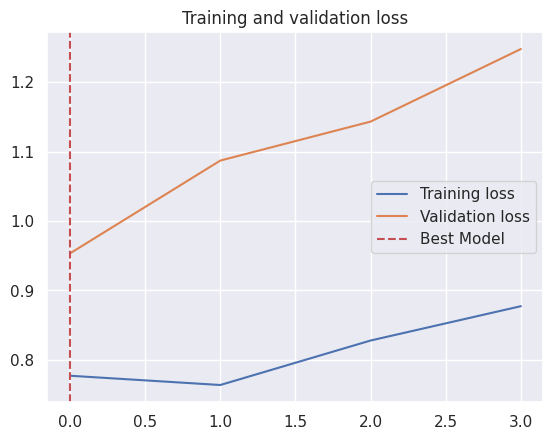

In [ ]:
plot_accuracy_loss(bi_gru_cnn_model_fastText_history_o)

In [ ]:
from keras.models import load_model
saved_model_bi_gru_cnn_fastText = load_model('model_bi_gru_cnn_fastText.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_bi_gru_cnn_fastText, X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_bi_gru_cnn_fastText, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f%%, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss*100, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f%%, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss*100, test_precision*100, test_recall*100, test_f1_score*100))

139/139 [==============================] - 2s 15ms/step
Train accuracy: 73.74%, Train loss: 72.91%, Train precision: 78.44%, Train recall: 70.86%, Train f1-score: 70.67%
Test accuracy: 46.67%, Test loss: 109.86%, Test precision: 45.10%, Test recall: 46.84%, Test f1-score: 41.58%


139/139 [==============================] - 2s 15ms/step
model AUPRC score: 0.4529526367849868


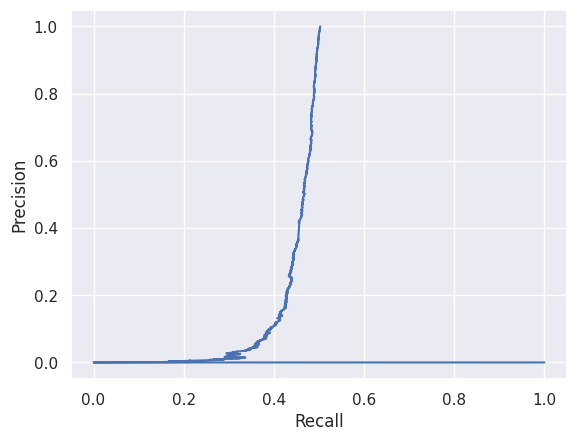

In [ ]:
draw_auprc_score(saved_model_bi_gru_cnn_fastText, X_test_dl, y_test) # AUC PRC score

In [ ]:
get_auc_score(saved_model_bi_gru_cnn_fastText, X_test_dl, y_test) # AUC ROC score

139/139 [==============================] - 2s 15ms/step
model AUC score: 0.44116240002251295


In [ ]:
draw_confusion_matrix(saved_model_bi_gru_cnn_fastText, X_test_dl, y_test)

139/139 [==============================] - 2s 15ms/step
              precision    recall  f1-score   support

           0       0.48      0.77      0.59      2202
           1       0.42      0.17      0.24      2227

    accuracy                           0.47      4429
   macro avg       0.45      0.47      0.42      4429
weighted avg       0.45      0.47      0.41      4429



hate  no-hate
hate     1687      515
no-hate  1847      380

In [ ]:
bi_gru_cnn_model_glove_o = build_model_bi_gru_cnn_glove(filters = 64, kernel_size=6,
                                              dropout_rate= 0.5, dense_units= 256,
                                              gru_units = 512, k_regularizer = 0.00001,
                                              learning_rate= 0.003, recurrent_dropout= 0.0, emb_dim = 300)
bi_gru_cnn_model_glove_history_o = fit_network(bi_gru_cnn_model_glove_o , X_train_dl, y_train, X_dev_dl, y_dev)

Model: "model_bi_gru_cnn_glove"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_16 (Embedding)    (None, 100, 300)             6000300   ['input_17[0][0]']            
                                                                                                  
 spatial_dropout1d_17 (Spat  (None, 100, 300)             0         ['embedding_16[0][0]']        
 ialDropout1D)                                                                                    
                                                                                                  
 bidirectional_3 (Bidirecti  (None, 100, 1024)            2500608   ['spatial

Average Accuracy score: 0.5038230866193771
Best loss: 1.0200870037078857
for epoch : 0


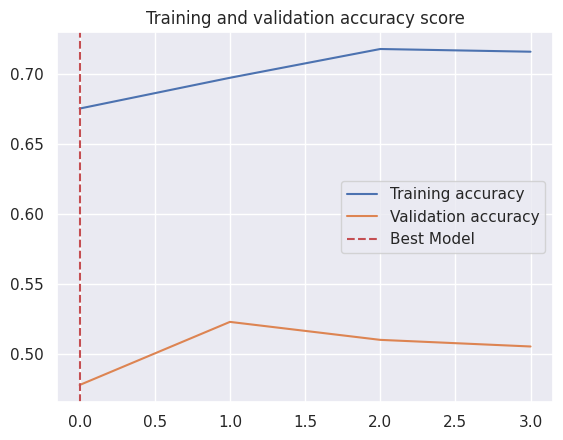

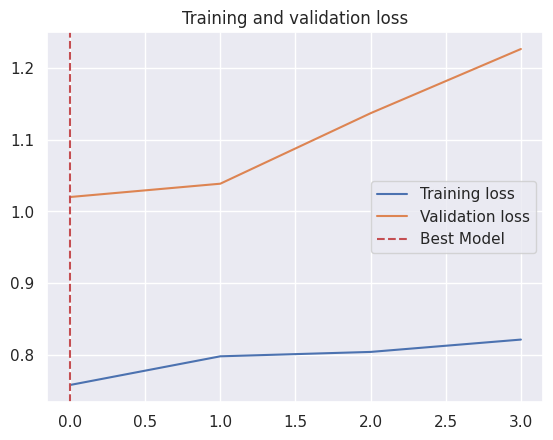

In [ ]:
plot_accuracy_loss(bi_gru_cnn_model_glove_history_o)

In [ ]:
from keras.models import load_model
saved_model_bi_gru_cnn_glove = load_model('model_bi_gru_cnn_glove.keras', custom_objects={'AttentionLayer': AttentionLayer})
train_loss, train_acc, train_precision, train_recall, train_f1_score = evaluate_model(saved_model_bi_gru_cnn_glove, X_train_dl, y_train)
test_loss, test_acc, test_precision, test_recall, test_f1_score = evaluate_model(saved_model_bi_gru_cnn_glove, X_test_dl, y_test)
print('Train accuracy: %.2f%%, Train loss: %.2f%%, Train precision: %.2f%%, Train recall: %.2f%%, Train f1-score: %.2f%%' % (train_acc*100, train_loss*100, train_precision*100, train_recall*100, train_f1_score*100))
print('Test accuracy: %.2f%%, Test loss: %.2f%%, Test precision: %.2f%%, Test recall: %.2f%%, Test f1-score: %.2f%%' % (test_acc*100, test_loss*100, test_precision*100, test_recall*100, test_f1_score*100))

139/139 [==============================] - 2s 15ms/step
Train accuracy: 75.62%, Train loss: 71.09%, Train precision: 76.80%, Train recall: 73.84%, Train f1-score: 74.18%
Test accuracy: 52.04%, Test loss: 104.02%, Test precision: 52.31%, Test recall: 52.12%, Test f1-score: 51.09%


139/139 [==============================] - 2s 15ms/step
model AUPRC score: 0.505324200770378


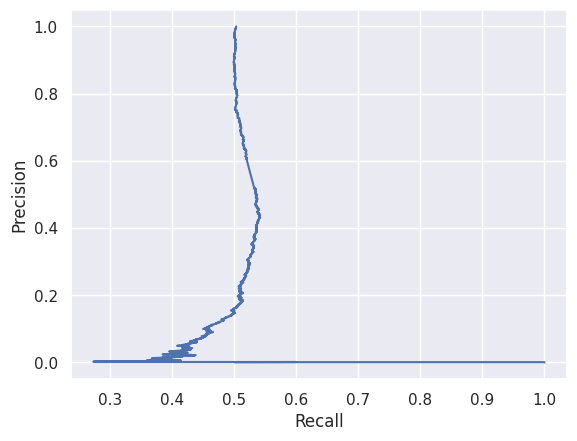

In [ ]:
draw_auprc_score(saved_model_bi_gru_cnn_glove, X_test_dl, y_test)

In [ ]:
get_auc_score(saved_model_bi_gru_cnn_glove, X_test_dl, y_test)

139/139 [==============================] - 2s 15ms/step
model AUC score: 0.5159280843189866


In [ ]:
draw_confusion_matrix(saved_model_bi_gru_cnn_glove, X_test_dl, y_test)

139/139 [==============================] - 2s 15ms/step
              precision    recall  f1-score   support

           0       0.51      0.66      0.58      2202
           1       0.53      0.38      0.44      2227

    accuracy                           0.52      4429
   macro avg       0.52      0.52      0.51      4429
weighted avg       0.52      0.52      0.51      4429



hate  no-hate
hate     1461      741
no-hate  1383      844

### <h4> *RoBERTA + BiGRU + CNN models* </h4>

In [ ]:
roberta_model_o = build_model_roberta(filters = 64, kernel_size=6,
                                              dropout_rate= 0.5, dense_units= 256,
                                              gru_units = 512, k_regularizer = 0.00001,
                                              learning_rate= 0.003, recurrent_dropout= 0.0, emb_dim = 300)
roberta_history_o = fit_network(roberta_model_o, X_train_roberta, y_train, X_dev_roberta, y_dev)

## <h3> *Hyperparameters tuning* </h3>

In [ ]:
# def tune_hyperparameters_cnn(X_train, y_train, X_val, y_val):
#     # build_model_cnn_emb
#     keras_model = KerasClassifier(build_fn = build_model_cnn, dense_units = 256,
#                                 dropout_rate = 0.5, filters = 256, kernel_size=6,
#                                 activation ='relu',verbose = 3)
#     # define grid parameters
#     param_grid = {
#             #'batch_size' : [16, 32, 64, 128, 256],
#             #'epochs' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#             #'activation' : ['relu', 'tanh', 'sigmoid'],
#             }
#     grid = GridSearchCV(estimator = keras_model, param_grid = param_grid,
#                         cv = 3, verbose = 3, error_score='raise')
#     grid_result = grid.fit(X_train, y_train, validation_data = (X_val, y_val))
#     # summarize results
#     print(f" Best result is : {grid_result.best_score_} using : {grid_result.best_params_}")
#     best_model = grid_result.best_estimator_
#     return best_model

# def tune_hyperparameters_lstm(X_train, y_train, X_val, y_val):
#     # build_model_lstm_emb
#     keras_model = KerasClassifier(build_fn = build_model_lstm, lstm_units = 64,
#                                   dense_units = 512, activation = 'relu',
#                                   recurrent_activation = 'sigmoid',
#                                   dropout_rate = 0.3, recurrent_dropout = 0.0,
#                                   k_regularizer = 0.001,
#                                   verbose = 3)
#     # define grid parameters
#     param_grid = {
#             # 'activation' : ['relu', 'tanh', 'sigmoid'],
#             #'recurrent_activation' : ['relu', 'tanh', 'sigmoid'],
#             # 'lstm_units' : [32, 64, 128, 256, 512],
#             # 'dropout_rate' : [0.0, 0.2, 0.3, 0.4, 0.5],
#             # 'dense_units' : [32, 64, 128, 256, 512],
#             # 'recurrent_dropout': [ 0.0, 0.2, 0.3, 0.4],
#             # 'k_regularizer':[0.00001, 0.0001, 0.001, 0.01, 0.1],
#             #'optimizer' : [Adam(learning_rate = 0.00001),
#                   #Adam(learning_rate = 0.00003), Adam(learning_rate = 0.0001),
#                   #Adam(learning_rate = 0.0003), Adam(learning_rate = 0.001),
#                   #Adam(learning_rate = 0.003), Adam(learning_rate = 0.01),
#                   #Adam(learning_rate = 0.03), Adam(learning_rate = 0.1),
#                   #Adam(learning_rate = 0.3)],
#             #'batch_size' : [16, 32, 64, 128, 256],
#             #'epochs' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#     }
#     grid = GridSearchCV(estimator = keras_model, param_grid = param_grid,
#                         cv = 3, verbose = 3)
#     grid_result = grid.fit(X_train, y_train, validation_data = (X_val, y_val))
#     # summarize results
#     print(f" Best result is : {grid_result.best_score_} using : {grid_result.best_params_}")
#     best_model = grid_result.best_estimator_
#     return best_model

# def tune_hyperparameters_gru(X_train, y_train, X_val, y_val):
#     # build_model_gru_emb
#     keras_model = KerasClassifier(build_fn = build_model_gru, gru_units = 32,
#                                   dropout_rate = 0.4, recurrent_dropout = 0.0,
#                                   learning_rate = 0.003,
#                                   k_regularizer = 0.00001,
#                                   verbose = 3)
#     # define grid parameters
#     param_grid = {
#             # 'gru_units' : [32, 64, 128, 256, 512],
#             # 'dropout_rate' : [0.0, 0.2, 0.3, 0.4, 0.5],
#             # 'recurrent_dropout': [ 0.0, 0.2, 0.3, 0.4],
#             # 'dense_units' : [32, 64, 128, 256, 512],
#             # 'learning_rate':[0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03,
#             #                  0.1, 0.3]
#             #'k_regularizer':[0.00001, 0.0001, 0.001, 0.01, 0.1],
#             # 'opt':['Adam', 'RMSprop', 'SGD', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam'],
#             # 'optimizer' : [Adam(learning_rate = 0.00001),
#             #       Adam(learning_rate = 0.00003), Adam(learning_rate = 0.0001),
#             #       Adam(learning_rate = 0.0003), Adam(learning_rate = 0.001),
#             #       Adam(learning_rate = 0.003), Adam(learning_rate = 0.01),
#             #       Adam(learning_rate = 0.03), Adam(learning_rate = 0.1),
#             #       Adam(learning_rate = 0.3)],
#             #'batch_size' : [16, 32, 64, 128, 256], 64
#             'epochs' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#     }
#     grid = GridSearchCV(estimator = keras_model, param_grid = param_grid,
#                         cv = 3, verbose = 3)
#     grid_result = grid.fit(X_train, y_train, validation_data = (X_val, y_val))
#     # summarize results
#     print(f" Best result is : {grid_result.best_score_} using : {grid_result.best_params_}")
#     best_model = grid_result.best_estimator_
#     return best_model

In [ ]:
# tune_hyperparameters_cnn(X_train_dl, y_train, X_dev_dl, y_dev)

In [ ]:
# tune_hyperparameters_lstm(X_train_dl, y_train, X_dev_dl, y_dev)

In [ ]:
# tune_hyperparameters_gru(X_train_dl, y_train, X_dev_dl, y_dev)

In [ ]:


classifier = transformers.pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

text = "I enjoy playing cricket, specializing as a left-arm leg spinner while showcasing my skills as a right-handed one-down batsman."
labels = ['Politics', 'Automobile', 'Sports', 'Business', 'World']

prediction = classifier(text, labels)

print(prediction['sequence'])
print(prediction['labels'])
print(prediction['scores'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

I enjoy playing cricket, specializing as a left-arm leg spinner while showcasing my skills as a right-handed one-down batsman.
['Sports', 'World', 'Automobile', 'Business', 'Politics']
[0.9363624453544617, 0.0512777678668499, 0.005267285276204348, 0.004826569464057684, 0.0022658961825072765]
